## Digital Ads Data

The ads24x7 is a Digital Marketing company which has now got seed funding of $10 Million. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to segment type of ads based on the features provided. Use Clustering procedure to segment ads into homogeneous groups.

The following three features are commonly used in digital marketing:

CPM = (Total Campaign Spend / Number of Impressions) * 1,000. Note that the Total Campaign Spend refers to the 'Spend' Column in the dataset and the Number of Impressions refers to the 'Impressions' Column in the dataset. 

CPC = Total Cost (spend) / Number of Clicks.  Note that the Total Cost (spend) refers to the 'Spend' Column in the dataset and the Number of Clicks refers to the 'Clicks' Column in the dataset. 

CTR = Total Measured Clicks / Total Measured Ad Impressions x 100. Note that the Total Measured Clicks refers to the 'Clicks' Column in the dataset and the Total Measured Ad Impressions refers to the 'Impressions' Column in the dataset. 

The Data Dictionary and the detailed description of the formulas for CPM, CPC and CTR are given in the sheet 2 of the Clustering Clean ads_data Excel File. 

Perform the following in given order:

* Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.
*Treat missing values in CPC, CTR and CPM using the formula given. You may refer to the Bank_KMeans Solution File to understand the coding behind treating the missing values using a specific formula. You have to basically create an user defined function and then call the function for imputing. 
* Check if there are any outliers.
* Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst).
* Perform z-score scaling and discuss how it affects the speed of the algorithm.
* Perform clustering and do the following:
* Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.
* Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.
* Print silhouette scores for up to 10 clusters and identify optimum number of clusters.
* Profile the ads based on optimum number of clusters using silhouette score and your domain understanding
[Hint: Group the data by clusters and take sum or mean to identify trends in clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots.]
* Conclude the project by providing summary of your learnings.

### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load database
data_df =pd.read_excel('Clustering Clean Ads_Data.xlsx')

### Clustering: Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.

## Check the Data

In [3]:
data_df.head()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.0028  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.0020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.0041  0.0  0.0

In [4]:
data_df.describe()

Ad - Length     Ad- Width        Ad Size  Available_Impressions  \
count  23066.000000  23066.000000   23066.000000           2.306600e+04   
mean     385.163097    337.896037   96674.468048           2.432044e+06   
std      233.651434    203.092885   61538.329557           4.742888e+06   
min      120.000000     70.000000   33600.000000           1.000000e+00   
25%      120.000000    250.000000   72000.000000           3.367225e+04   
50%      300.000000    300.000000   72000.000000           4.837710e+05   
75%      720.000000    600.000000   84000.000000           2.527712e+06   
max      728.000000    600.000000  216000.000000           2.759286e+07   

       Matched_Queries   Impressions         Clicks         Spend  \
count     2.306600e+04  2.306600e+04   23066.000000  23066.000000   
mean      1.295099e+06  1.241520e+06   10678.518816   2706.625689   
std       2.512970e+06  2.429400e+06   17353.409363   4067.927273   
min       1.000000e+00  1.000000e+00       1.000000      0.000000   
25%       1.828250e+04  7.990500e+03     710.000000     85.180000   
50%       2.580875e+05  2.252900e+05    4425.000000   1425.125000   
75%       1.180700e+06  1.112428e+06   12793.750000   3121.400000   
max       1.470202e+07  1.419477e+07  143049.000000  26931.870000   

                Fee       Revenue           CTR           CPM           CPC  
count  23066.000000  23066.000000  18330.000000  18330.000000  18330.000000  
mean       0.335123   1924.252331      0.073661      7.672045      0.351061  
std        0.031963   3105.238410      0.075160      6.481391      0.343334  
min        0.210000      0.000000      0.000100      0.000000      0.000000  
25%        0.330000     55.365375      0.002600      1.710000      0.090000  
50%        0.350000    926.335000      0.082550      7.660000      0.160000  
75%        0.350000   2091.338150      0.130000     12.510000      0.570000  
max        0.350000  21276.180000      1.000000     81.560000      7.260000

In [5]:
data_df.shape

(23066, 19)

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

### Check for null values

In [7]:
data_df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

Columns CTR, CPM, CPC having null values present which need to be replaces with formula provided by Ad - Company

## Looking for Duplicate Values as preprocessing data

In [8]:
data_df.duplicated().sum()

0

### Observation

* Dataset having 23066 rows and 19 columns.
* Contain different datatype of 7 float, 6 int64 and 6 object variables.
* There are three variable with missing values like CTR, CPM and CPC.
* Ad company has provided the conditions to replace the missing values. 
* The Missing values to 4736 records in CTR , CPM and CPC.
* No Duplicate values in the dataset

### Clustering: Treat missing values in CPC, CTR and CPM using the formula given.

###### Replacing null value with formula provided

In [9]:
def calculate_ctr(x):
    impressions = data_df.Impressions
    clicks = data_df.Clicks
    ctr = (clicks/impressions)*100
    return ctr

In [10]:
data_df['CTR'] = data_df[['CTR']].apply(lambda x: calculate_ctr(x))

In [11]:
def calculate_cpm(y):
    impressions = data_df.Impressions
    spend = data_df.Spend
    cpm = (spend/impressions)*1000
    return cpm

In [12]:
data_df['CPM'] = data_df[['CPM']].apply(lambda y: calculate_cpm(y))

In [13]:
def calculate_cpc(z):
    clicks = data_df.Clicks
    spend = data_df.Spend
    cpc = spend/clicks
    return cpc

In [14]:
data_df['CPC'] = data_df[['CPC']].apply(lambda z: calculate_cpc(z))

In [15]:
data_df.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

#### Checking of null values are replaces effectively

In [16]:
data_df.head()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue       CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.309598  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.350877  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.281690  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.202020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.413223  0.0  0.0

In [17]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [18]:
data_df.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

No null values 

In [19]:
data_df.describe().round(2)

Ad - Length  Ad- Width    Ad Size  Available_Impressions  \
count     23066.00   23066.00   23066.00               23066.00   
mean        385.16     337.90   96674.47             2432043.67   
std         233.65     203.09   61538.33             4742887.76   
min         120.00      70.00   33600.00                   1.00   
25%         120.00     250.00   72000.00               33672.25   
50%         300.00     300.00   72000.00              483771.00   
75%         720.00     600.00   84000.00             2527711.75   
max         728.00     600.00  216000.00            27592861.00   

       Matched_Queries  Impressions     Clicks     Spend       Fee   Revenue  \
count         23066.00     23066.00   23066.00  23066.00  23066.00  23066.00   
mean        1295099.14   1241519.52   10678.52   2706.63      0.34   1924.25   
std         2512969.86   2429399.96   17353.41   4067.93      0.03   3105.24   
min               1.00         1.00       1.00      0.00      0.21      0.00   
25%           18282.50      7990.50     710.00     85.18      0.33     55.37   
50%          258087.50    225290.00    4425.00   1425.12      0.35    926.34   
75%         1180700.00   1112428.50   12793.75   3121.40      0.35   2091.34   
max        14702025.00  14194774.00  143049.00  26931.87      0.35  21276.18   

            CTR       CPM       CPC  
count  23066.00  23066.00  23066.00  
mean       8.41      8.40      0.34  
std        9.26      9.06      0.34  
min        0.01      0.00      0.00  
25%        0.27      1.75      0.09  
50%        9.39      8.37      0.14  
75%       13.47     13.04      0.55  
max      200.00    715.00      7.26

While running algorithum dataset to be only as numercial elements - Two seperate dataset created as numerical values(data_df_num) and categorical values(data_df_cat).

In [20]:
data_df_num = data_df.select_dtypes(include=['float64','int64'])
listnumericcolmn = list(data_df_num.columns.values)
len(listnumericcolmn)

13

In [21]:
data_df_cat= data_df.select_dtypes(include=['object'])
listcatagorycolmn = list(data_df_cat.columns.values)
listcatagorycolmn

['Timestamp', 'InventoryType', 'Ad Type', 'Platform', 'Device Type', 'Format']

In [22]:
data_df_num.head()

Ad - Length  Ad- Width  Ad Size  Available_Impressions  Matched_Queries  \
0          300        250    75000                   1806              325   
1          300        250    75000                   1780              285   
2          300        250    75000                   2727              356   
3          300        250    75000                   2430              497   
4          300        250    75000                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue       CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.309598  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.350877  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.281690  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.202020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.413223  0.0  0.0

In [23]:
data_df_cat.head()

Timestamp InventoryType   Ad Type Platform Device Type   Format
0  2020-9-2-17       Format1  Inter222    Video     Desktop  Display
1  2020-9-2-10       Format1  Inter227      App      Mobile    Video
2  2020-9-1-22       Format1  Inter222    Video     Desktop  Display
3  2020-9-3-20       Format1  Inter228    Video      Mobile    Video
4  2020-9-4-15       Format1  Inter217      Web     Desktop    Video

## EDA

### Univariate Analysis

Let us define a univariate_num function to display infomation as part of Univariate Analysis of Numeric Columns. The function will accept two arguments(Column name,bins).

We will be using distplot and boxplot to display in our statistical description of Numercial Variables. Check for outliers if any.

In [24]:
def univariate_num(colmns, nbins):
    print("Desciption of" + colmns)
    print('__________________________________________')
    print(data_df_num[colmns].describe(),end=' ')
    

    plt.figure()
    print('Distribution of ' + colmns)
    print('__________________________________________')
    sns.distplot(data_df_num[colmns], kde= False, color= 'g')
    
    plt.figure()
    print('Boxplot of ' + colmns)
    print('__________________________________________')
    ax= sns.boxplot(x= data_df_num[colmns])
    plt.show()


Desciption ofAd - Length
__________________________________________
count    23066.000000
mean       385.163097
std        233.651434
min        120.000000
25%        120.000000
50%        300.000000
75%        720.000000
max        728.000000
Name: Ad - Length, dtype: float64 Distribution of Ad - Length
__________________________________________
Boxplot of Ad - Length
__________________________________________


C:\Users\kisho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


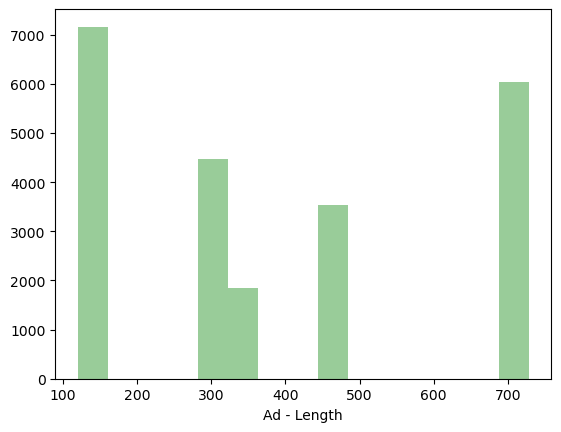

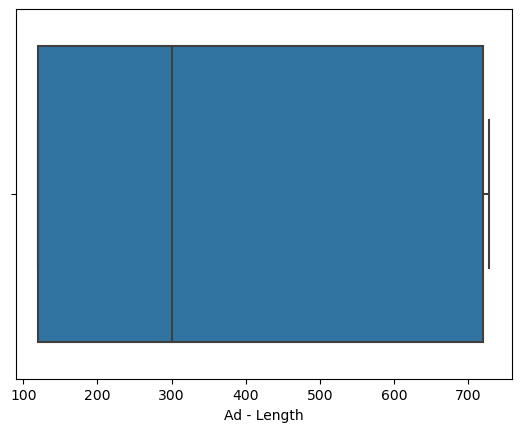

Desciption ofAd- Width
__________________________________________
count    23066.000000
mean       337.896037
std        203.092885
min         70.000000
25%        250.000000
50%        300.000000
75%        600.000000
max        600.000000
Name: Ad- Width, dtype: float64 Distribution of Ad- Width
__________________________________________
Boxplot of Ad- Width
__________________________________________


C:\Users\kisho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


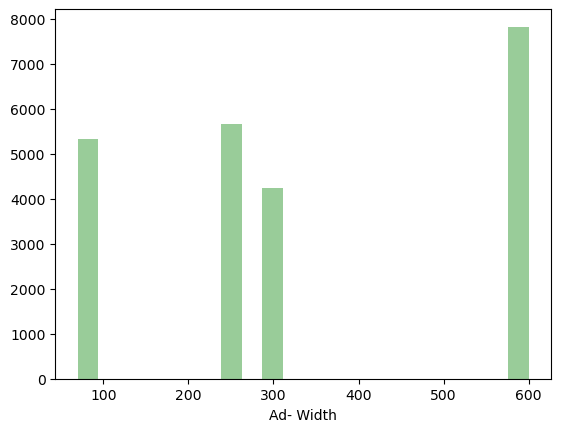

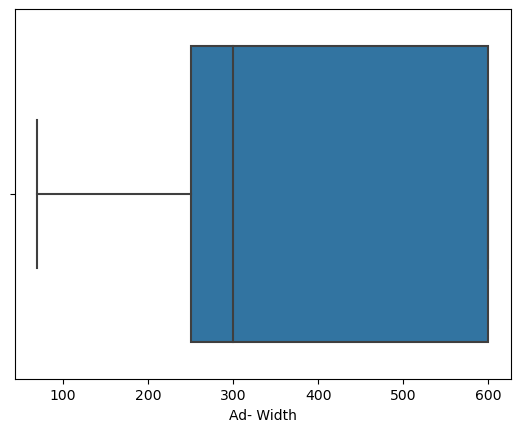

Desciption ofAd Size
__________________________________________
count     23066.000000
mean      96674.468048
std       61538.329557
min       33600.000000
25%       72000.000000
50%       72000.000000
75%       84000.000000
max      216000.000000
Name: Ad Size, dtype: float64 Distribution of Ad Size
__________________________________________
Boxplot of Ad Size
__________________________________________


C:\Users\kisho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


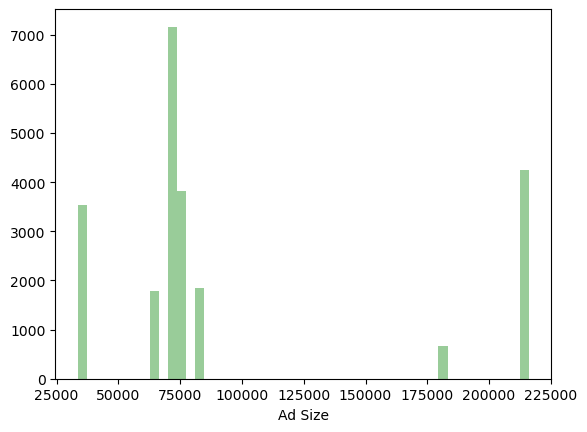

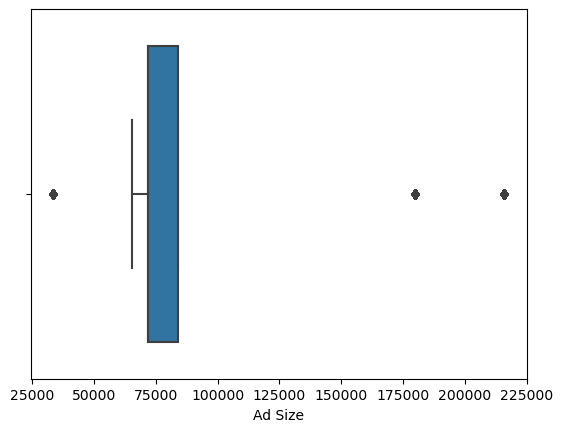

Desciption ofAvailable_Impressions
__________________________________________
count    2.306600e+04
mean     2.432044e+06
std      4.742888e+06
min      1.000000e+00
25%      3.367225e+04
50%      4.837710e+05
75%      2.527712e+06
max      2.759286e+07
Name: Available_Impressions, dtype: float64 Distribution of Available_Impressions
__________________________________________
Boxplot of Available_Impressions
__________________________________________


C:\Users\kisho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


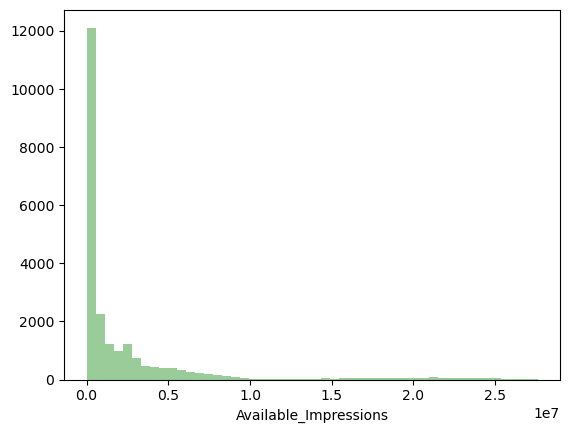

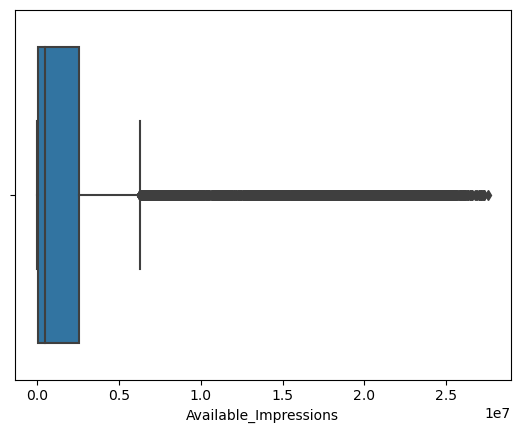

Desciption ofMatched_Queries
__________________________________________
count    2.306600e+04
mean     1.295099e+06
std      2.512970e+06
min      1.000000e+00
25%      1.828250e+04
50%      2.580875e+05
75%      1.180700e+06
max      1.470202e+07
Name: Matched_Queries, dtype: float64 Distribution of Matched_Queries
__________________________________________
Boxplot of Matched_Queries
__________________________________________


C:\Users\kisho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


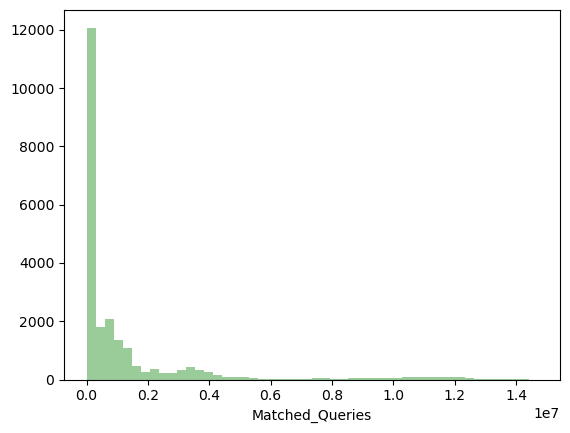

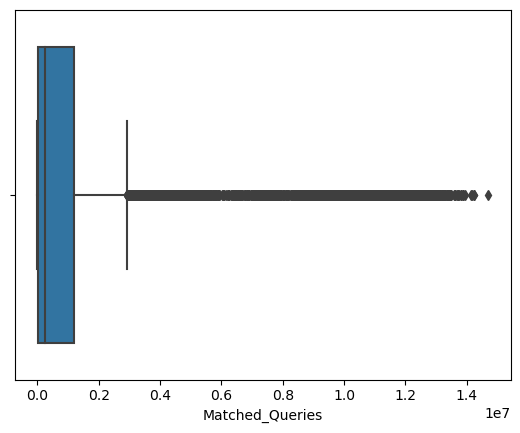

Desciption ofImpressions
__________________________________________
count    2.306600e+04
mean     1.241520e+06
std      2.429400e+06
min      1.000000e+00
25%      7.990500e+03
50%      2.252900e+05
75%      1.112428e+06
max      1.419477e+07
Name: Impressions, dtype: float64 Distribution of Impressions
__________________________________________
Boxplot of Impressions
__________________________________________


C:\Users\kisho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


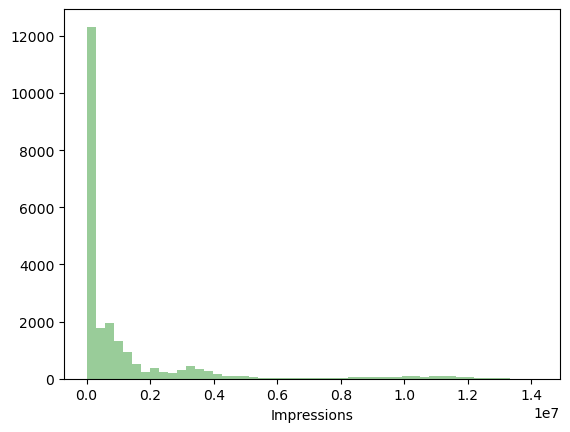

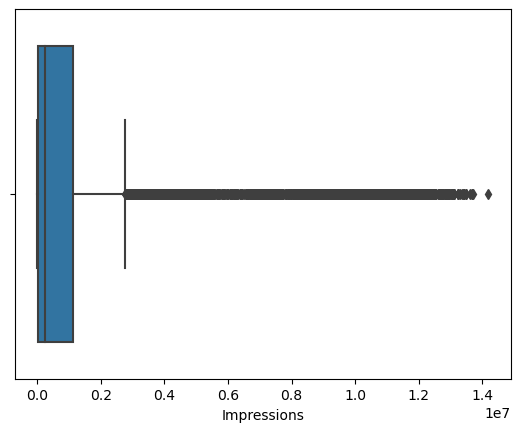

Desciption ofClicks
__________________________________________
count     23066.000000
mean      10678.518816
std       17353.409363
min           1.000000
25%         710.000000
50%        4425.000000
75%       12793.750000
max      143049.000000
Name: Clicks, dtype: float64 Distribution of Clicks
__________________________________________
Boxplot of Clicks
__________________________________________


C:\Users\kisho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


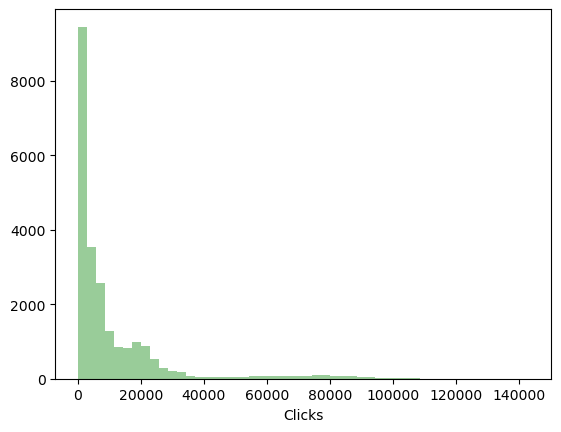

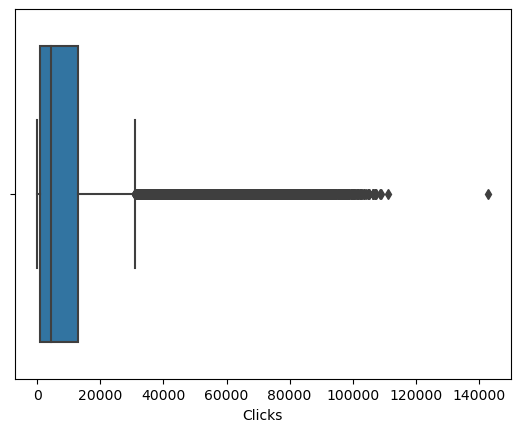

Desciption ofSpend
__________________________________________
count    23066.000000
mean      2706.625689
std       4067.927273
min          0.000000
25%         85.180000
50%       1425.125000
75%       3121.400000
max      26931.870000
Name: Spend, dtype: float64 Distribution of Spend
__________________________________________
Boxplot of Spend
__________________________________________


C:\Users\kisho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


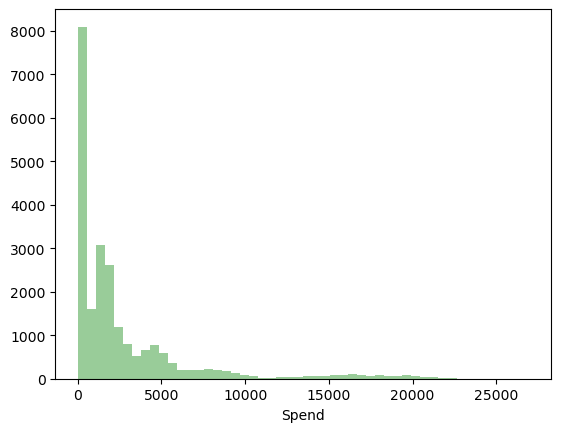

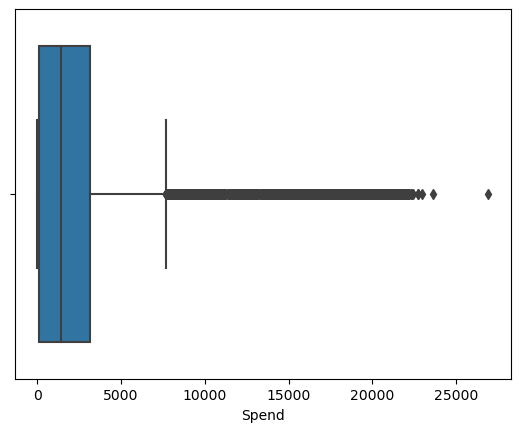

Desciption ofFee
__________________________________________
count    23066.000000
mean         0.335123
std          0.031963
min          0.210000
25%          0.330000
50%          0.350000
75%          0.350000
max          0.350000
Name: Fee, dtype: float64 Distribution of Fee
__________________________________________
Boxplot of Fee
__________________________________________


C:\Users\kisho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


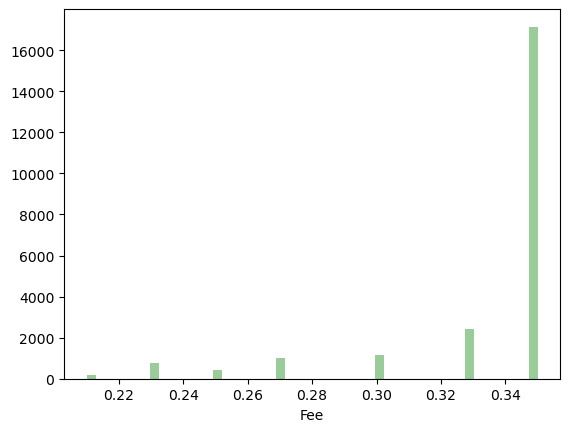

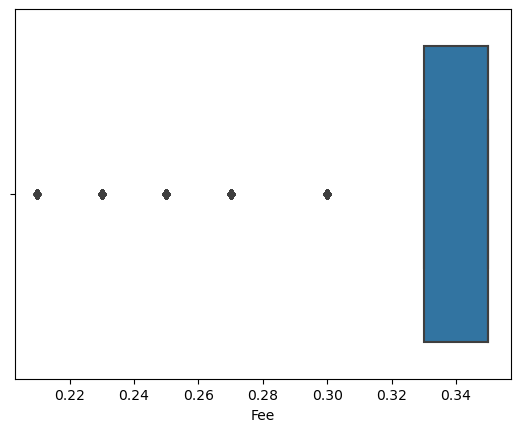

Desciption ofRevenue
__________________________________________
count    23066.000000
mean      1924.252331
std       3105.238410
min          0.000000
25%         55.365375
50%        926.335000
75%       2091.338150
max      21276.180000
Name: Revenue, dtype: float64 Distribution of Revenue
__________________________________________
Boxplot of Revenue
__________________________________________


C:\Users\kisho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


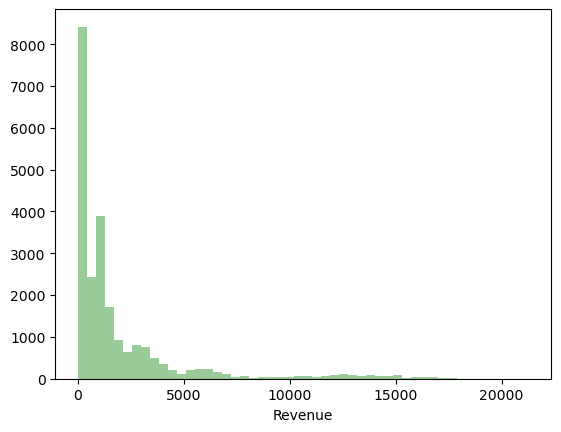

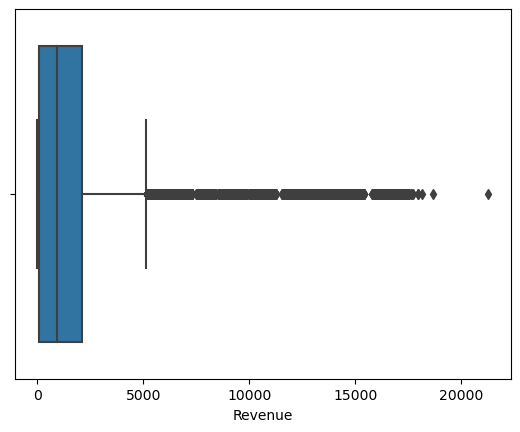

Desciption ofCTR
__________________________________________
count    23066.000000
mean         8.409941
std          9.262048
min          0.010874
25%          0.265107
50%          9.391248
75%         13.470571
max        200.000000
Name: CTR, dtype: float64 Distribution of CTR
__________________________________________
Boxplot of CTR
__________________________________________


C:\Users\kisho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


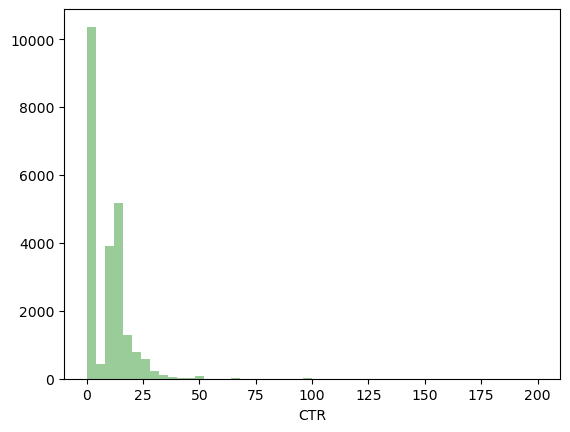

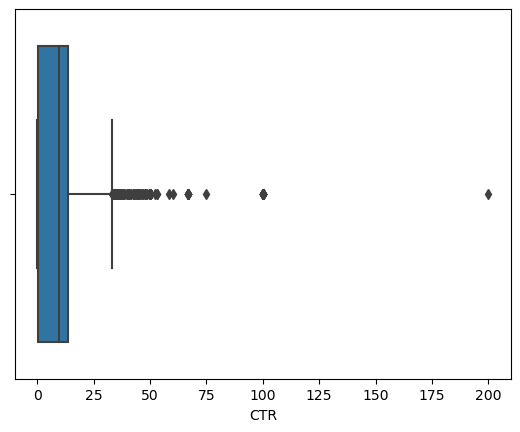

Desciption ofCPM
__________________________________________
count    23066.000000
mean         8.396849
std          9.057760
min          0.000000
25%          1.749084
50%          8.371566
75%         13.042018
max        715.000000
Name: CPM, dtype: float64 Distribution of CPM
__________________________________________
Boxplot of CPM
__________________________________________


C:\Users\kisho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


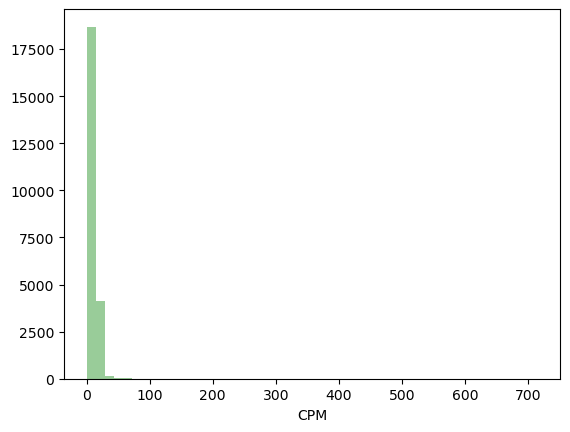

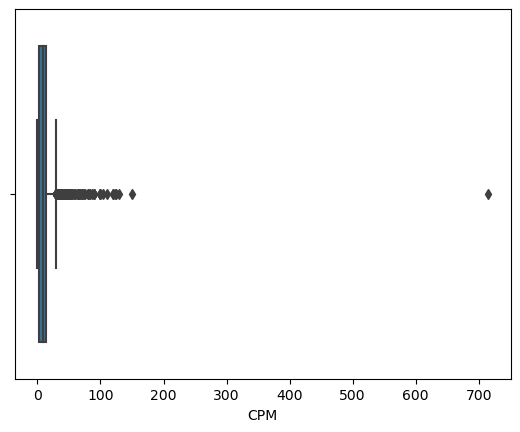

Desciption ofCPC
__________________________________________
count    23066.000000
mean         0.336678
std          0.341253
min          0.000000
25%          0.089736
50%          0.139347
75%          0.546242
max          7.264000
Name: CPC, dtype: float64 Distribution of CPC
__________________________________________
Boxplot of CPC
__________________________________________


C:\Users\kisho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


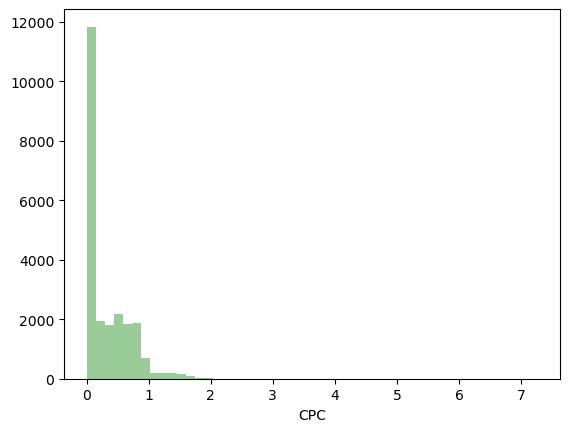

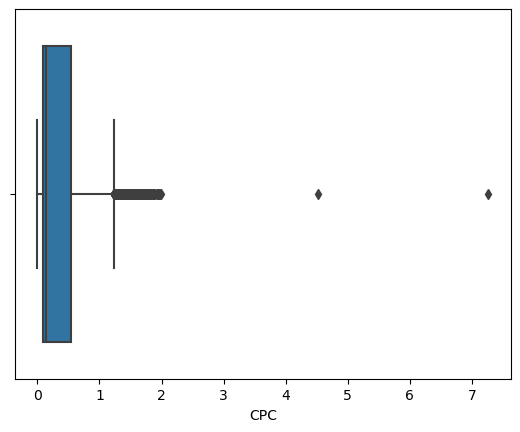

In [25]:
for i in data_df_num:
    univariate_num(i,20)

Let us define a function Univariate_cat to display information of Categorical Variable


This function will display the information about the frequency of all the level within the field and frequency plot

In [26]:
def univariate_cat(column):
    print('Description of '+ column)
    print('____________________________________')
    print(data_df_cat[column].value_counts())
    
    plt.figure()
    data_df_cat[column].value_counts().plot.bar(title='Frequency of ' + column)
    plt.show()
    print(' ')
    

Description of Timestamp
____________________________________
2020-11-13-22    13
2020-11-20-9     13
2020-11-14-23    13
2020-10-18-1     13
2020-9-23-15     13
                 ..
2020-9-2-5       10
2020-9-4-19      10
2020-9-2-11      10
2020-9-3-11       9
2020-9-1-16       2
Name: Timestamp, Length: 2018, dtype: int64


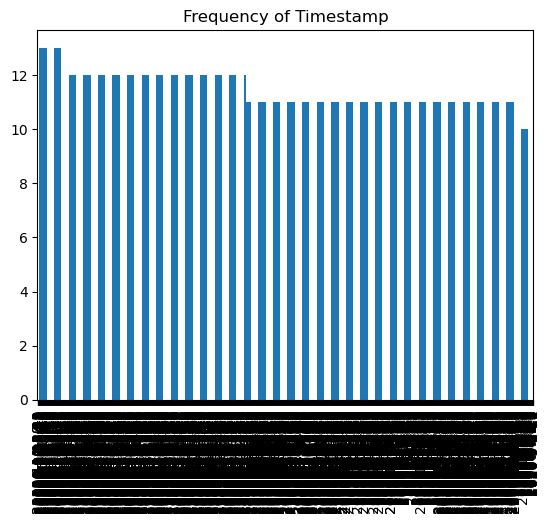

 
Description of InventoryType
____________________________________
Format4    7165
Format5    4249
Format1    3814
Format3    3540
Format6    1850
Format2    1789
Format7     659
Name: InventoryType, dtype: int64


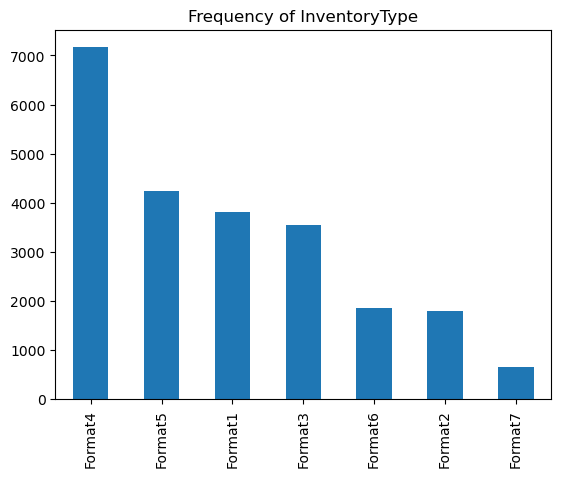

 
Description of Ad Type
____________________________________
Inter224    1658
Inter217    1655
Inter223    1654
Inter219    1650
Inter221    1650
Inter222    1649
Inter229    1648
Inter227    1647
Inter218    1645
inter230    1644
Inter220    1644
Inter225    1643
Inter226    1640
Inter228    1639
Name: Ad Type, dtype: int64


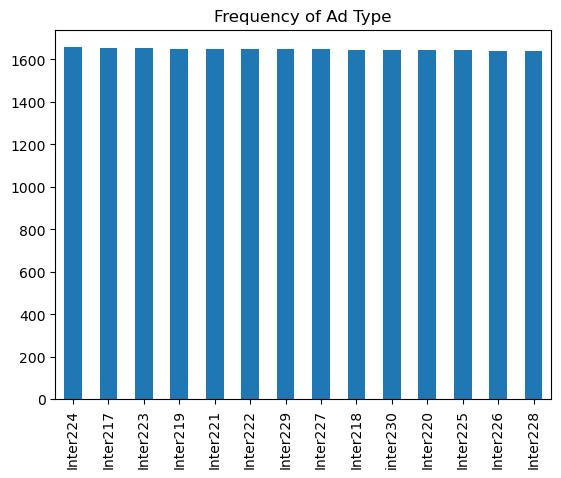

 
Description of Platform
____________________________________
Video    9873
Web      8251
App      4942
Name: Platform, dtype: int64


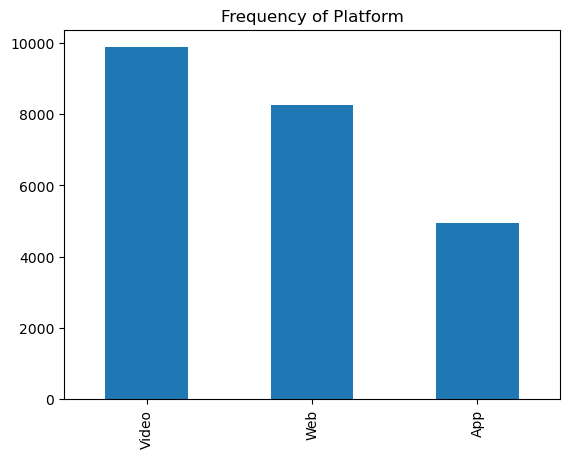

 
Description of Device Type
____________________________________
Mobile     14806
Desktop     8260
Name: Device Type, dtype: int64


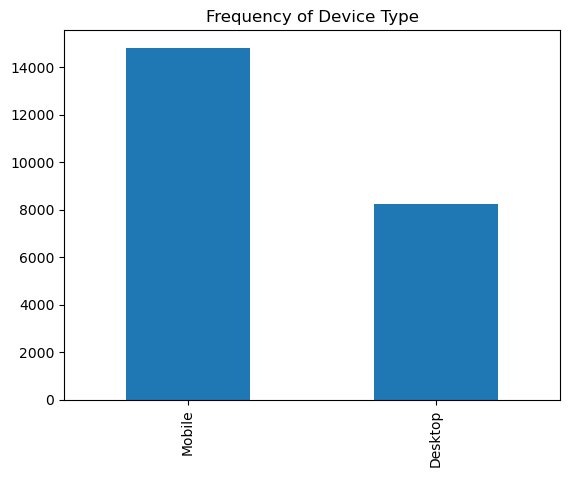

 
Description of Format
____________________________________
Video      11552
Display    11514
Name: Format, dtype: int64


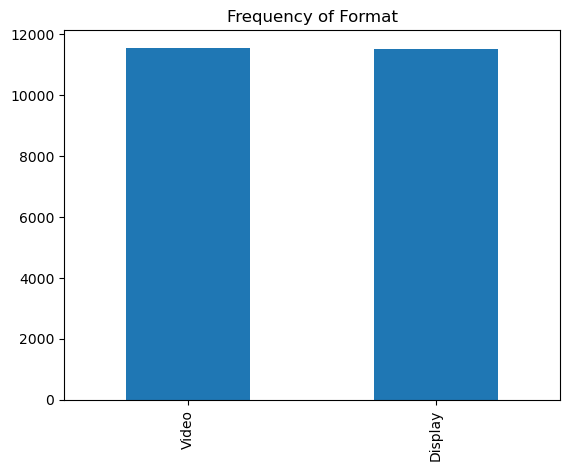

In [27]:
for i in listcatagorycolmn:
    univariate_cat(i)

### Bivariate Analysis

In [28]:
corr = data_df_num.corr(method='pearson')

C:\Users\kisho\AppData\Local\Temp\ipykernel_25616\3081337780.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.triu(np.ones_like(corr,dtype=np.bool))


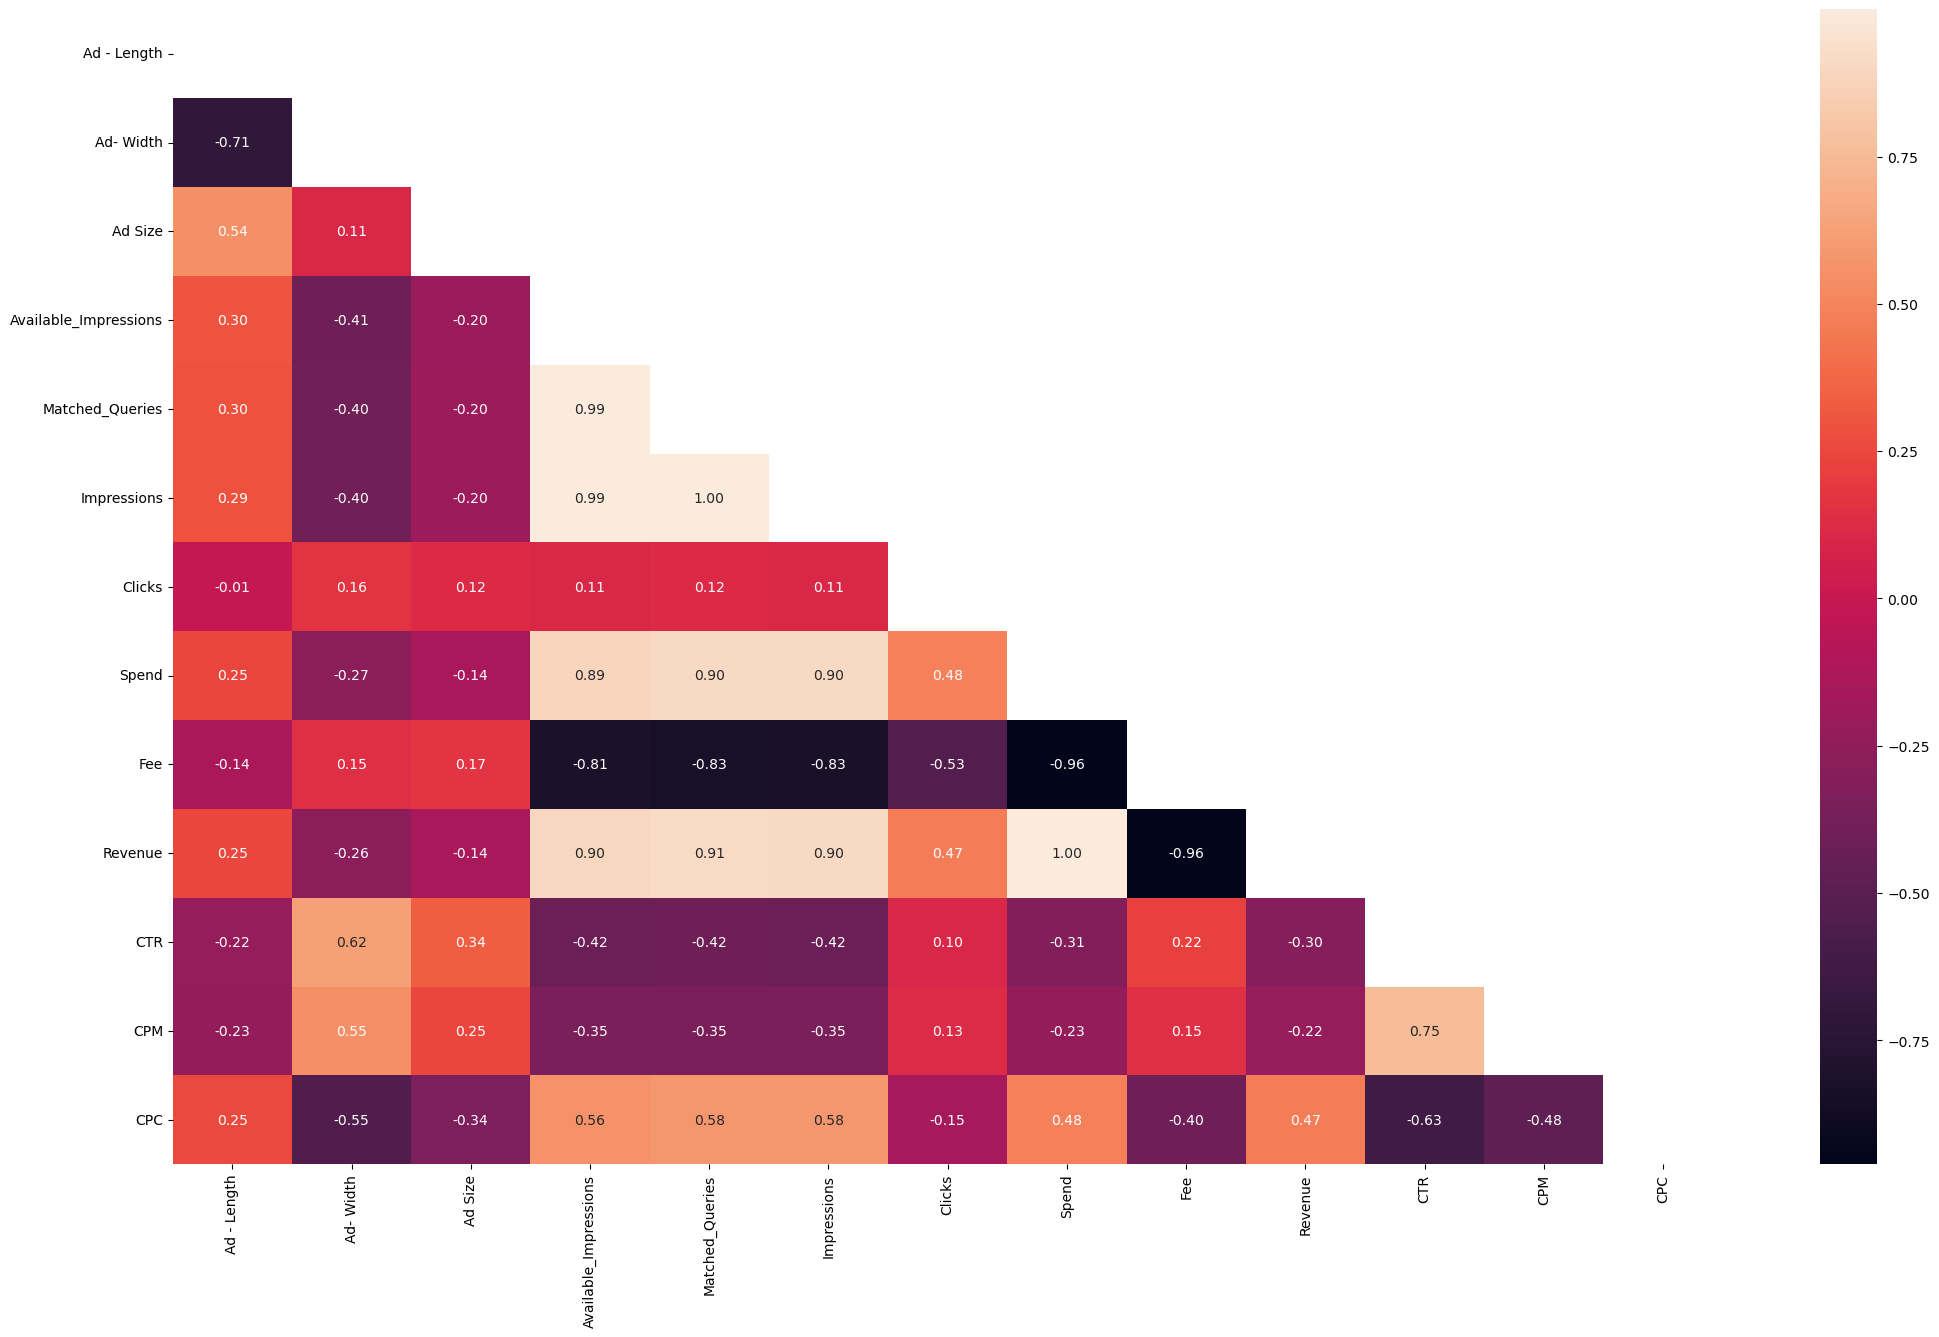

In [29]:
mask=np.triu(np.ones_like(corr,dtype=np.bool))
fig=plt.subplots(figsize=(25,15))
sns.heatmap(data_df_num.corr(),annot=True, fmt='.2f',mask=mask)
plt.show()

3-Check if there are any outliers. Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst)

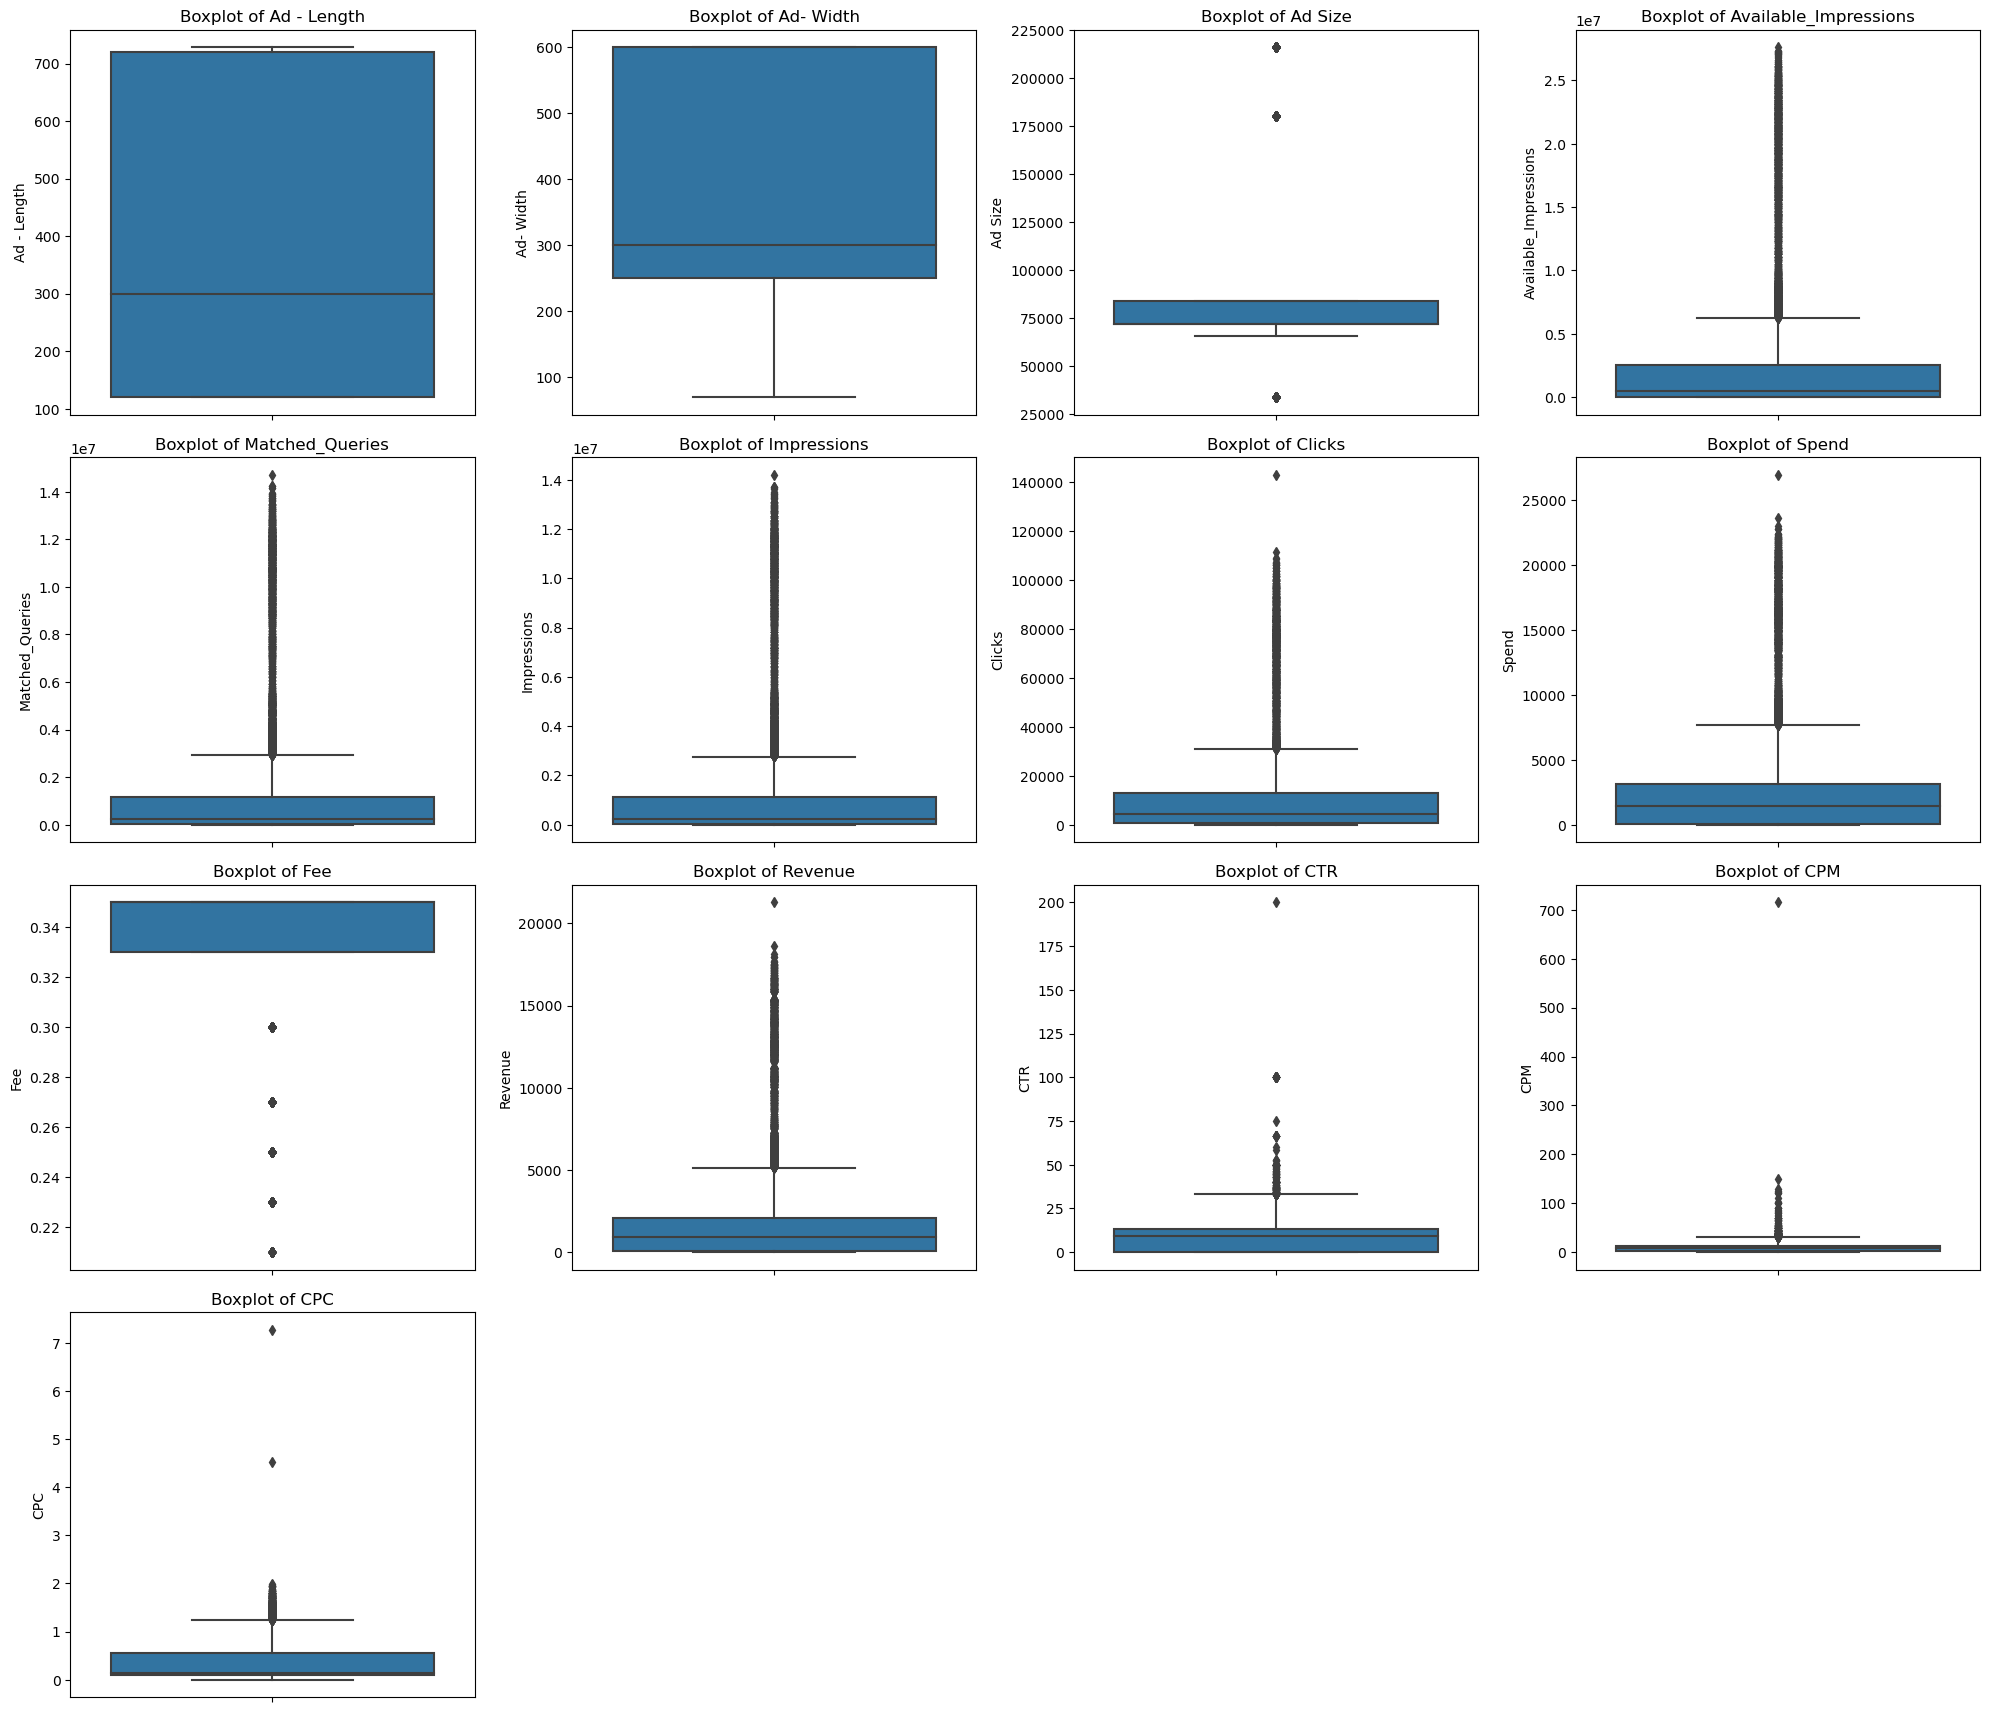

In [30]:
#Check for presence of outliers in each feature
plt.figure(figsize = (20,30))
feature_list = data_df_num.columns
for i in range(len(feature_list)):
    plt.subplot(7, 4 , i + 1)
    sns.boxplot(y = data_df[feature_list[i]], data = data_df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

To treat outliers lets define a function 'remove_outlier'.

* For the higher outliers we will treat it to get it at 95 percentile value.

* Lower level outliers will be treating it to get it at 5 percentile value.

### Clustering: Check if there are any outliers. Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst).

In [31]:
no_outliers=['Ad_Length','Ad_Width']

In [32]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(x):
    Q5 = np.percentile(x,5)
    Q25 = np.percentile(x,25)
    Q75 = np.percentile(x,75)
    Q95 = np.percentile(x,95)
    IQR=Q75-Q25
    lower_range= Q25-(1.5 * IQR)
    upper_range= Q75+(1.5 * IQR)
    return x.apply(lambda y: Q95 if y> upper_range else y).apply(lambda y: Q5 if y <  lower_range else y)

In [33]:
outlierlist = [x for x in data_df_num.columns if x not in no_outliers]

In [34]:
for i in data_df_num[outlierlist]:
    data_df_num[i] = remove_outlier(data_df_num[i])

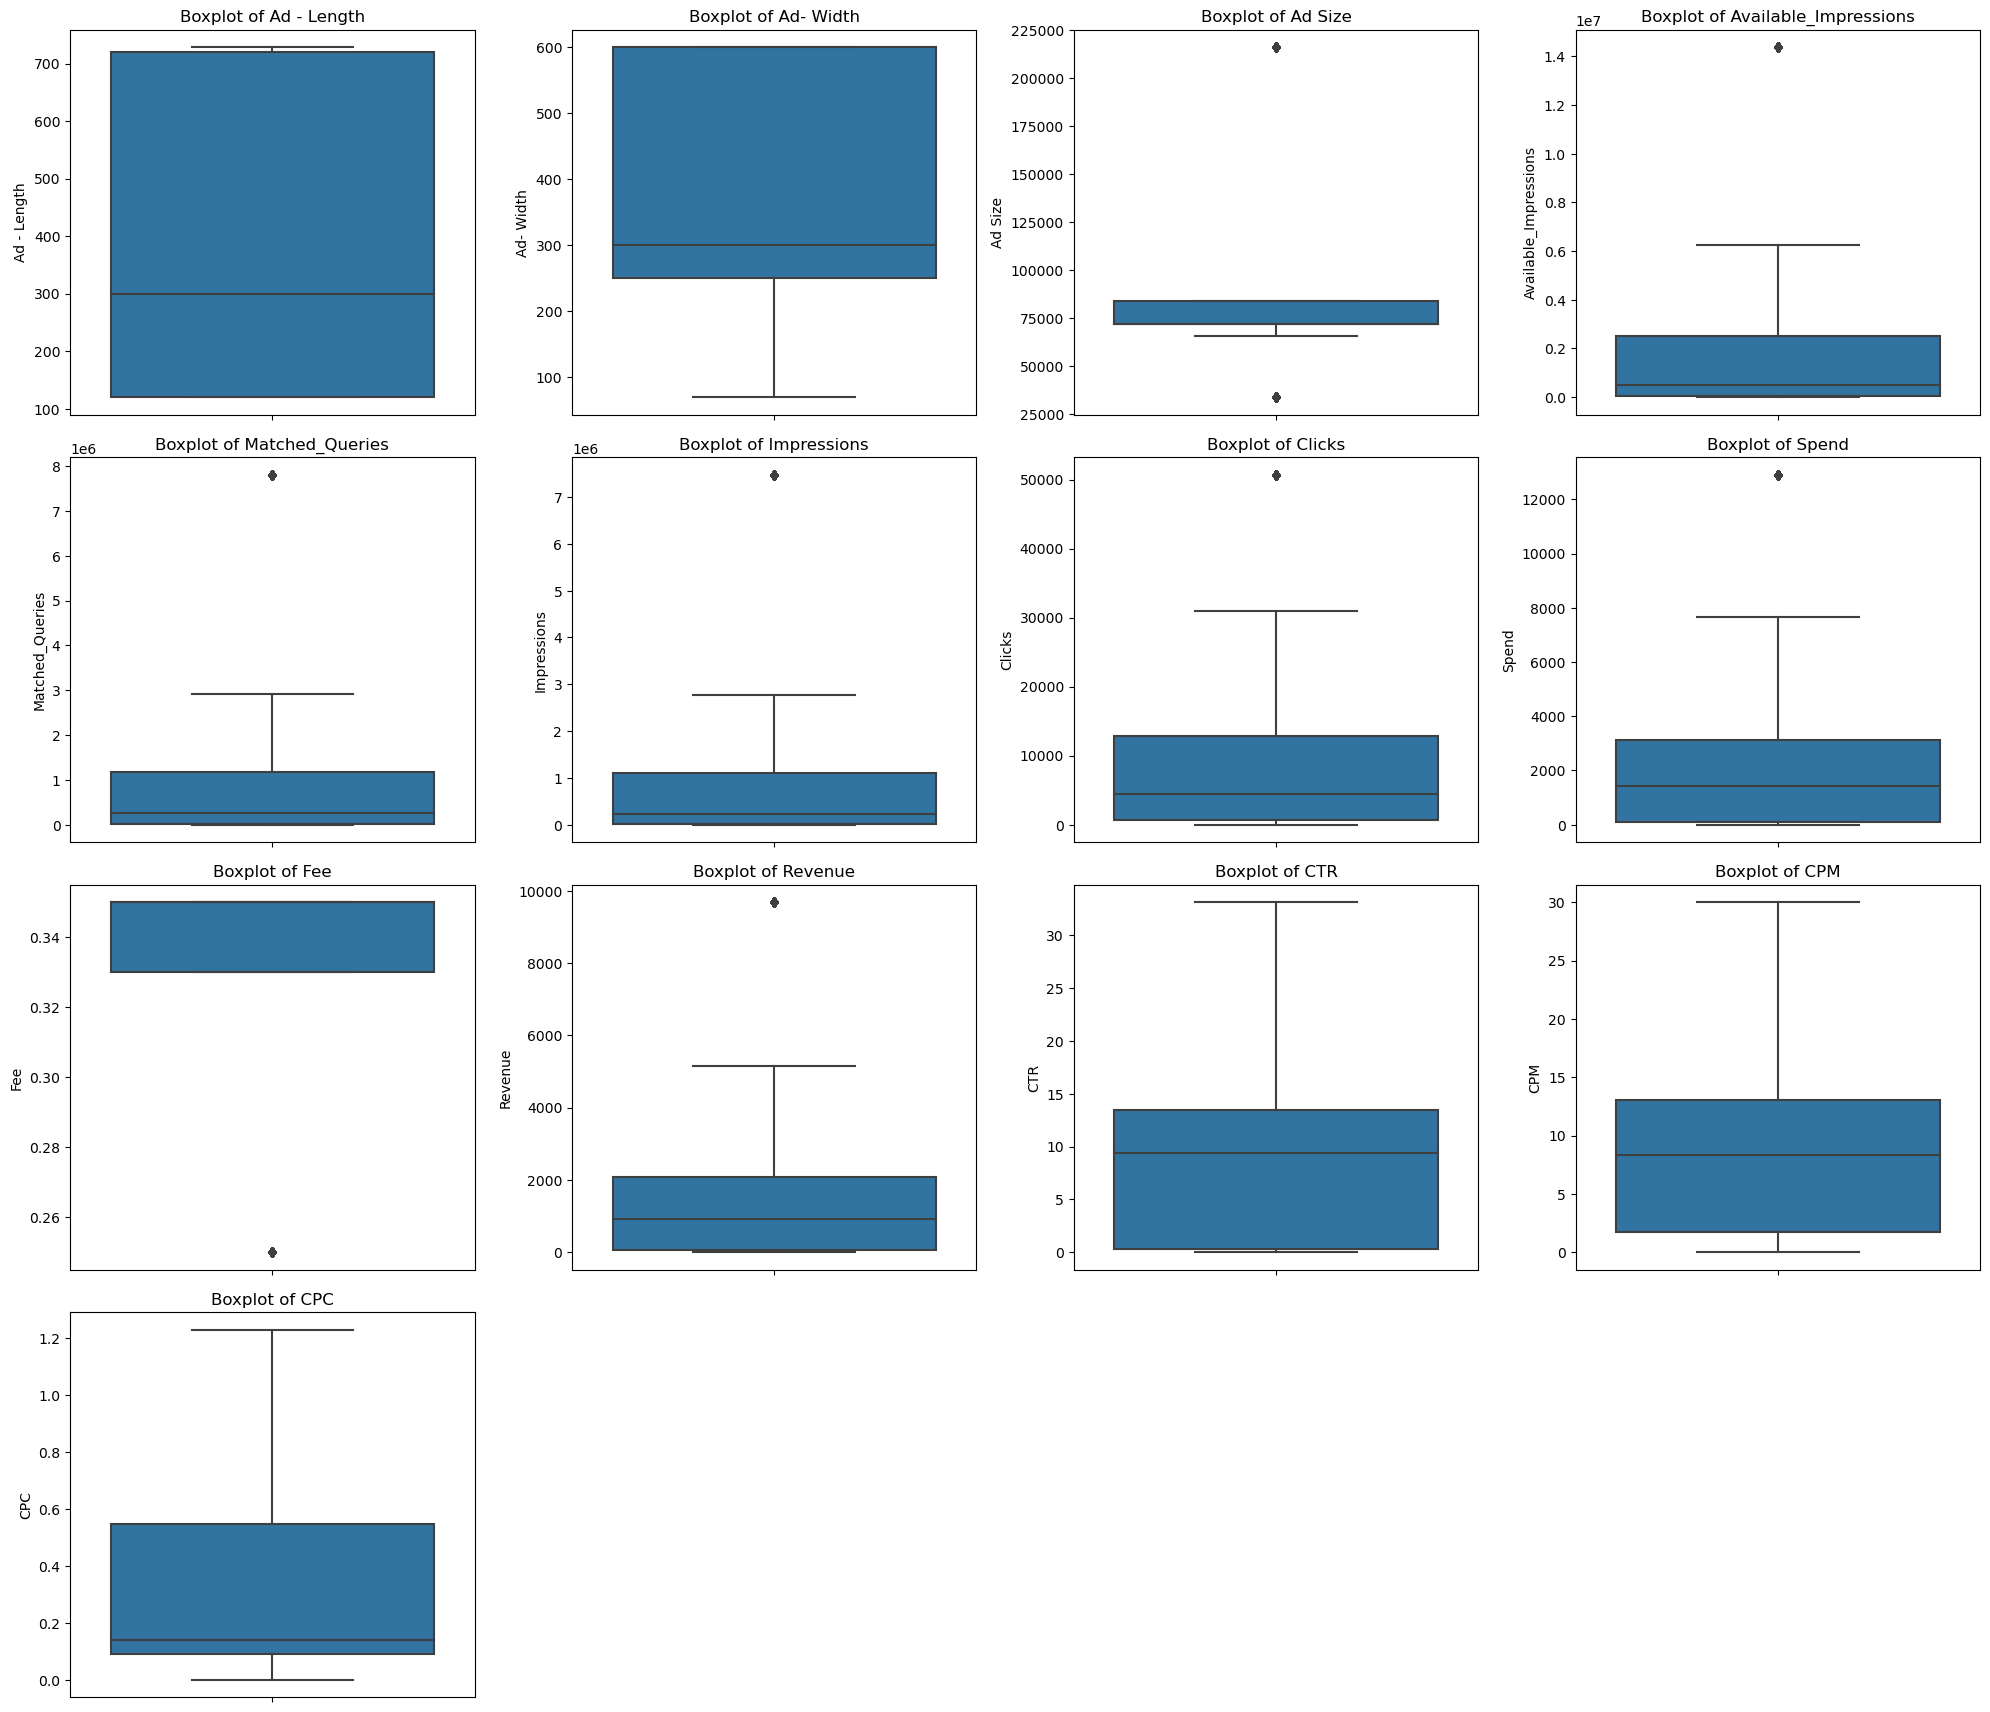

In [35]:
#Check to verify if outliers have been treated
plt.figure(figsize = (20,30))
feature_list = data_df_num.columns
for i in range(len(feature_list)):
    plt.subplot(7, 4 , i + 1)
    sns.boxplot(y = data_df_num[feature_list[i]], data = data_df_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

#### Standardising data with zscore

In [36]:
data_df_num = data_df_num.drop(['Ad Size','CTR','CPC','CPM'],axis = 1)

### Clustering: Perform z-score scaling and discuss how it affects the speed of the algorithm.

In [37]:
#Scale the data
from scipy.stats import zscore
scaled_df = data_df_num.apply(zscore)

In [38]:
scaled_df

Ad - Length  Ad- Width  Available_Impressions  Matched_Queries  \
0        -0.364496  -0.432797              -0.569484        -0.567061   
1        -0.364496  -0.432797              -0.569490        -0.567076   
2        -0.364496  -0.432797              -0.569269        -0.567049   
3        -0.364496  -0.432797              -0.569339        -0.566994   
4        -0.364496  -0.432797              -0.569622        -0.567093   
...            ...        ...                    ...              ...   
23061     1.433093  -0.186599              -0.569906        -0.567185   
23062     1.433093  -0.186599              -0.569905        -0.567185   
23063     1.433093  -0.186599              -0.569905        -0.567185   
23064    -1.134891   1.290590              -0.569904        -0.567185   
23065     1.433093  -0.186599              -0.569905        -0.567185   

       Impressions    Clicks     Spend       Fee   Revenue  
0        -0.563943 -0.719779 -0.722776  0.487214 -0.676118  
1        -0.563958 -0.719779 -0.722776  0.487214 -0.676118  
2        -0.563931 -0.719779 -0.722776  0.487214 -0.676118  
3        -0.563875 -0.719779 -0.722776  0.487214 -0.676118  
4        -0.563975 -0.719779 -0.722776  0.487214 -0.676118  
...            ...       ...       ...       ...       ...  
23061    -0.564071 -0.719779 -0.722756  0.487214 -0.676102  
23062    -0.564071 -0.719779 -0.722765  0.487214 -0.676109  
23063    -0.564071 -0.719779 -0.722762  0.487214 -0.676107  
23064    -0.564071 -0.719779 -0.722756  0.487214 -0.676102  
23065    -0.564071 -0.719779 -0.722751  0.487214 -0.676098  

[23066 rows x 9 columns]

### Importing dendrogram and linkage module

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage

#### Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.

In [40]:
wardlink = linkage(scaled_df, method = 'ward',metric='euclidean')

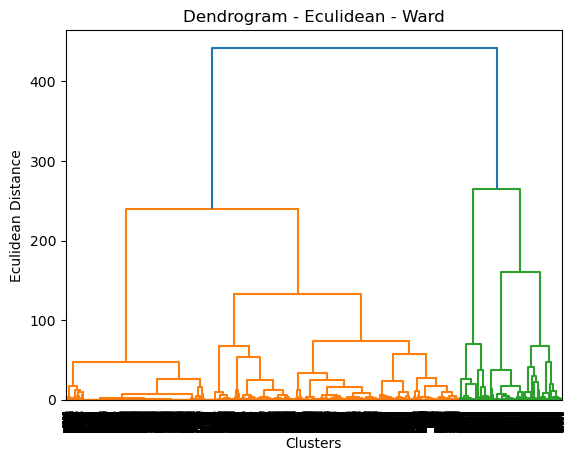

In [41]:
dend = dendrogram(wardlink)
plt.title('Dendrogram - Eculidean - Ward')
plt.ylabel('Eculidean Distance')
plt.xlabel('Clusters')
plt.show()


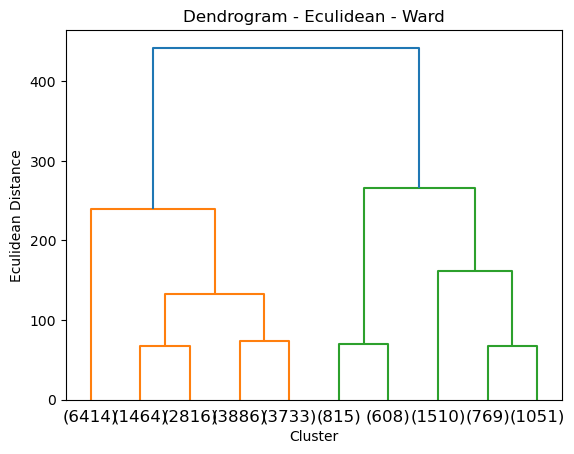

In [42]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )
plt.title('Dendrogram - Eculidean - Ward')
plt.ylabel('Eculidean Distance')
plt.xlabel('Cluster')
plt.show()

In [43]:
from scipy.cluster.hierarchy import fcluster 

In [44]:
clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [45]:
scaled_df

Ad - Length  Ad- Width  Available_Impressions  Matched_Queries  \
0        -0.364496  -0.432797              -0.569484        -0.567061   
1        -0.364496  -0.432797              -0.569490        -0.567076   
2        -0.364496  -0.432797              -0.569269        -0.567049   
3        -0.364496  -0.432797              -0.569339        -0.566994   
4        -0.364496  -0.432797              -0.569622        -0.567093   
...            ...        ...                    ...              ...   
23061     1.433093  -0.186599              -0.569906        -0.567185   
23062     1.433093  -0.186599              -0.569905        -0.567185   
23063     1.433093  -0.186599              -0.569905        -0.567185   
23064    -1.134891   1.290590              -0.569904        -0.567185   
23065     1.433093  -0.186599              -0.569905        -0.567185   

       Impressions    Clicks     Spend       Fee   Revenue  
0        -0.563943 -0.719779 -0.722776  0.487214 -0.676118  
1        -0.563958 -0.719779 -0.722776  0.487214 -0.676118  
2        -0.563931 -0.719779 -0.722776  0.487214 -0.676118  
3        -0.563875 -0.719779 -0.722776  0.487214 -0.676118  
4        -0.563975 -0.719779 -0.722776  0.487214 -0.676118  
...            ...       ...       ...       ...       ...  
23061    -0.564071 -0.719779 -0.722756  0.487214 -0.676102  
23062    -0.564071 -0.719779 -0.722765  0.487214 -0.676109  
23063    -0.564071 -0.719779 -0.722762  0.487214 -0.676107  
23064    -0.564071 -0.719779 -0.722756  0.487214 -0.676102  
23065    -0.564071 -0.719779 -0.722751  0.487214 -0.676098  

[23066 rows x 9 columns]

In [46]:
# Create K Means cluster and store the result in the object k_means

k_means = KMeans(n_clusters=2)

In [47]:
# Fit K means on the scaled_df

k_means.fit(scaled_df)

KMeans(n_clusters=2)

In [48]:
# Get the labels
k_means.labels_

array([0, 0, 0, ..., 0, 0, 0])

### Inertia: Intuitively, inertia tells how far away the points within a cluster are. Therefore, a small of inertia is aimed for. The range of inertia’s value starts from zero and goes up.

In [49]:
# Get the labels
k_means.inertia_

108189.6239447604

In [50]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

207593.99999999994

In [51]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

45776.16250982992

In [52]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

74640.91071748665

In [53]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

32885.80022549846

In [54]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

23999.019339094

In [55]:
k_means = KMeans(n_clusters = 10,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

14285.848164990997

In [56]:
wss =[] 

In [57]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [58]:
wss

[207593.99999999994,
 108189.6239447604,
 74640.91071748665,
 45776.16250982992,
 32885.80022549847,
 23999.019339094,
 21198.562805862166,
 18321.164510700273,
 16217.171372512052,
 14285.848164990997]

### Elbow plot 

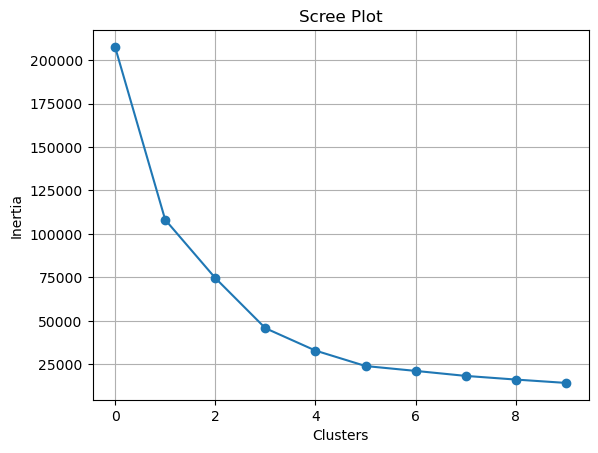

In [59]:
import matplotlib.pyplot as plt
plt.plot(wss,marker='o')
plt.title('Scree Plot')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

### The value of inertia decreases as the number of clusters increase. So, its a trade-off here. Rule of thumb: The elbow point in the inertia graph is a good choice because after that the change in the value of inertia isn’t significant.

In [60]:
k_mean = KMeans(n_clusters = 3,random_state=1)
k_mean.fit(scaled_df)
labels = k_mean.labels_


### Silhouette score: Silhouette score tells how far away the datapoints in one cluster are, from the datapoints in another cluster. The range of silhouette score is from -1 to 1. Score should be closer to 1 than -1

In [61]:
from sklearn.metrics import silhouette_samples, silhouette_score 

In [62]:
# Calculating silhouette_score

silhouette_score(scaled_df,labels)


0.6103948547379058

In [63]:
silhouette_samples(scaled_df,labels)

array([0.71104063, 0.71104003, 0.71104497, ..., 0.67314779, 0.65595062,
       0.6731479 ])

#### Cluster evaluation for 3 clusters

In [64]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [65]:
silhouette_score(scaled_df,labels)

0.5870324530524043

In [66]:
k_means = KMeans(n_clusters = 10,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [67]:
silhouette_score(scaled_df,labels)

0.6000967248570664

In [68]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [69]:
silhouette_score(scaled_df,labels)

0.6103948547379058

silhouette scores is better for 3 clusters

### silhouette scores for up to 10 clusters and identify optimum number of clusters.

In [70]:
# Silhouette Analysis
from sklearn.metrics import silhouette_score
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for num_clusters in range_n_clusters:
    
    # initialize K means
    kmeans=KMeans(n_clusters=num_clusters, random_state=1)
    kmeans.fit(scaled_df)
    cluster_labels=kmeans.labels_
    #Silhouette Score
    silhouette_avg = silhouette_score(scaled_df,cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5870324530524043
For n_clusters=3, the silhouette score is 0.6103948547379058
For n_clusters=4, the silhouette score is 0.555221680065372
For n_clusters=5, the silhouette score is 0.5773630084915508
For n_clusters=6, the silhouette score is 0.5957732961411462
For n_clusters=7, the silhouette score is 0.5842355612764497
For n_clusters=8, the silhouette score is 0.5969869221629418
For n_clusters=9, the silhouette score is 0.5894958578044271
For n_clusters=10, the silhouette score is 0.6000967248570664


In [71]:
data_df["Clus_kmeans"] = labels
data_df.head()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue       CTR  CPM  CPC  Clus_kmeans  
0          323       1    0.0  0.35      0.0  0.309598  0.0  0.0            0  
1          285       1    0.0  0.35      0.0  0.350877  0.0  0.0            0  
2          355       1    0.0  0.35      0.0  0.281690  0.0  0.0            0  
3          495       1    0.0  0.35      0.0  0.202020  0.0  0.0            0  
4          242       1    0.0  0.35      0.0  0.413223  0.0  0.0            0

In [72]:
pivot=data_df.pivot_table(index=['Clus_kmeans'],values=['Clicks','Spend','Revenue'], aggfunc='sum')
print(pivot)
pivot1=data_df.pivot_table(index=['Clus_kmeans'],values=['Clicks','Spend','Revenue'], aggfunc='mean')
print(pivot1)

                Clicks       Revenue        Spend
Clus_kmeans                                      
0            107233013  1.311737e+07  20038411.78
1             41425420  2.381066e+07  32029293.10
2             97652282  7.456779e+06  10363323.26
                   Clicks      Revenue        Spend
Clus_kmeans                                        
0             5840.896182   714.492385  1091.476212
1            12648.983206  7270.430351  9779.936824
2            68192.934358  5207.248021  7236.957584


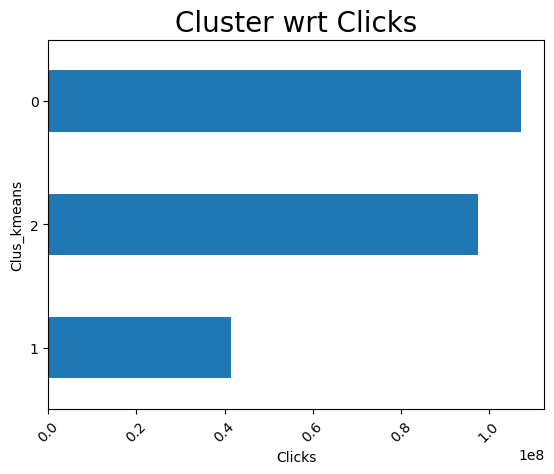

In [73]:
data_df.groupby('Clus_kmeans')['Clicks'].sum().sort_values().plot.barh();
plt.xlabel('Clicks',fontsize = 10)
plt.ylabel('Clus_kmeans',fontsize = 10)
plt.xticks(fontsize=10, rotation=45)
plt.title('Cluster wrt Clicks', fontsize=20)
plt.show()

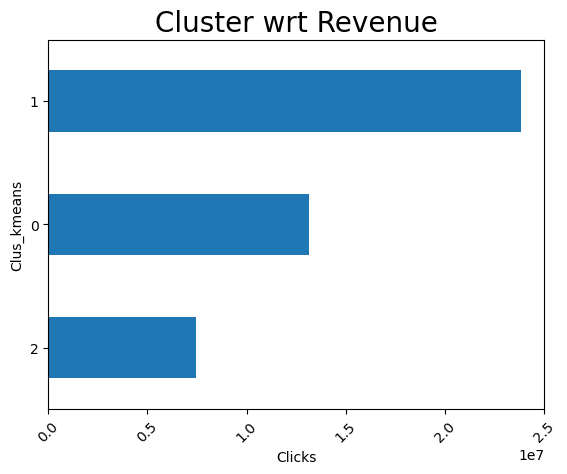

In [74]:
data_df.groupby('Clus_kmeans')['Revenue'].sum().sort_values().plot.barh();
plt.xlabel('Clicks',fontsize = 10)
plt.ylabel('Clus_kmeans',fontsize = 10)
plt.xticks(fontsize=10, rotation=45)
plt.title('Cluster wrt Revenue', fontsize=20)
plt.show()

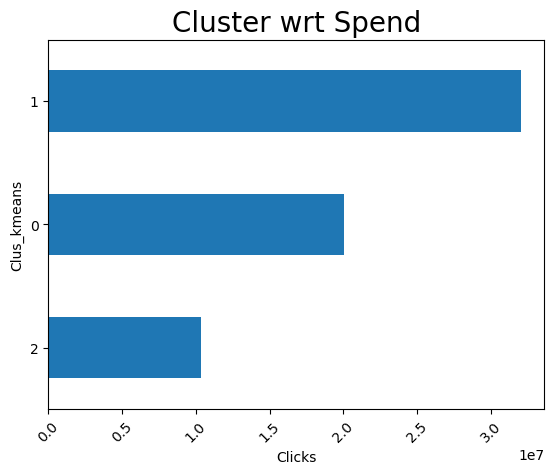

In [75]:
data_df.groupby('Clus_kmeans')['Spend'].sum().sort_values().plot.barh();
plt.xlabel('Clicks',fontsize = 10)
plt.ylabel('Clus_kmeans',fontsize = 10)
plt.xticks(fontsize=10, rotation=45)
plt.title('Cluster wrt Spend', fontsize=20)
plt.show()

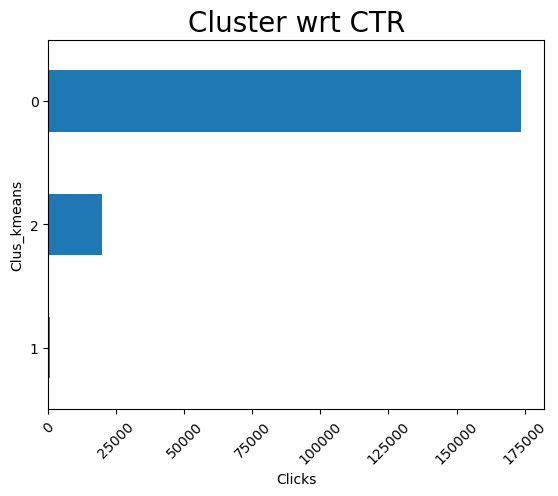

In [76]:
data_df.groupby('Clus_kmeans')['CTR'].sum().sort_values().plot.barh();
plt.xlabel('Clicks',fontsize = 10)
plt.ylabel('Clus_kmeans',fontsize = 10)
plt.xticks(fontsize=10, rotation=45)
plt.title('Cluster wrt CTR', fontsize=20)
plt.show()

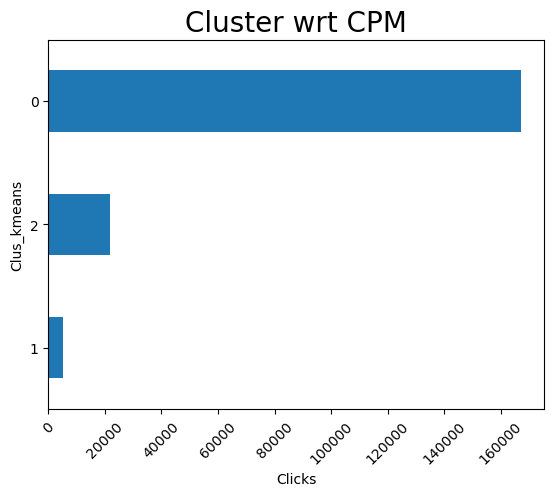

In [77]:
data_df.groupby('Clus_kmeans')['CPM'].sum().sort_values().plot.barh();
plt.xlabel('Clicks',fontsize = 10)
plt.ylabel('Clus_kmeans',fontsize = 10)
plt.xticks(fontsize=10, rotation=45)
plt.title('Cluster wrt CPM', fontsize=20)
plt.show()

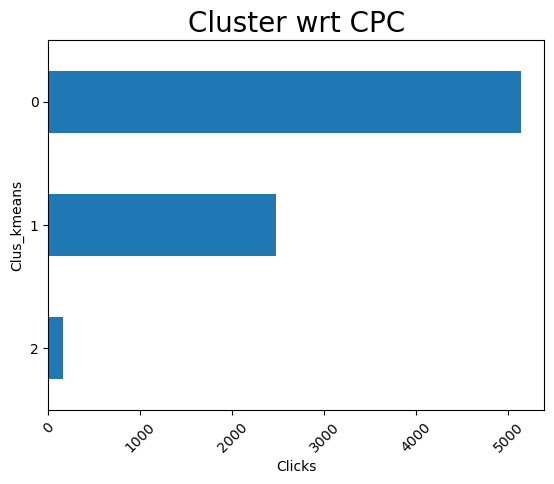

In [78]:
data_df.groupby('Clus_kmeans')['CPC'].sum().sort_values().plot.barh();
plt.xlabel('Clicks',fontsize = 10)
plt.ylabel('Clus_kmeans',fontsize = 10)
plt.xticks(fontsize=10, rotation=45)
plt.title('Cluster wrt CPC', fontsize=20)
plt.show()

## Cluster Profile

In [79]:
data_df.Clus_kmeans.value_counts().sort_index()

0    18359
1     3275
2     1432
Name: Clus_kmeans, dtype: int64

In [80]:
clust_profile=data_df.drop(['Available_Impressions','Matched_Queries','Impressions'],axis=1)
clust_profile=clust_profile.groupby('Clus_kmeans').sum().round(2)
clust_profile['Device Type']=data_df.Clus_kmeans.value_counts().sort_index()
clust_profile

Ad - Length  Ad- Width     Ad Size     Clicks        Spend  \
Clus_kmeans                                                               
0                7072180    6356350  1877898000  107233013  20038411.78   
1                1608868     618260   243527280   41425420  32029293.10   
2                 203124     819300   108468000   97652282  10363323.26   

                 Fee      Revenue        CTR        CPM      CPC  Device Type  
Clus_kmeans                                                                    
0            6400.80  13117365.69  173568.43  166988.71  5134.83        18359  
1             920.68  23810659.40     697.52    5036.87  2473.71         3275  
2             408.47   7456779.17   19717.76   21656.14   157.26         1432

### 8-Conclude the project by providing summary of your learnings.

Cluster 0: High Ad Size with Low Clicks with Medium Spend with High Fee generated Medium Revenue

Cluster 1: Low Ad Size with Medium Clicks  with High Spend with Low Fee generated High Revenue

Cluster 2: Medium Ad Size with High Click with Medium Spend with Medium Fee generated Medium Revenue


In [81]:
#data_df.to_excel('Ad_Cluster.xlsx')
data_df.to_excel('Ad_Cluster New.xlsx')

## PCA:

PCA FH (FT): Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011 PCA for Female Headed Household Excluding Institutional Household. The Indian Census has the reputation of being one of the best in the world. The first Census in India was conducted in the year 1872. This was conducted at different points of time in different parts of the country. In 1881 a Census was taken for the entire country simultaneously. Since then, Census has been conducted every ten years, without a break. Thus, the Census of India 2011 was the fifteenth in this unbroken series since 1872, the seventh after independence and the second census of the third millennium and twenty first century. The census has been uninterruptedly continued despite of several adversities like wars, epidemics, natural calamities, political unrest, etc. The Census of India is conducted under the provisions of the Census Act 1948 and the Census Rules, 1990. The Primary Census Abstract which is important publication of 2011 Census gives basic information on Area, Total Number of Households, Total Population, Scheduled Castes, Scheduled Tribes Population, Population in the age group 0-6, Literates, Main Workers and Marginal Workers classified by the four broad industrial categories, namely, (i) Cultivators, (ii) Agricultural Laborers, (iii) Household Industry Workers, and (iv) Other Workers and also Non-Workers. The characteristics of the Total Population include Scheduled Castes, Scheduled Tribes, Institutional and Houseless Population and are presented by sex and rural-urban residence. Census 2011 covered 35 States/Union Territories, 640 districts, 5,924 sub-districts, 7,935 Towns and 6,40,867 Villages.
The data collected has so many variables thus making it difficult to find useful details without using Data Science Techniques. You are tasked to perform detailed EDA and identify Optimum Principal Components that explains the most variance in data. Use Sklearn only.

In [82]:
#Import the basic libraries to get started with EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from factor_analyzer import FactorAnalyzer # Perform statistical tests before PCA 
import warnings
warnings.filterwarnings("ignore")

In [83]:
df_pca = pd.read_excel('PCA India Data_Census.xlsx')

In [84]:
df_pca.head()

State Code  Dist.Code            State    Area Name  No_HH  TOT_M  TOT_F  \
0           1          1  Jammu & Kashmir      Kupwara   7707  23388  29796   
1           1          2  Jammu & Kashmir       Badgam   6218  19585  23102   
2           1          3  Jammu & Kashmir  Leh(Ladakh)   4452   6546  10964   
3           1          4  Jammu & Kashmir       Kargil   1320   2784   4206   
4           1          5  Jammu & Kashmir        Punch  11654  20591  29981   

   M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  \
0  5862  6196     3  ...           1150            749            180   
1  4482  3733     7  ...            525            715            123   
2  1082  1018     3  ...            114            188             44   
3   563   677     0  ...            194            247             61   
4  5157  4587    20  ...            874           1928            465   

   MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
0            237            680            252             32             46   
1            229            186            148             76            178   
2             89              3             34              0              4   
3            128             13             50              4             10   
4           1043            205            302             24            105   

   NON_WORK_M  NON_WORK_F  
0         258         214  
1         140         160  
2          67          61  
3         116          59  
4         180         478  

[5 rows x 61 columns]

In [85]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [86]:
df_pca.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

No null values in the dataset,

In [87]:
df_pca.duplicated().sum()

0

Zero duplicate data available.

In [88]:
df_pca.shape

(640, 61)

In [89]:
round(df_pca.describe().T,2)

count       mean        std    min       25%      50%  \
State Code      640.0      17.11       9.43    1.0      9.00     18.0   
Dist.Code       640.0     320.50     184.90    1.0    160.75    320.5   
No_HH           640.0   51222.87   48135.41  350.0  19484.00  35837.0   
TOT_M           640.0   79940.58   73384.51  391.0  30228.00  58339.0   
TOT_F           640.0  122372.08  113600.72  698.0  46517.75  87724.5   
M_06            640.0   12309.10   11500.91   56.0   4733.75   9159.0   
F_06            640.0   11942.30   11326.29   56.0   4672.25   8663.0   
M_SC            640.0   13820.95   14426.37    0.0   3466.25   9591.5   
F_SC            640.0   20778.39   21727.89    0.0   5603.25  13709.0   
M_ST            640.0    6191.81    9912.67    0.0    293.75   2333.5   
F_ST            640.0   10155.64   15875.70    0.0    429.50   3834.5   
M_LIT           640.0   57967.98   55910.28  286.0  21298.00  42693.5   
F_LIT           640.0   66359.57   75037.86  371.0  20932.00  43796.5   
M_ILL           640.0   21972.60   19825.61  105.0   8590.00  15767.5   
F_ILL           640.0   56012.52   47116.69  327.0  22367.00  42386.0   
TOT_WORK_M      640.0   37992.41   36419.54  100.0  13753.50  27936.5   
TOT_WORK_F      640.0   41295.76   37192.36  357.0  16097.75  30588.5   
MAINWORK_M      640.0   30204.45   31480.92   65.0   9787.00  21250.5   
MAINWORK_F      640.0   28198.85   29998.26  240.0   9502.25  18484.0   
MAIN_CL_M       640.0    5424.34    4739.16    0.0   2023.50   4160.5   
MAIN_CL_F       640.0    5486.04    5326.36    0.0   1920.25   3908.5   
MAIN_AL_M       640.0    5849.11    6399.51    0.0   1070.25   3936.5   
MAIN_AL_F       640.0    8926.00   12864.29    0.0   1408.75   3933.5   
MAIN_HH_M       640.0     883.89    1278.64    0.0    187.50    498.5   
MAIN_HH_F       640.0    1380.77    3179.41    0.0    248.75    540.5   
MAIN_OT_M       640.0   18047.10   26068.48   36.0   3997.50   9598.0   
MAIN_OT_F       640.0   12406.04   18972.20  153.0   3142.50   6380.5   
MARGWORK_M      640.0    7787.96    7410.79   35.0   2937.50   5627.0   
MARGWORK_F      640.0   13096.91   10996.47  117.0   5424.50  10175.0   
MARG_CL_M       640.0    1040.74    1311.55    0.0    311.75    606.5   
MARG_CL_F       640.0    2307.68    3564.63    0.0    630.25   1226.0   
MARG_AL_M       640.0    3304.33    3781.56    0.0    873.50   2062.0   
MARG_AL_F       640.0    6463.28    6773.88    0.0   1402.50   4020.5   
MARG_HH_M       640.0     316.74     462.66    0.0     71.75    166.0   
MARG_HH_F       640.0     786.63    1198.72    0.0    171.75    429.0   
MARG_OT_M       640.0    3126.15    3609.39    7.0    935.50   2036.0   
MARG_OT_F       640.0    3539.32    4115.19   19.0   1071.75   2349.5   
MARGWORK_3_6_M  640.0   41948.17   39045.32  291.0  16208.25  30315.0   
MARGWORK_3_6_F  640.0   81076.32   82970.41  341.0  26619.50  56793.0   
MARG_CL_3_6_M   640.0    6394.99    6019.81   27.0   2372.00   4630.0   
MARG_CL_3_6_F   640.0   10339.86    8467.47   85.0   4351.50   8295.0   
MARG_AL_3_6_M   640.0     789.85     905.64    0.0    235.50    480.5   
MARG_AL_3_6_F   640.0    1749.58    2496.54    0.0    497.25    985.5   
MARG_HH_3_6_M   640.0    2743.64    3059.59    0.0    718.75   1714.5   
MARG_HH_3_6_F   640.0    5169.85    5335.64    0.0   1113.75   3294.0   
MARG_OT_3_6_M   640.0     245.36     358.73    0.0     58.00    129.5   
MARG_OT_3_6_F   640.0     585.88     900.03    0.0    127.75    320.5   
MARGWORK_0_3_M  640.0    2616.14    3036.96    7.0    755.00   1681.5   
MARGWORK_0_3_F  640.0    2834.55    3327.84   14.0    833.50   1834.5   
MARG_CL_0_3_M   640.0    1392.97    1489.71    4.0    489.50    949.0   
MARG_CL_0_3_F   640.0    2757.05    2788.78   30.0    957.25   1928.0   
MARG_AL_0_3_M   640.0     250.89     453.34    0.0     47.00    114.5   
MARG_AL_0_3_F   640.0     558.10    1117.64    0.0    109.00    247.5   
MARG_HH_0_3_M   640.0     560.69     762.58    0.0    136.50    308.0   
M

In [90]:
df_pca.State.unique()

array(['Jammu & Kashmir', 'Himachal Pradesh', 'Punjab', 'Chandigarh',
       'Uttarakhand', 'Haryana', 'NCT of Delhi', 'Rajasthan',
       'Uttar Pradesh', 'Bihar', 'Sikkim', 'Arunachal Pradesh',
       'Nagaland', 'Manipur', 'Mizoram', 'Tripura', 'Meghalaya', 'Assam',
       'West Bengal', 'Jharkhand', 'Odisha', 'Chhattisgarh',
       'Madhya Pradesh', 'Gujarat', 'Daman & Diu',
       'Dadara & Nagar Havelli', 'Maharashtra', 'Andhra Pradesh',
       'Karnataka', 'Goa', 'Lakshadweep', 'Kerala', 'Tamil Nadu',
       'Puducherry', 'Andaman & Nicobar Island'], dtype=object)

In [91]:
df_pca.State.nunique()

35

In [92]:
df_pca['Area Name'].nunique()

635

In [93]:
df_pca.State.value_counts()

Uttar Pradesh               71
Madhya Pradesh              50
Bihar                       38
Maharashtra                 35
Rajasthan                   33
Tamil Nadu                  32
Karnataka                   30
Odisha                      30
Assam                       27
Gujarat                     26
Jharkhand                   24
Andhra Pradesh              23
Jammu & Kashmir             22
Haryana                     21
Punjab                      20
West Bengal                 19
Chhattisgarh                18
Arunachal Pradesh           16
Kerala                      14
Uttarakhand                 13
Himachal Pradesh            12
Nagaland                    11
Manipur                      9
NCT of Delhi                 9
Mizoram                      8
Meghalaya                    7
Tripura                      4
Sikkim                       4
Puducherry                   4
Andaman & Nicobar Island     3
Goa                          2
Daman & Diu                  2
Lakshadw

### Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

## EDA

In [94]:
df_eda = df_pca.copy(deep=True)

In [95]:
df_eda['Ratio'] = df_eda['TOT_F']/df_eda['TOT_M']
df_eda['F_Lit_rate']= df_eda['F_LIT']/(df_eda['F_LIT']+df_eda['M_LIT'])*100

In [96]:
df_eda.groupby('State').mean()['Ratio'].sort_values(ascending=False)

State
Andhra Pradesh              1.895093
Chhattisgarh                1.869501
Tamil Nadu                  1.861113
Odisha                      1.830305
Arunachal Pradesh           1.757634
Maharashtra                 1.743672
Nagaland                    1.717555
Kerala                      1.700197
Puducherry                  1.673442
Uttarakhand                 1.650205
Himachal Pradesh            1.616170
Goa                         1.613884
Tripura                     1.608367
Madhya Pradesh              1.587745
Andaman & Nicobar Island    1.581870
Mizoram                     1.581292
Karnataka                   1.578222
Manipur                     1.563842
Dadara & Nagar Havelli      1.551275
West Bengal                 1.541931
Sikkim                      1.524218
Gujarat                     1.513508
Jharkhand                   1.481463
Rajasthan                   1.470241
Assam                       1.460374
Chandigarh                  1.428496
Daman & Diu                 1.42

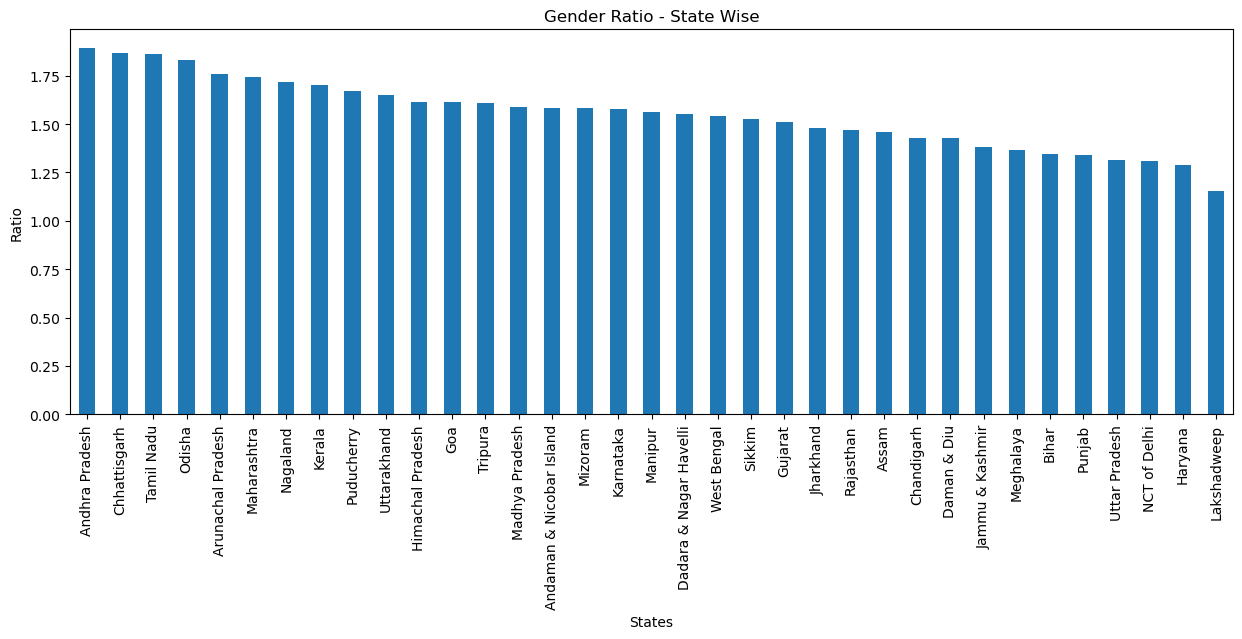

In [97]:
plt.figure(figsize=(15,5))
df_eda.groupby('State').mean()['Ratio'].sort_values(ascending=False).plot(kind= 'bar')
plt.title('Gender Ratio - State Wise')
plt.ylabel('Ratio')
plt.xlabel('States')
plt.show()

In [98]:
df_eda.groupby(['State','Area Name']).mean()['Ratio'].sort_values(ascending=False).head(5)

State           Area Name    
Andhra Pradesh  Krishna          2.283250
Odisha          Koraput          2.268763
Tamil Nadu      Virudhunagar     2.225429
Andhra Pradesh  West Godavari    2.221849
Odisha          Baudh            2.215060
Name: Ratio, dtype: float64

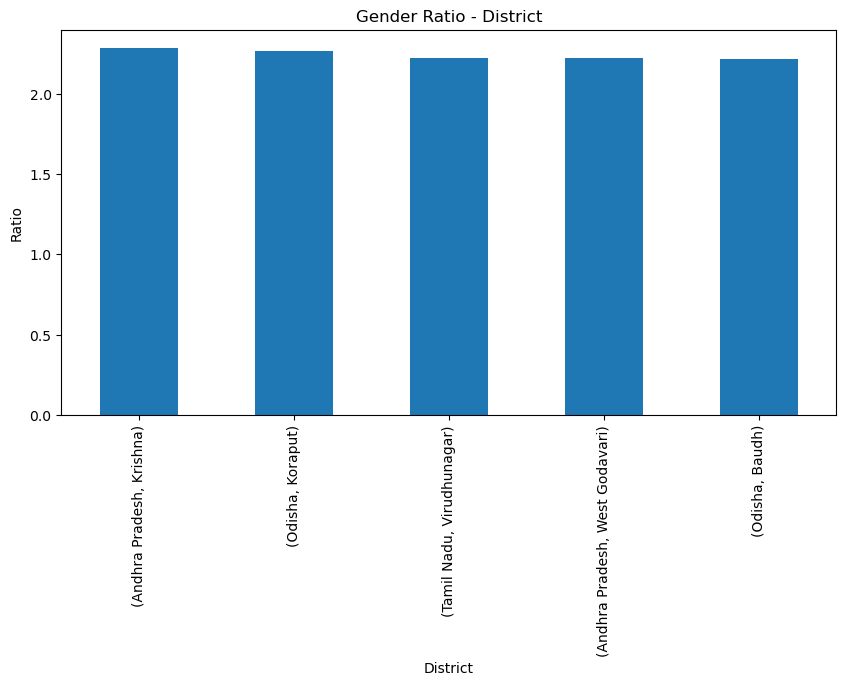

In [99]:
plt.figure(figsize=(10,5))
df_eda.groupby(['State','Area Name']).mean()['Ratio'].sort_values(ascending=False).head(5).plot(kind= 'bar')
plt.title('Gender Ratio - District')
plt.ylabel('Ratio')
plt.xlabel('District')
plt.show()


In [100]:
df_eda.groupby(['State','Area Name']).mean()['Ratio'].sort_values(ascending=False).tail(5)

State            Area Name     
Uttar Pradesh    Baghpat           1.184830
Rajasthan        Dhaulpur          1.180761
Uttar Pradesh    Mahamaya Nagar    1.180202
Jammu & Kashmir  Badgam            1.179576
Lakshadweep      Lakshadweep       1.151993
Name: Ratio, dtype: float64

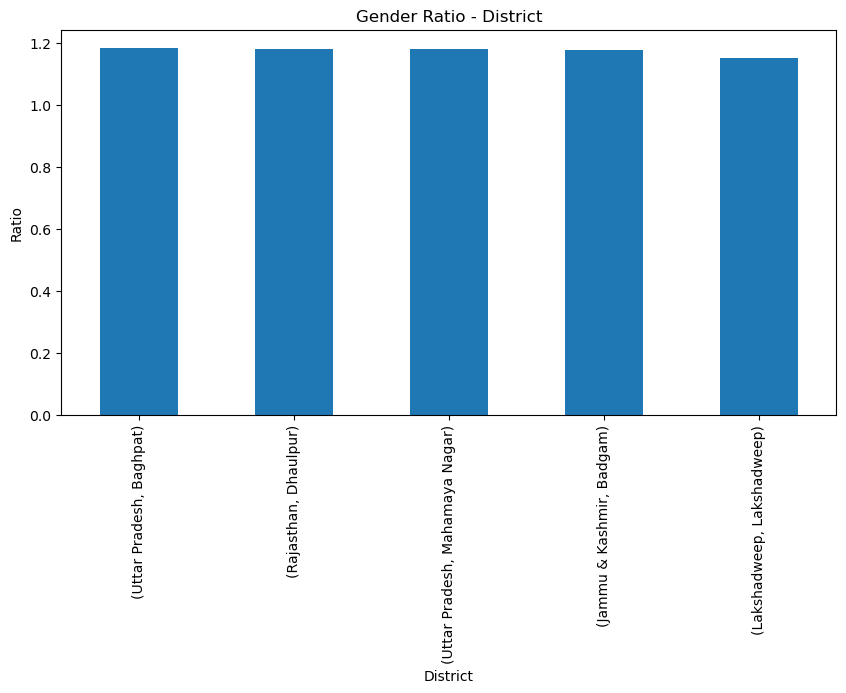

In [101]:
plt.figure(figsize=(10,5))
df_eda.groupby(['State','Area Name']).mean()['Ratio'].sort_values(ascending=False).tail(5).plot(kind= 'bar')
plt.title('Gender Ratio - District')
plt.ylabel('Ratio')
plt.xlabel('District')
plt.show()


In [102]:
df_eda.groupby('State').mean()['F_Lit_rate'].sort_values(ascending=False)

State
Kerala                      62.289746
Mizoram                     60.972289
Nagaland                    59.259198
Goa                         58.540609
Tripura                     58.438561
Puducherry                  58.049856
Maharashtra                 57.666045
Andaman & Nicobar Island    56.677327
Meghalaya                   56.553030
Chandigarh                  56.420314
Arunachal Pradesh           56.405712
Uttarakhand                 56.225616
Tamil Nadu                  55.957387
Himachal Pradesh            55.935029
Sikkim                      55.230552
Manipur                     54.769138
Odisha                      53.963391
Daman & Diu                 53.542188
Chhattisgarh                53.328443
West Bengal                 53.241942
NCT of Delhi                53.232225
Assam                       52.710446
Gujarat                     52.691377
Andhra Pradesh              52.436647
Karnataka                   52.031827
Punjab                      51.736400
Laksha

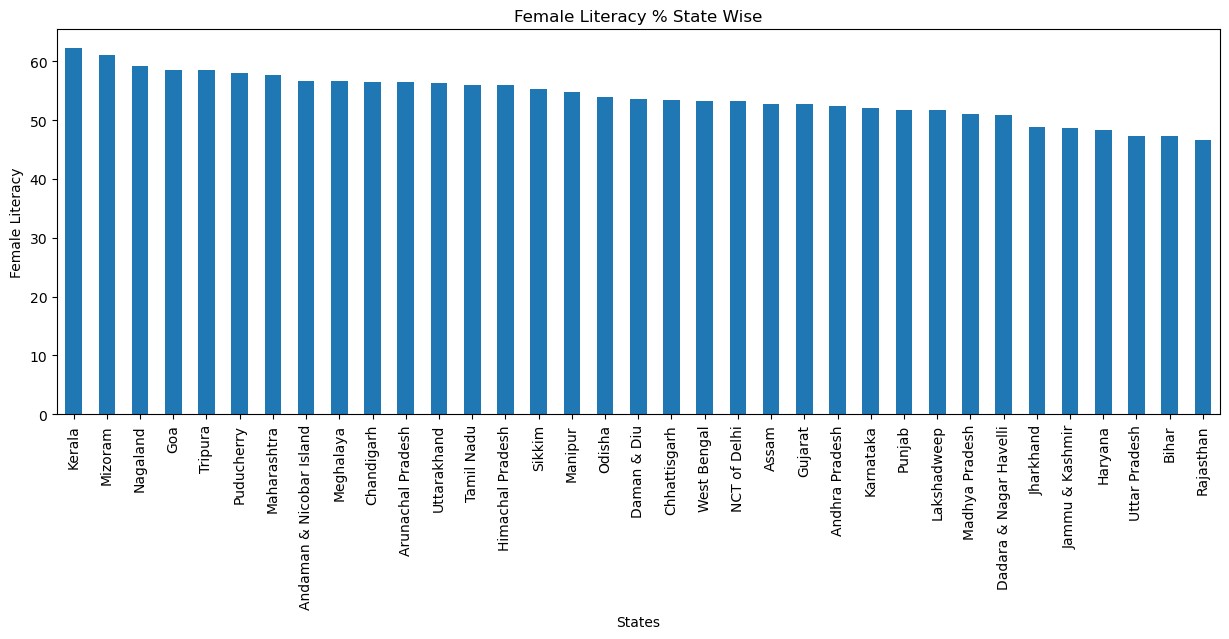

In [103]:
plt.figure(figsize=(15,5))
df_eda.groupby('State').mean()['F_Lit_rate'].sort_values(ascending=False).plot(kind= 'bar')
plt.title('Female Literacy % State Wise')
plt.ylabel('Female Literacy')
plt.xlabel('States')
plt.show()

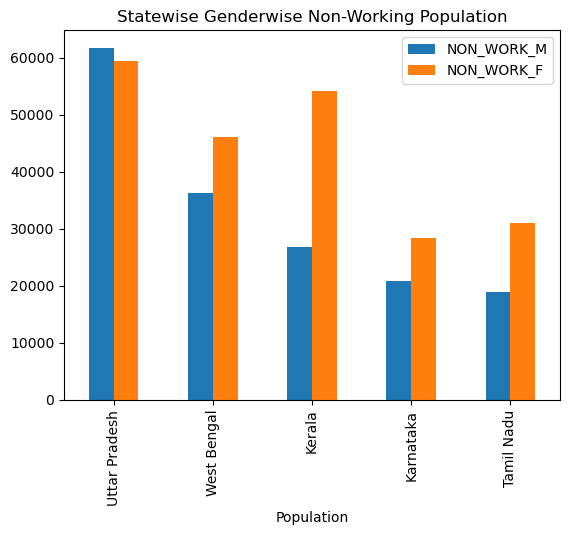

In [104]:
df_eda.groupby('State').sum()[['NON_WORK_M','NON_WORK_F']].sort_values(by=['NON_WORK_M','NON_WORK_F'],ascending=False).head(5).plot(kind='bar')
plt.title('Statewise Genderwise Non-Working Population')
plt.xlabel('Population')
plt.show()

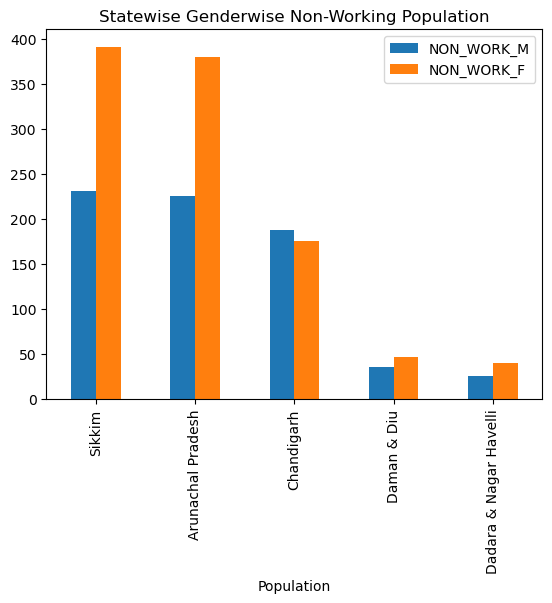

In [105]:
df_eda.groupby('State').sum()[['NON_WORK_M','NON_WORK_F']].sort_values(by=['NON_WORK_M','NON_WORK_F'],ascending=False).tail(5).plot(kind='bar')
plt.title('Statewise Genderwise Non-Working Population')
plt.xlabel('Population')
plt.show()

<Figure size 1200x700 with 0 Axes>

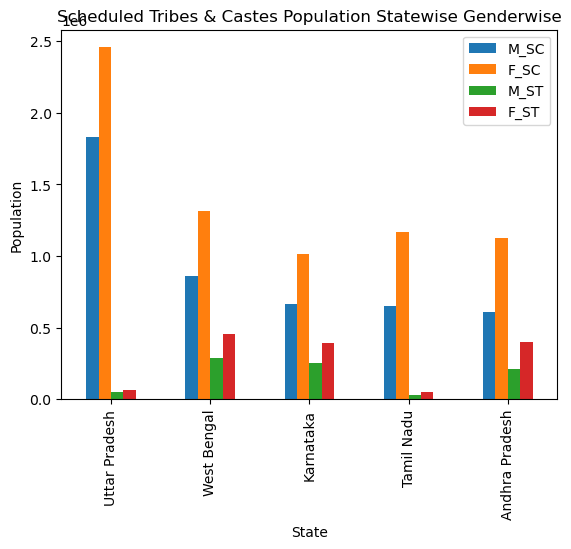

In [106]:
plt.figure(figsize=(12,7))
df_eda.groupby('State').sum()[['M_SC','F_SC','M_ST','F_ST']].sort_values(by=['M_SC','F_SC','M_ST','F_ST'],ascending=False).head(5).plot(kind='bar')
plt.title('Scheduled Tribes & Castes Population Statewise Genderwise')
plt.ylabel('Population')
plt.show()

In [107]:
len(df_pca.columns)

61

In the Dataset there are 61 columns, out of 61 columns 4 are Categorical variable and 57 Numerical Variables. Only 24 columns selected to perform EDA.

In [108]:
df_pca_eda = df_pca[['No_HH','TOT_M',
 'TOT_F',
 'M_06',
 'F_06',
 'M_SC',
 'F_SC',
 'M_ST',
 'F_ST',
 'M_LIT',
 'F_LIT',
 'M_ILL',
 'F_ILL',
 'TOT_WORK_M',
 'TOT_WORK_F',
 'MAINWORK_M',
 'MAINWORK_F',
 'MAIN_CL_M',
 'MAIN_CL_F',
 'MAIN_AL_M',
 'MAIN_AL_F',
 'MAIN_HH_M',
 'MAIN_HH_F',
 'MAIN_OT_M',
 'MAIN_OT_F',]]

In [109]:
df_pca_eda.head()

No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  F_SC  M_ST   F_ST  M_LIT  ...  \
0   7707  23388  29796  5862  6196     3     0  1999   2598  13381  ...   
1   6218  19585  23102  4482  3733     7     6   427    517  10513  ...   
2   4452   6546  10964  1082  1018     3     6  5806   9723   4534  ...   
3   1320   2784   4206   563   677     0     0  2666   3968   1842  ...   
4  11654  20591  29981  5157  4587    20    33  7670  10843  13243  ...   

   MAINWORK_M  MAINWORK_F  MAIN_CL_M  MAIN_CL_F  MAIN_AL_M  MAIN_AL_F  \
0        2763        1275        486        235        407        143   
1        4628        1733       1098        357        442        108   
2        1940        2923        519       1205         36         71   
3         491         408         35        102          8         24   
4        2523        2267        743        766        254        237   

   MAIN_HH_M  MAIN_HH_F  MAIN_OT_M  MAIN_OT_F  
0         78         86       1792        811  
1        538        343       2550        925  
2         19         55       1366       1592  
3          9          6        439        276  
4         35         64       1491       1200  

[5 rows x 25 columns]

### Data Visualisation

### Univariate Analysis

In [110]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print(df_pca[column].describe(),end=' ')
    
    plt.figure()
    print("Distribution of " + column)
    sns.distplot(df_pca_eda[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    ax = sns.boxplot(x=df_pca_eda[column])
    plt.show()

Description of No_HH
count       640.000000
mean      51222.871875
std       48135.405475
min         350.000000
25%       19484.000000
50%       35837.000000
75%       68892.000000
max      310450.000000
Name: No_HH, dtype: float64 Distribution of No_HH


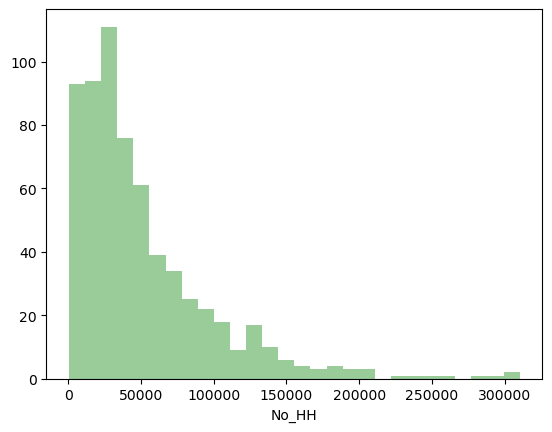

BoxPlot of No_HH


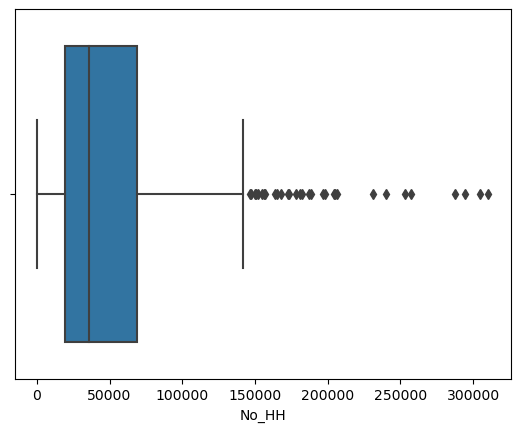

Description of TOT_M
count       640.000000
mean      79940.576563
std       73384.511114
min         391.000000
25%       30228.000000
50%       58339.000000
75%      107918.500000
max      485417.000000
Name: TOT_M, dtype: float64 Distribution of TOT_M


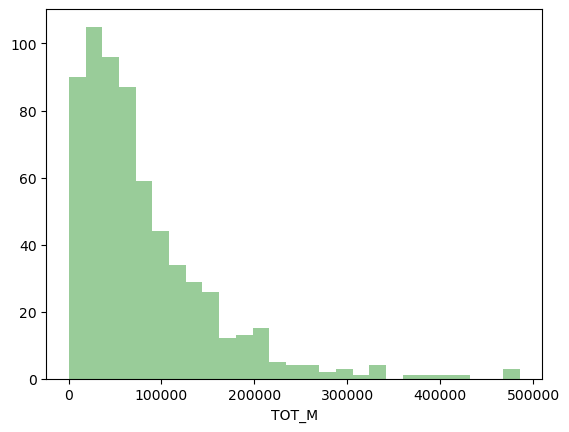

BoxPlot of TOT_M


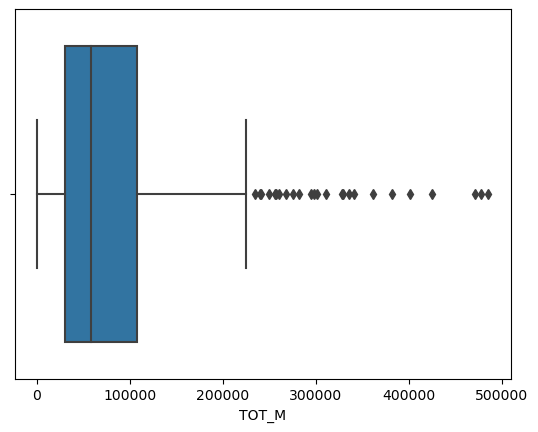

Description of TOT_F
count       640.000000
mean     122372.084375
std      113600.717282
min         698.000000
25%       46517.750000
50%       87724.500000
75%      164251.750000
max      750392.000000
Name: TOT_F, dtype: float64 Distribution of TOT_F


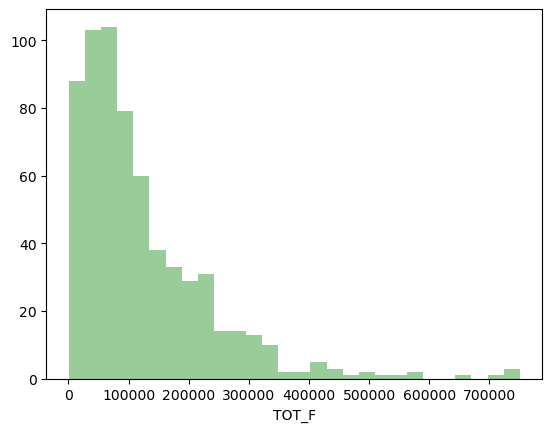

BoxPlot of TOT_F


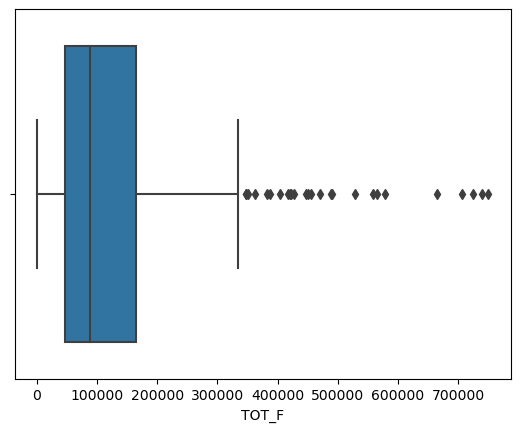

Description of M_06
count      640.000000
mean     12309.098438
std      11500.906881
min         56.000000
25%       4733.750000
50%       9159.000000
75%      16520.250000
max      96223.000000
Name: M_06, dtype: float64 Distribution of M_06


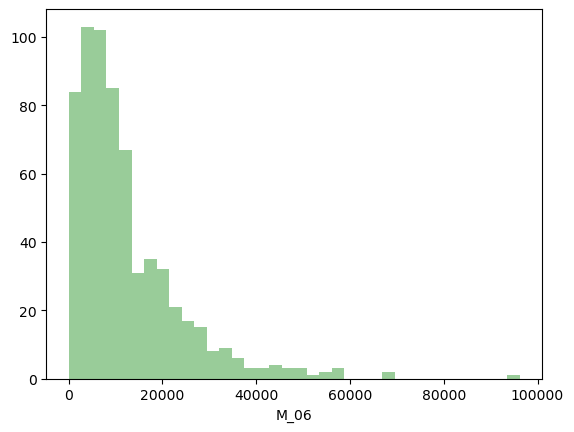

BoxPlot of M_06


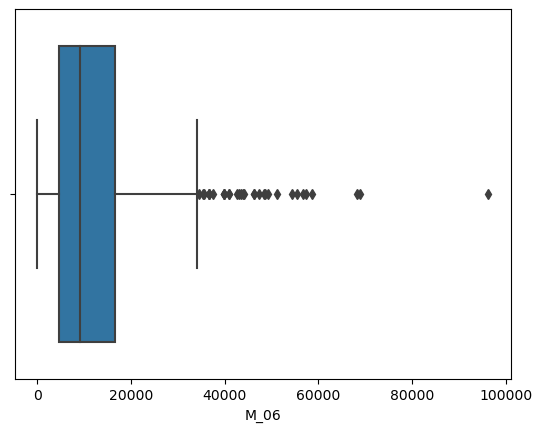

Description of F_06
count      640.000000
mean     11942.300000
std      11326.294567
min         56.000000
25%       4672.250000
50%       8663.000000
75%      15902.250000
max      95129.000000
Name: F_06, dtype: float64 Distribution of F_06


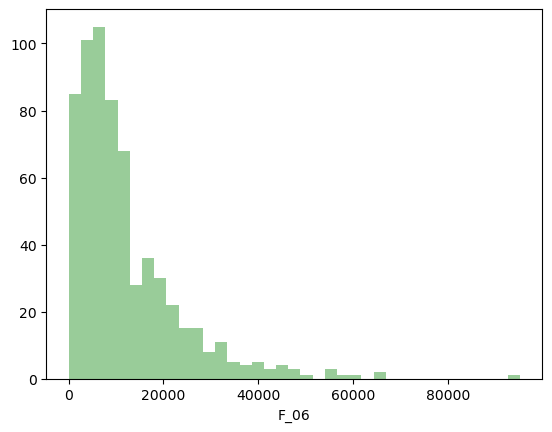

BoxPlot of F_06


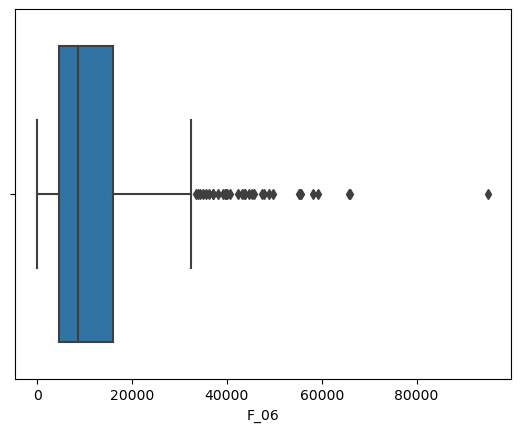

Description of M_SC
count       640.000000
mean      13820.946875
std       14426.373130
min           0.000000
25%        3466.250000
50%        9591.500000
75%       19429.750000
max      103307.000000
Name: M_SC, dtype: float64 Distribution of M_SC


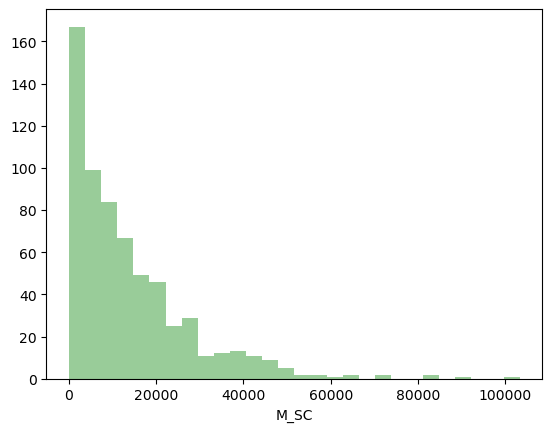

BoxPlot of M_SC


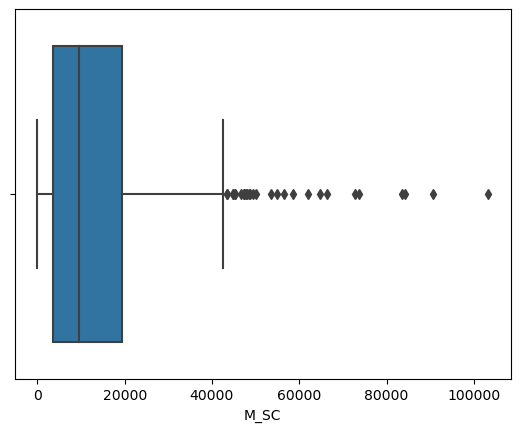

Description of F_SC
count       640.000000
mean      20778.392188
std       21727.887713
min           0.000000
25%        5603.250000
50%       13709.000000
75%       29180.000000
max      156429.000000
Name: F_SC, dtype: float64 Distribution of F_SC


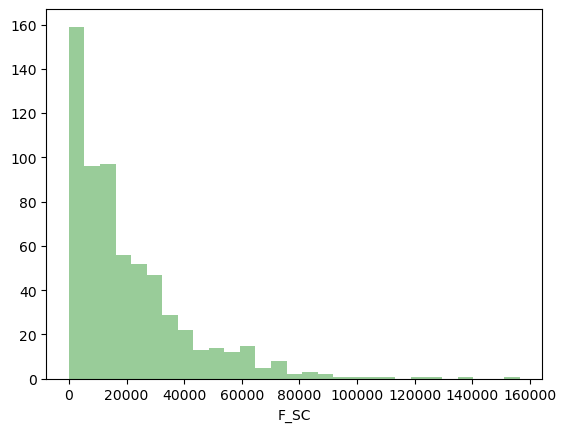

BoxPlot of F_SC


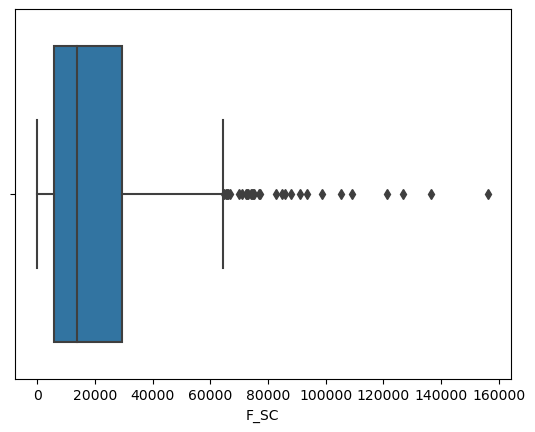

Description of M_ST
count      640.000000
mean      6191.807813
std       9912.668948
min          0.000000
25%        293.750000
50%       2333.500000
75%       7658.000000
max      96785.000000
Name: M_ST, dtype: float64 Distribution of M_ST


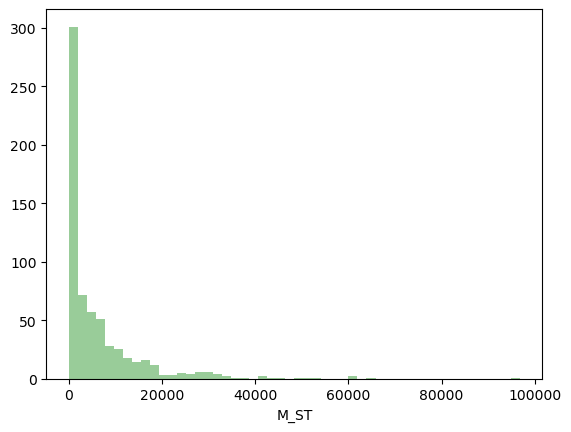

BoxPlot of M_ST


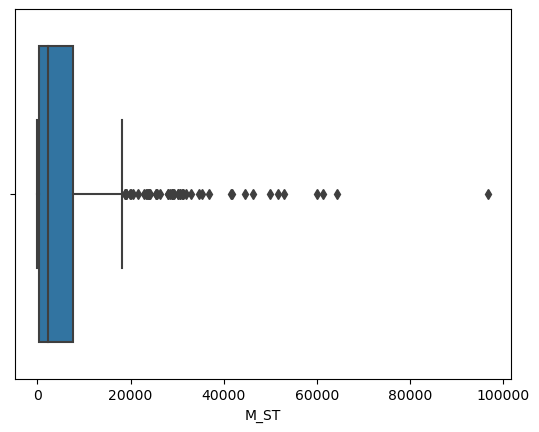

Description of F_ST
count       640.000000
mean      10155.640625
std       15875.701488
min           0.000000
25%         429.500000
50%        3834.500000
75%       12480.250000
max      130119.000000
Name: F_ST, dtype: float64 Distribution of F_ST


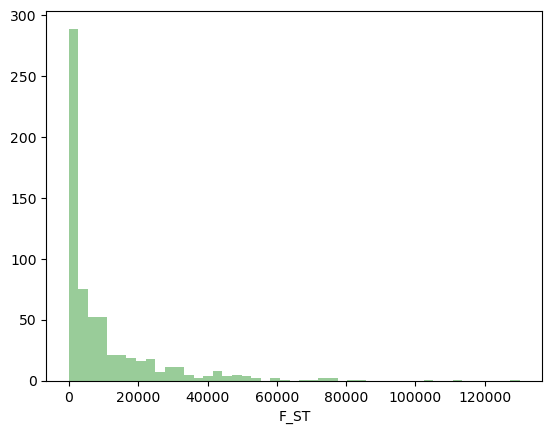

BoxPlot of F_ST


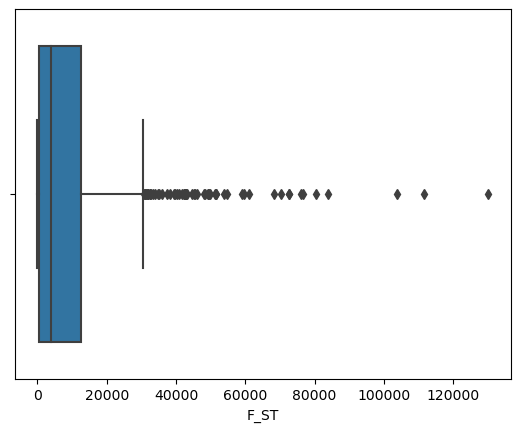

Description of M_LIT
count       640.000000
mean      57967.979688
std       55910.282466
min         286.000000
25%       21298.000000
50%       42693.500000
75%       77989.500000
max      403261.000000
Name: M_LIT, dtype: float64 Distribution of M_LIT


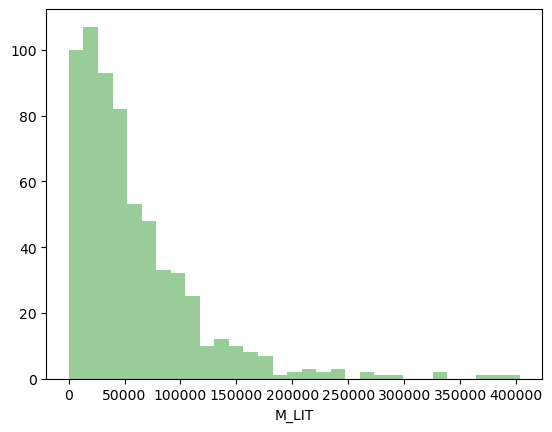

BoxPlot of M_LIT


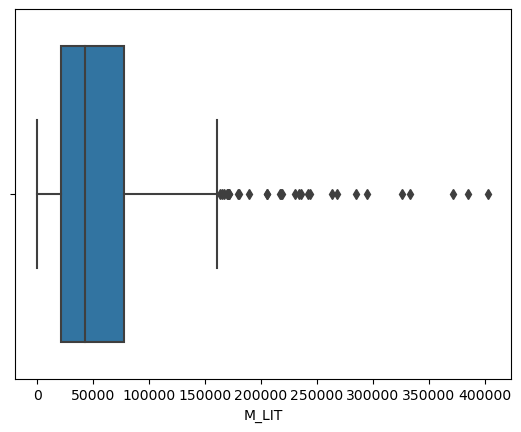

Description of F_LIT
count       640.000000
mean      66359.565625
std       75037.860207
min         371.000000
25%       20932.000000
50%       43796.500000
75%       84799.750000
max      571140.000000
Name: F_LIT, dtype: float64 Distribution of F_LIT


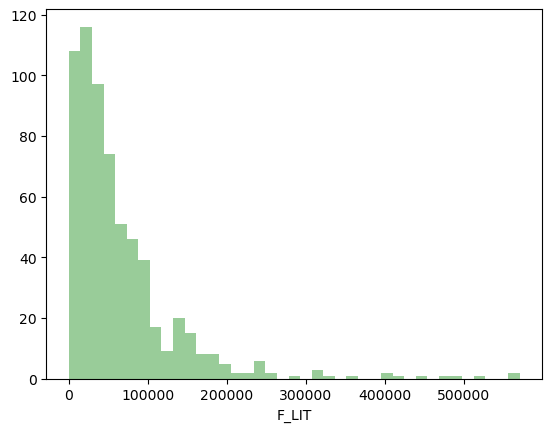

BoxPlot of F_LIT


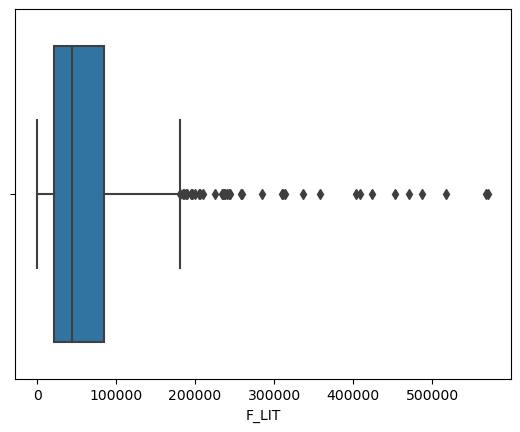

Description of M_ILL
count       640.000000
mean      21972.596875
std       19825.605268
min         105.000000
25%        8590.000000
50%       15767.500000
75%       29512.500000
max      105961.000000
Name: M_ILL, dtype: float64 Distribution of M_ILL


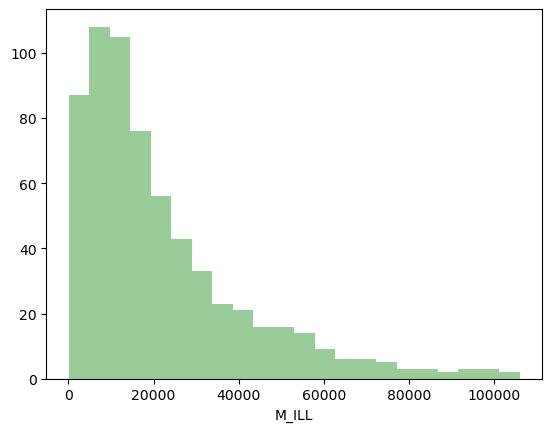

BoxPlot of M_ILL


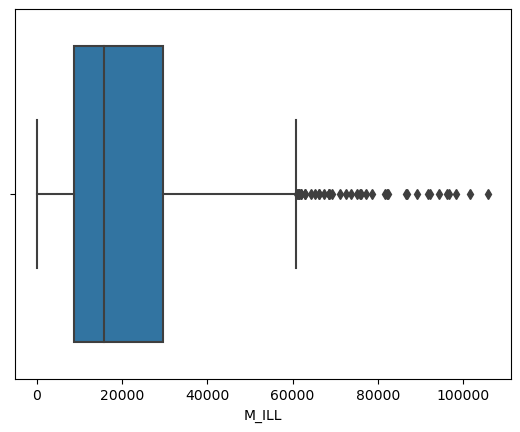

Description of F_ILL
count       640.000000
mean      56012.518750
std       47116.693769
min         327.000000
25%       22367.000000
50%       42386.000000
75%       78471.000000
max      254160.000000
Name: F_ILL, dtype: float64 Distribution of F_ILL


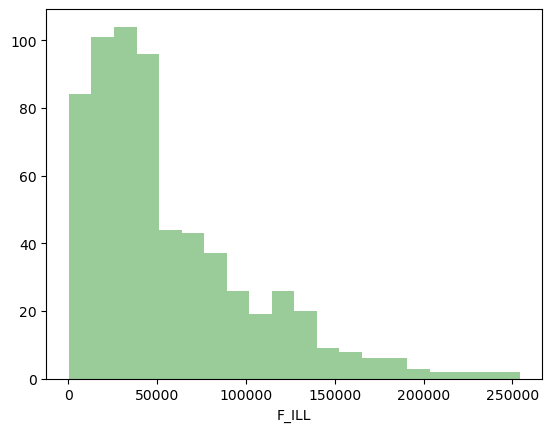

BoxPlot of F_ILL


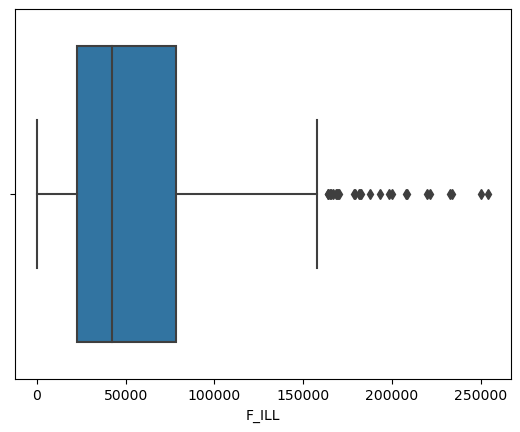

Description of TOT_WORK_M
count       640.000000
mean      37992.407813
std       36419.537491
min         100.000000
25%       13753.500000
50%       27936.500000
75%       50226.750000
max      269422.000000
Name: TOT_WORK_M, dtype: float64 Distribution of TOT_WORK_M


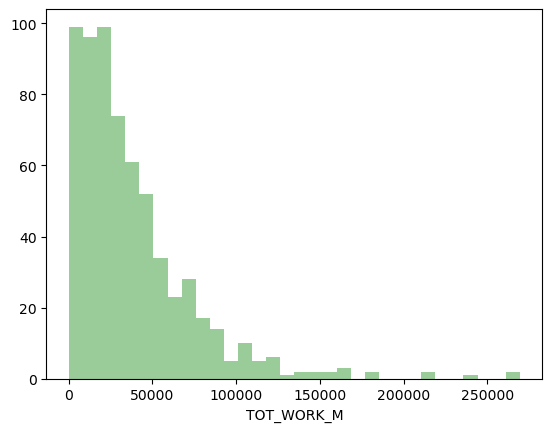

BoxPlot of TOT_WORK_M


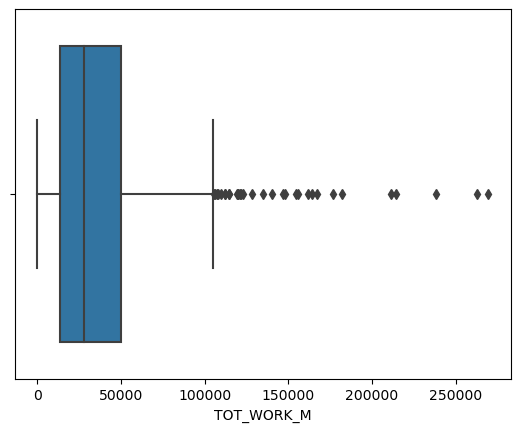

Description of TOT_WORK_F
count       640.000000
mean      41295.760938
std       37192.360943
min         357.000000
25%       16097.750000
50%       30588.500000
75%       53234.250000
max      257848.000000
Name: TOT_WORK_F, dtype: float64 Distribution of TOT_WORK_F


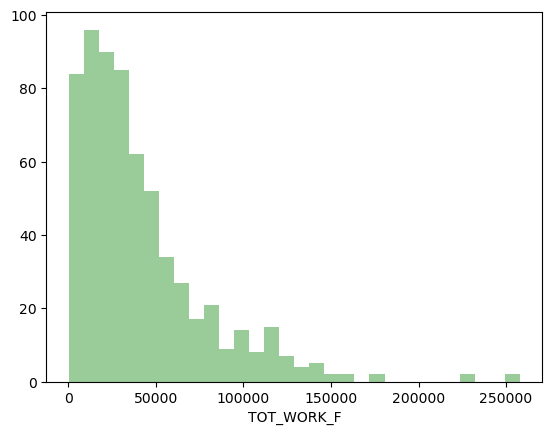

BoxPlot of TOT_WORK_F


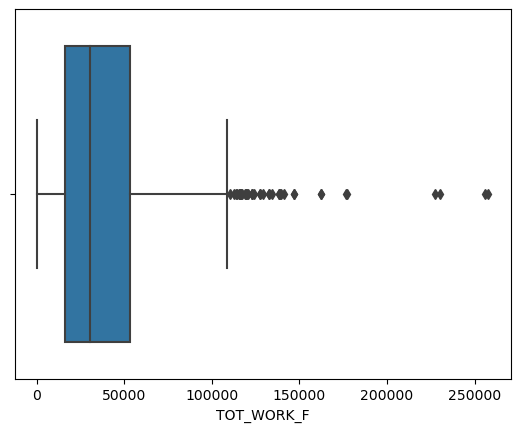

Description of MAINWORK_M
count       640.000000
mean      30204.446875
std       31480.915680
min          65.000000
25%        9787.000000
50%       21250.500000
75%       40119.000000
max      247911.000000
Name: MAINWORK_M, dtype: float64 Distribution of MAINWORK_M


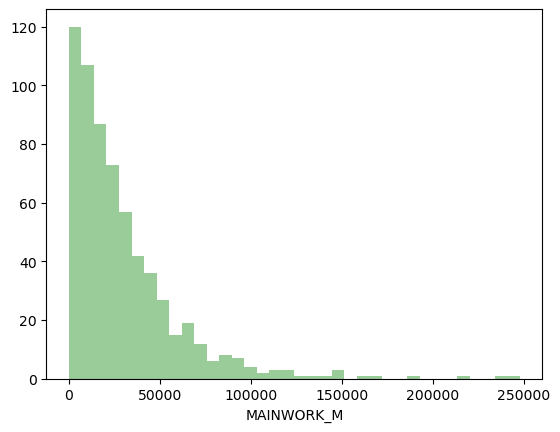

BoxPlot of MAINWORK_M


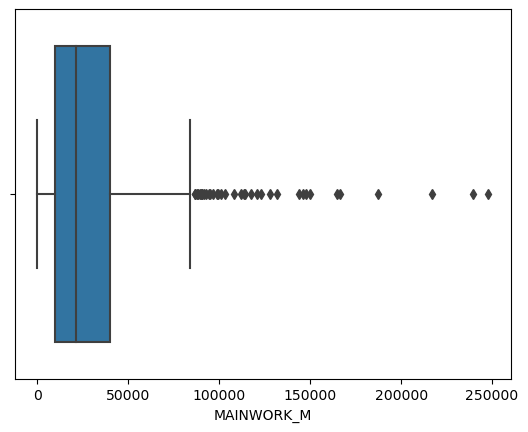

Description of MAINWORK_F
count       640.000000
mean      28198.846875
std       29998.262689
min         240.000000
25%        9502.250000
50%       18484.000000
75%       35063.250000
max      226166.000000
Name: MAINWORK_F, dtype: float64 Distribution of MAINWORK_F


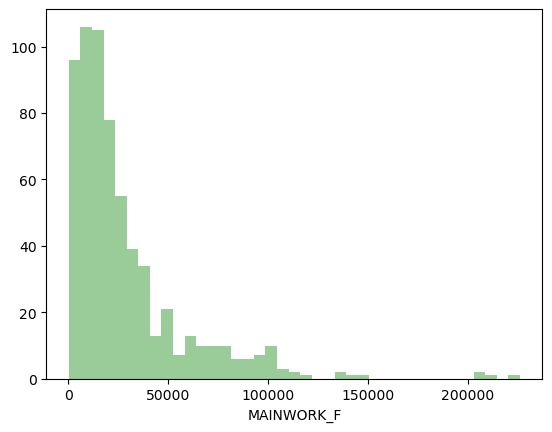

BoxPlot of MAINWORK_F


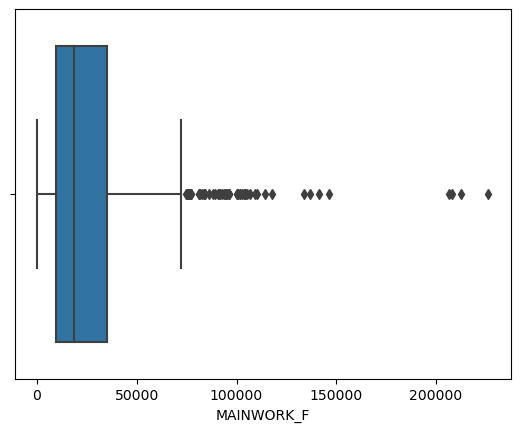

Description of MAIN_CL_M
count      640.000000
mean      5424.342188
std       4739.161969
min          0.000000
25%       2023.500000
50%       4160.500000
75%       7695.000000
max      29113.000000
Name: MAIN_CL_M, dtype: float64 Distribution of MAIN_CL_M


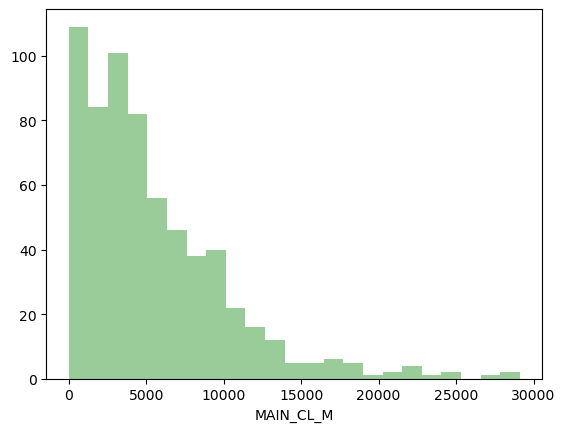

BoxPlot of MAIN_CL_M


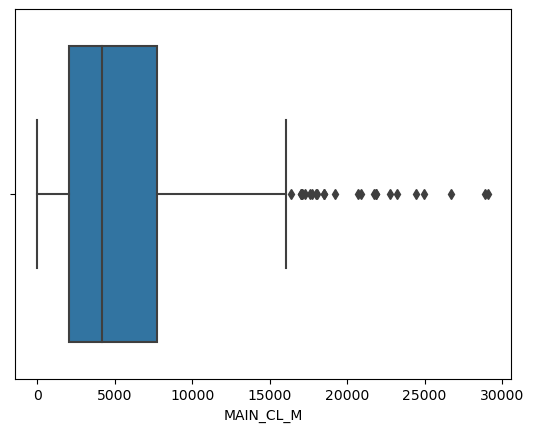

Description of MAIN_CL_F
count      640.000000
mean      5486.042188
std       5326.362728
min          0.000000
25%       1920.250000
50%       3908.500000
75%       7286.250000
max      36193.000000
Name: MAIN_CL_F, dtype: float64 Distribution of MAIN_CL_F


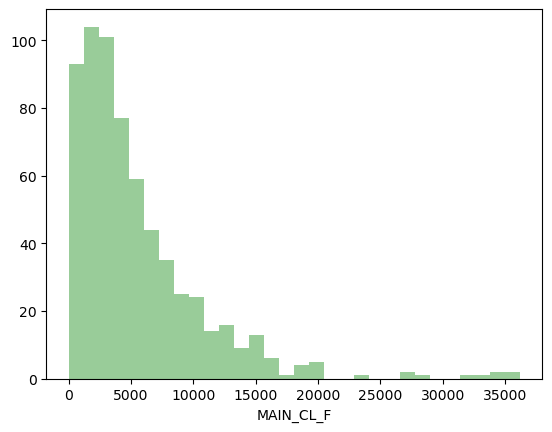

BoxPlot of MAIN_CL_F


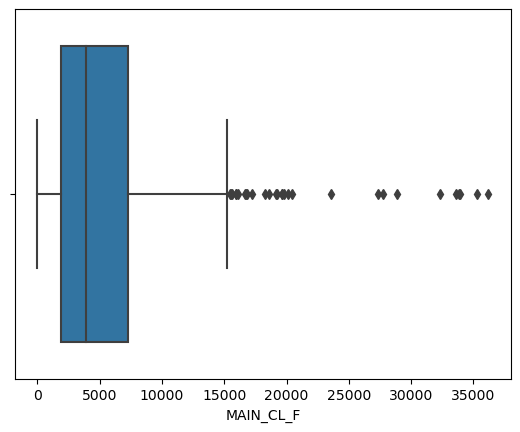

Description of MAIN_AL_M
count      640.000000
mean      5849.109375
std       6399.507966
min          0.000000
25%       1070.250000
50%       3936.500000
75%       8067.250000
max      40843.000000
Name: MAIN_AL_M, dtype: float64 Distribution of MAIN_AL_M


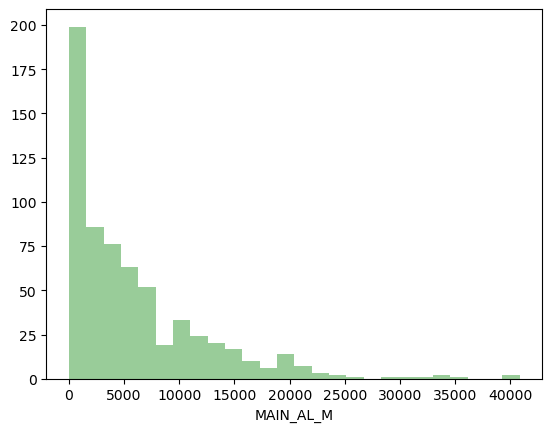

BoxPlot of MAIN_AL_M


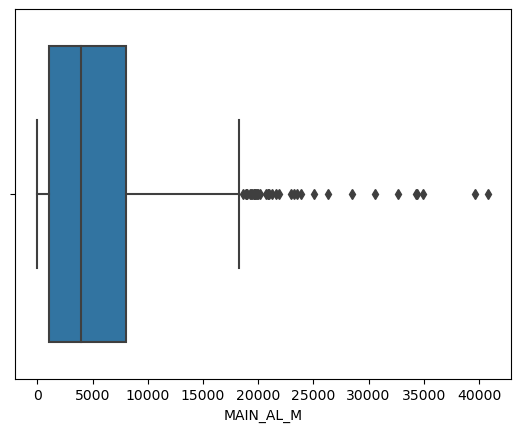

Description of MAIN_AL_F
count      640.000000
mean      8925.995312
std      12864.287584
min          0.000000
25%       1408.750000
50%       3933.500000
75%      10617.500000
max      87945.000000
Name: MAIN_AL_F, dtype: float64 Distribution of MAIN_AL_F


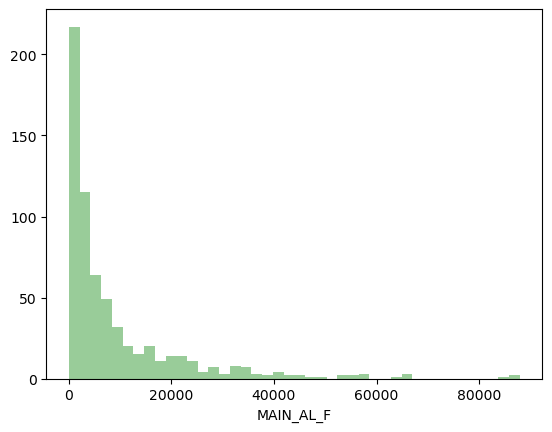

BoxPlot of MAIN_AL_F


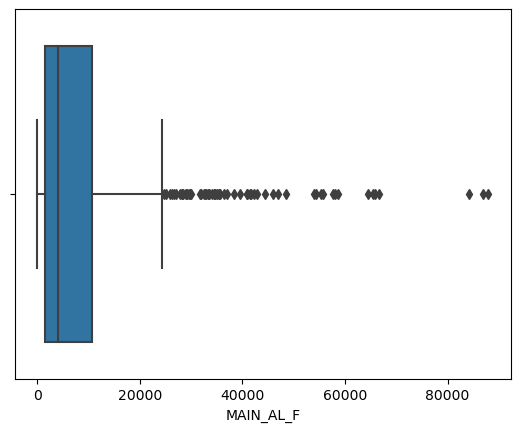

Description of MAIN_HH_M
count      640.000000
mean       883.893750
std       1278.642345
min          0.000000
25%        187.500000
50%        498.500000
75%       1099.250000
max      16429.000000
Name: MAIN_HH_M, dtype: float64 Distribution of MAIN_HH_M


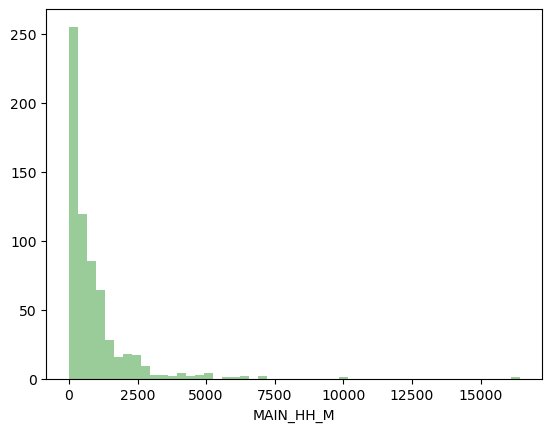

BoxPlot of MAIN_HH_M


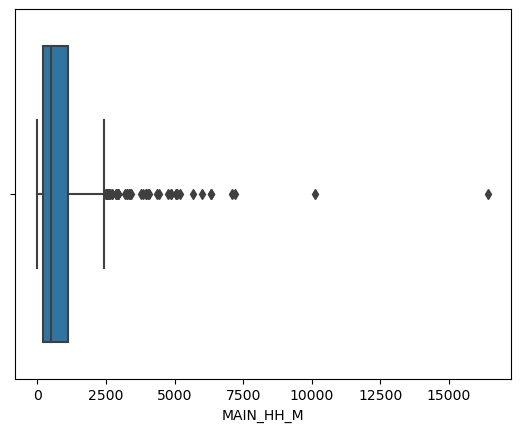

Description of MAIN_HH_F
count      640.000000
mean      1380.773438
std       3179.414449
min          0.000000
25%        248.750000
50%        540.500000
75%       1435.750000
max      45979.000000
Name: MAIN_HH_F, dtype: float64 Distribution of MAIN_HH_F


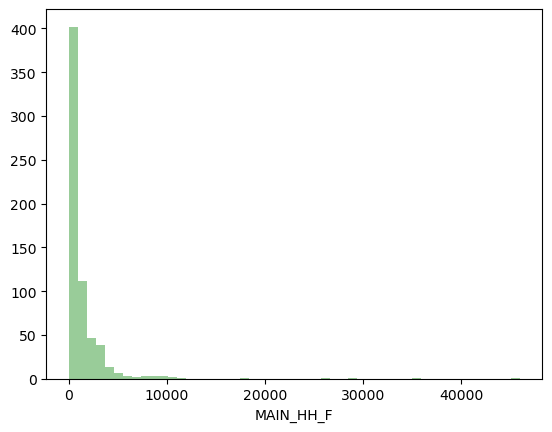

BoxPlot of MAIN_HH_F


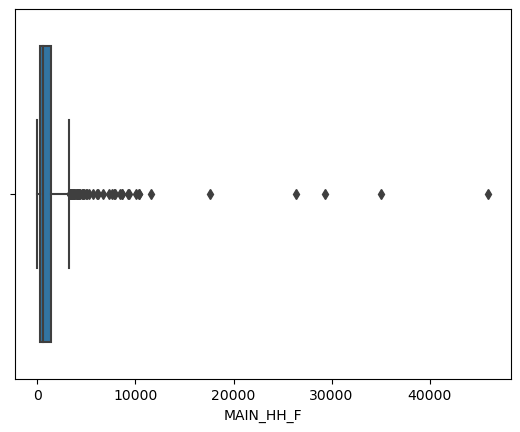

Description of MAIN_OT_M
count       640.000000
mean      18047.101562
std       26068.480886
min          36.000000
25%        3997.500000
50%        9598.000000
75%       21249.500000
max      240855.000000
Name: MAIN_OT_M, dtype: float64 Distribution of MAIN_OT_M


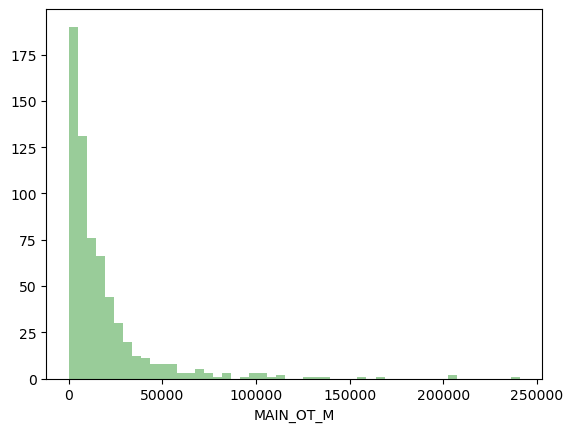

BoxPlot of MAIN_OT_M


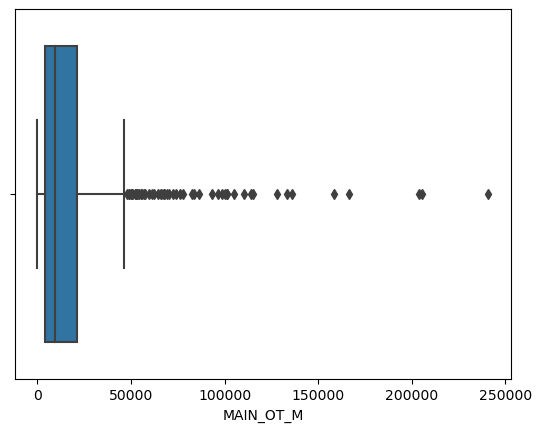

Description of MAIN_OT_F
count       640.000000
mean      12406.035938
std       18972.202369
min         153.000000
25%        3142.500000
50%        6380.500000
75%       14368.250000
max      209355.000000
Name: MAIN_OT_F, dtype: float64 Distribution of MAIN_OT_F


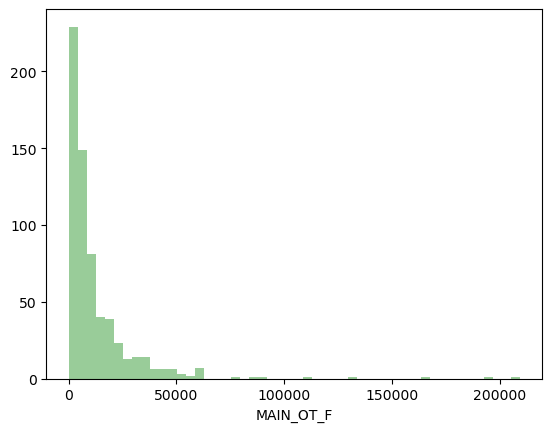

BoxPlot of MAIN_OT_F


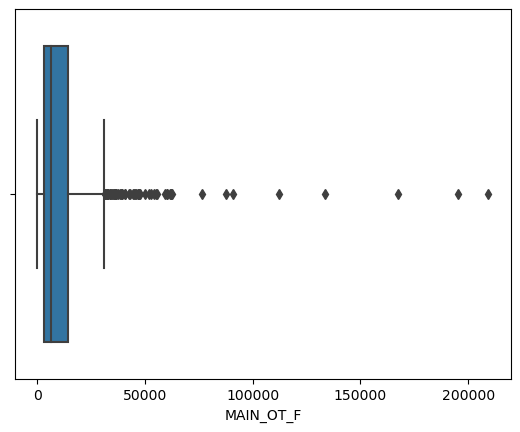

In [111]:
for x in df_pca_eda:
    univariateAnalysis_numeric(x,20)

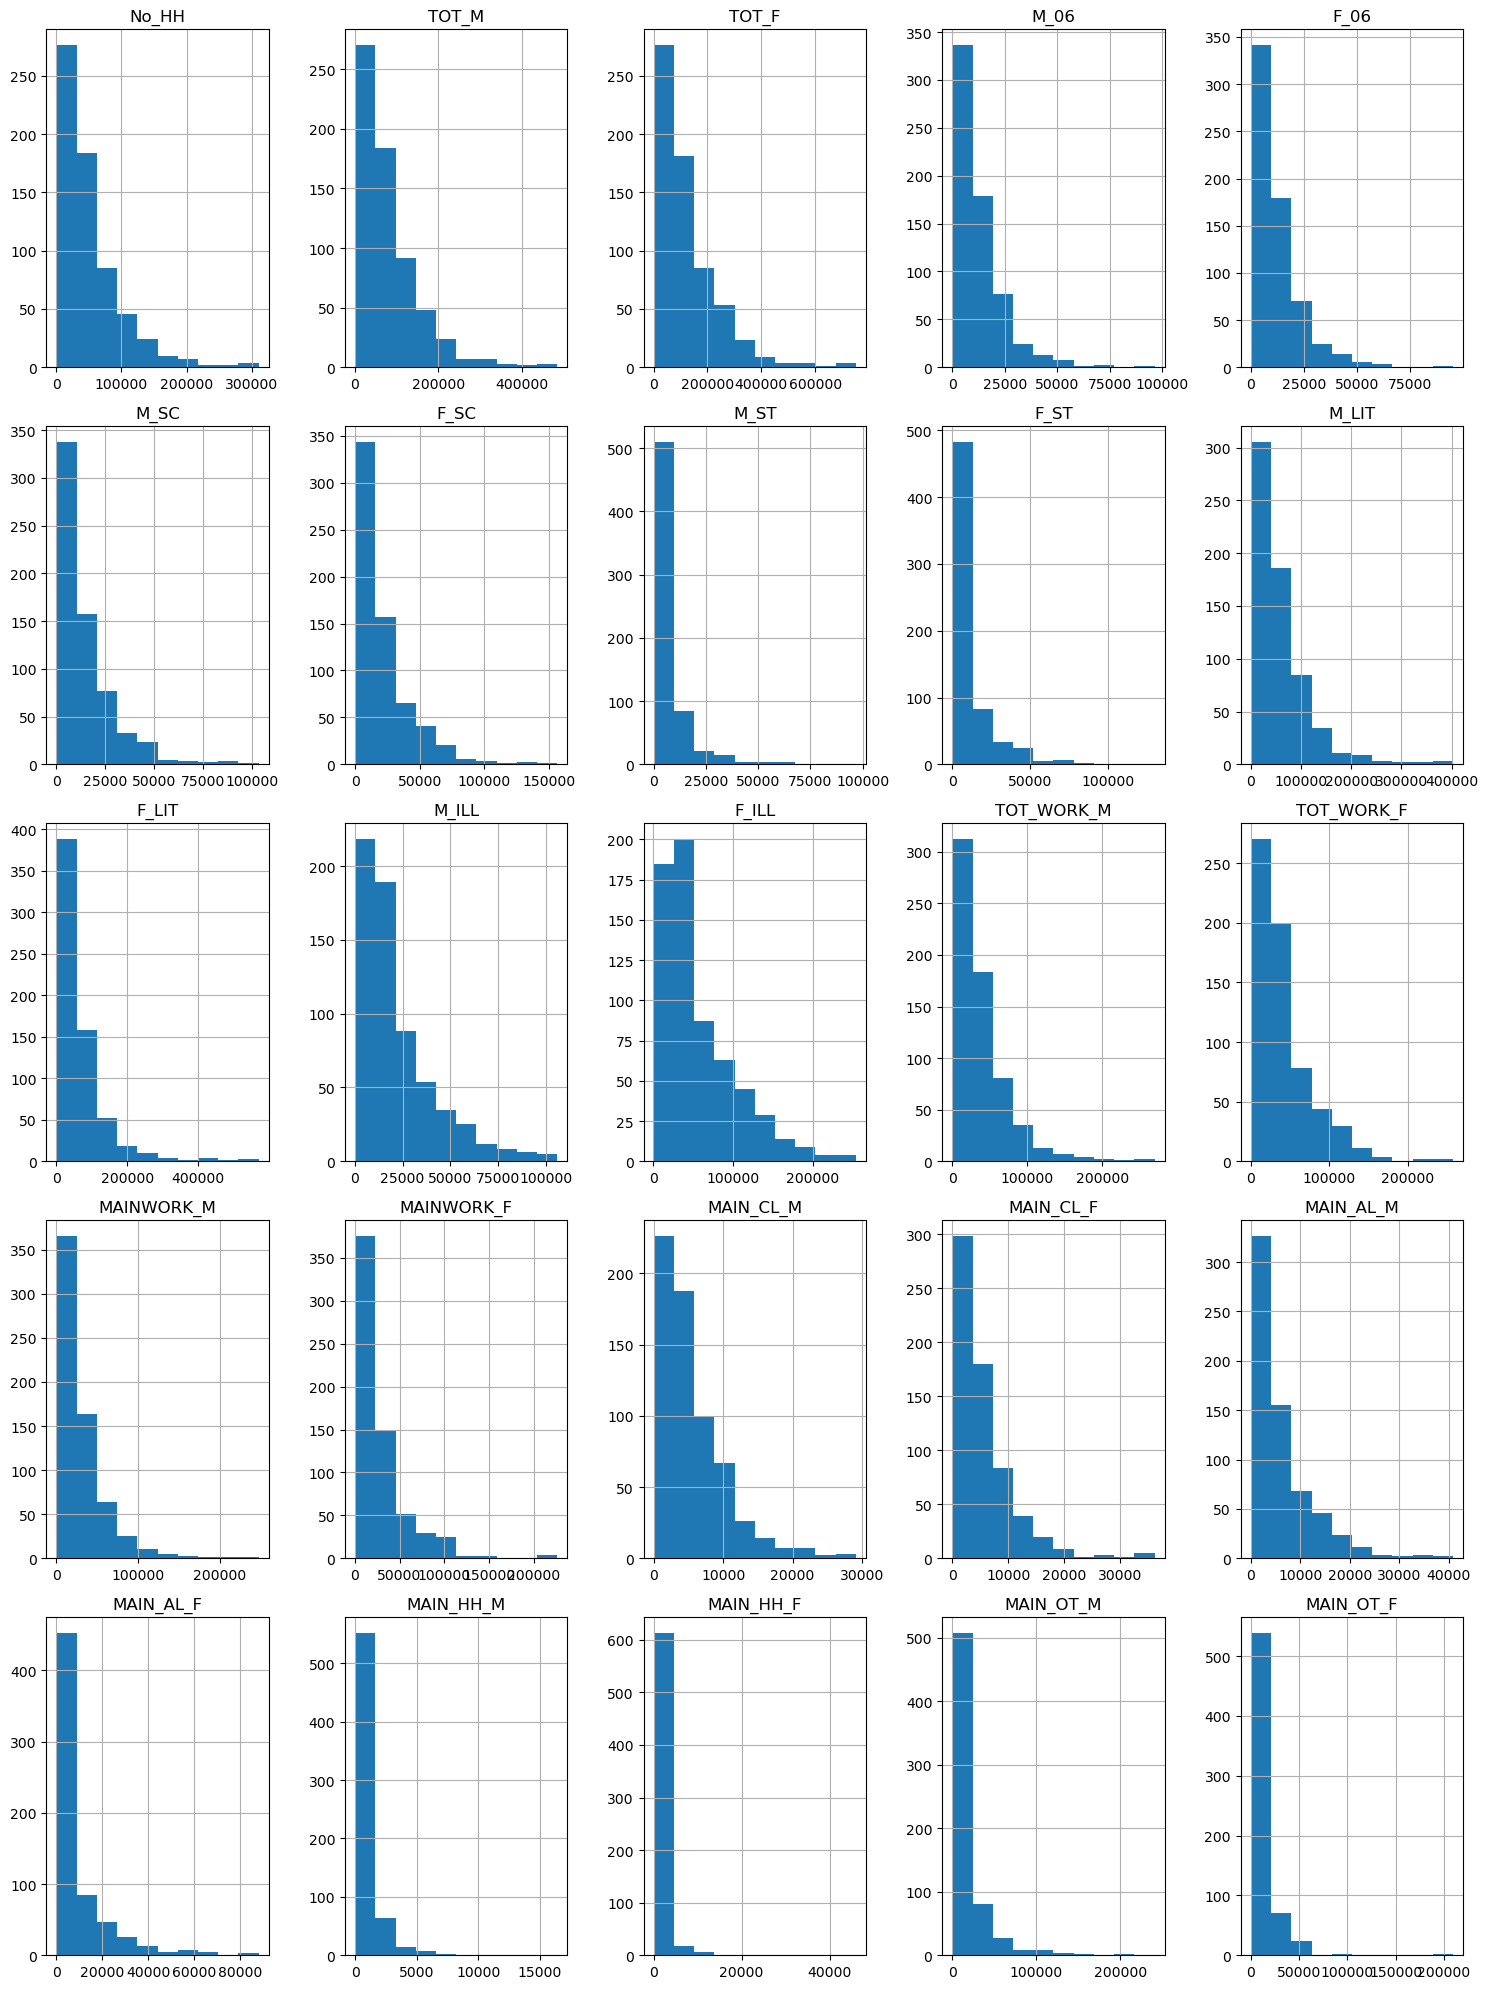

In [112]:
fig=plt.figure(figsize=(15,20))
ax=fig.gca()
df_pca_eda.hist(ax=ax)
plt.tight_layout()
plt.show;

###  Multivariate Analysis

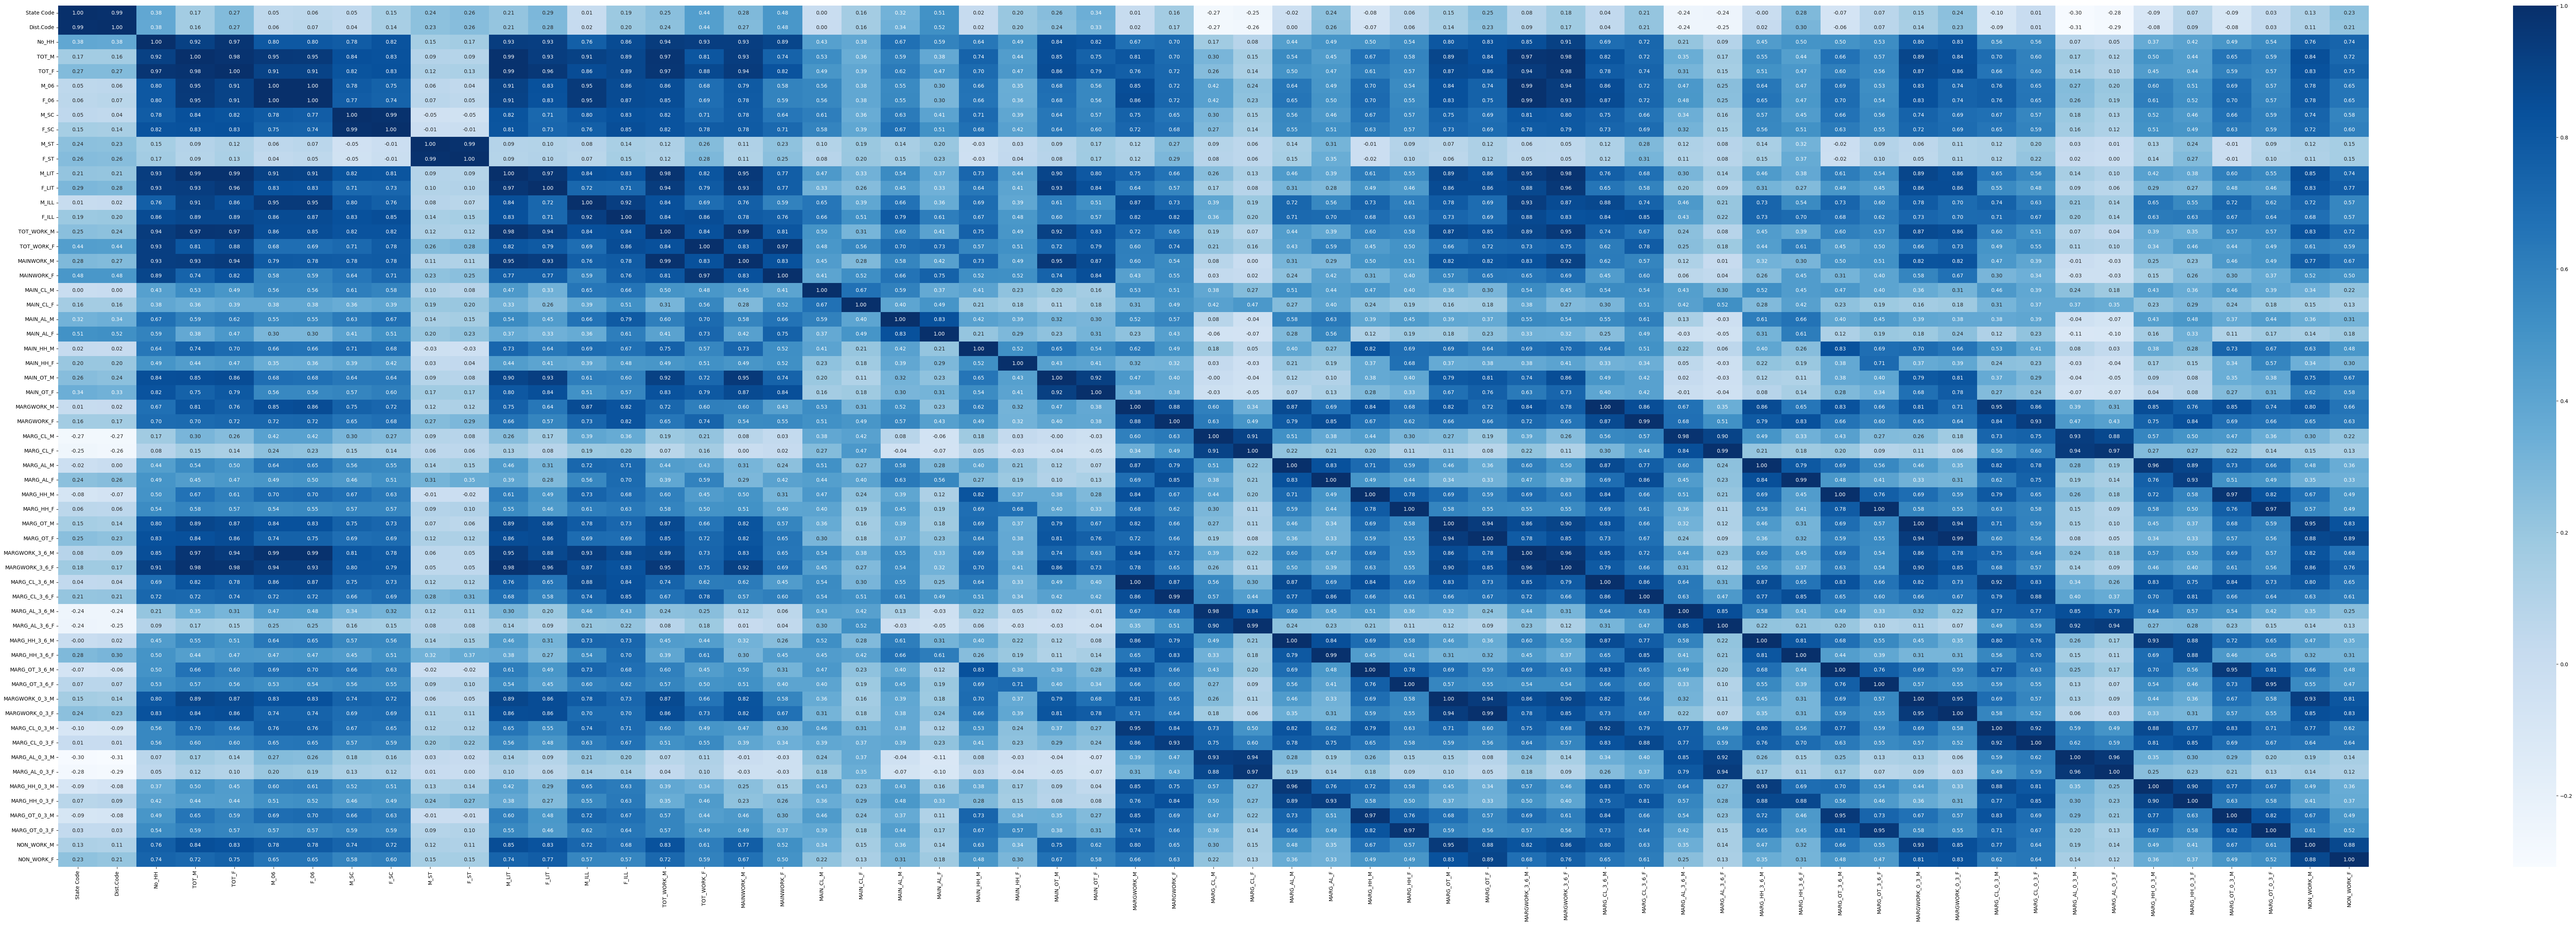

In [113]:
plt.figure(figsize=(100,30))
sns.heatmap(df_pca.corr(),annot=True, fmt='.2f', cmap='Blues')
plt.show()

## Observations

###                State has highest & lowest gender ratio
* Andhra Pradesh state has the highest Female to Male Ratio(1.89), while the Union Teritory Lakshadweep has the lowest gender ratio of 1.15. Among the States, Haryana have the lowest gender ratio of 1.28(Female to Male).


### District has highest & lowest gender ratio
* Krishna District of Andhra Pradesh has the highest Female to Male Ratio of 2.28, Badgam District of Jammu & Kashmir has the lowest Female to Male Ratio of 1.17


### Literacy 
* Kerala is at the top while Rajasthan & Bihar at the bottom.
* Non-Working Population - Uttar Pradesh has the most 'non-working' population. Kerala has most 'non-working' female population. Daman & Diu and Dadra Nagar Haveli have the lowest number of 'non-working' population for both Female & Male


### Statewise SC/ST population by gender
* Uttar Pradesh has the highest number of SC/ST population.  It is also observed that SC population is significantly higher than ST population. 
* There are more SC Females than Males

* All the Variable are right skew and outliers present
* Outliers are to be treated 

In [114]:
df_pca = df_pca.drop(['State Code','Dist.Code','State','Area Name'], axis=1)

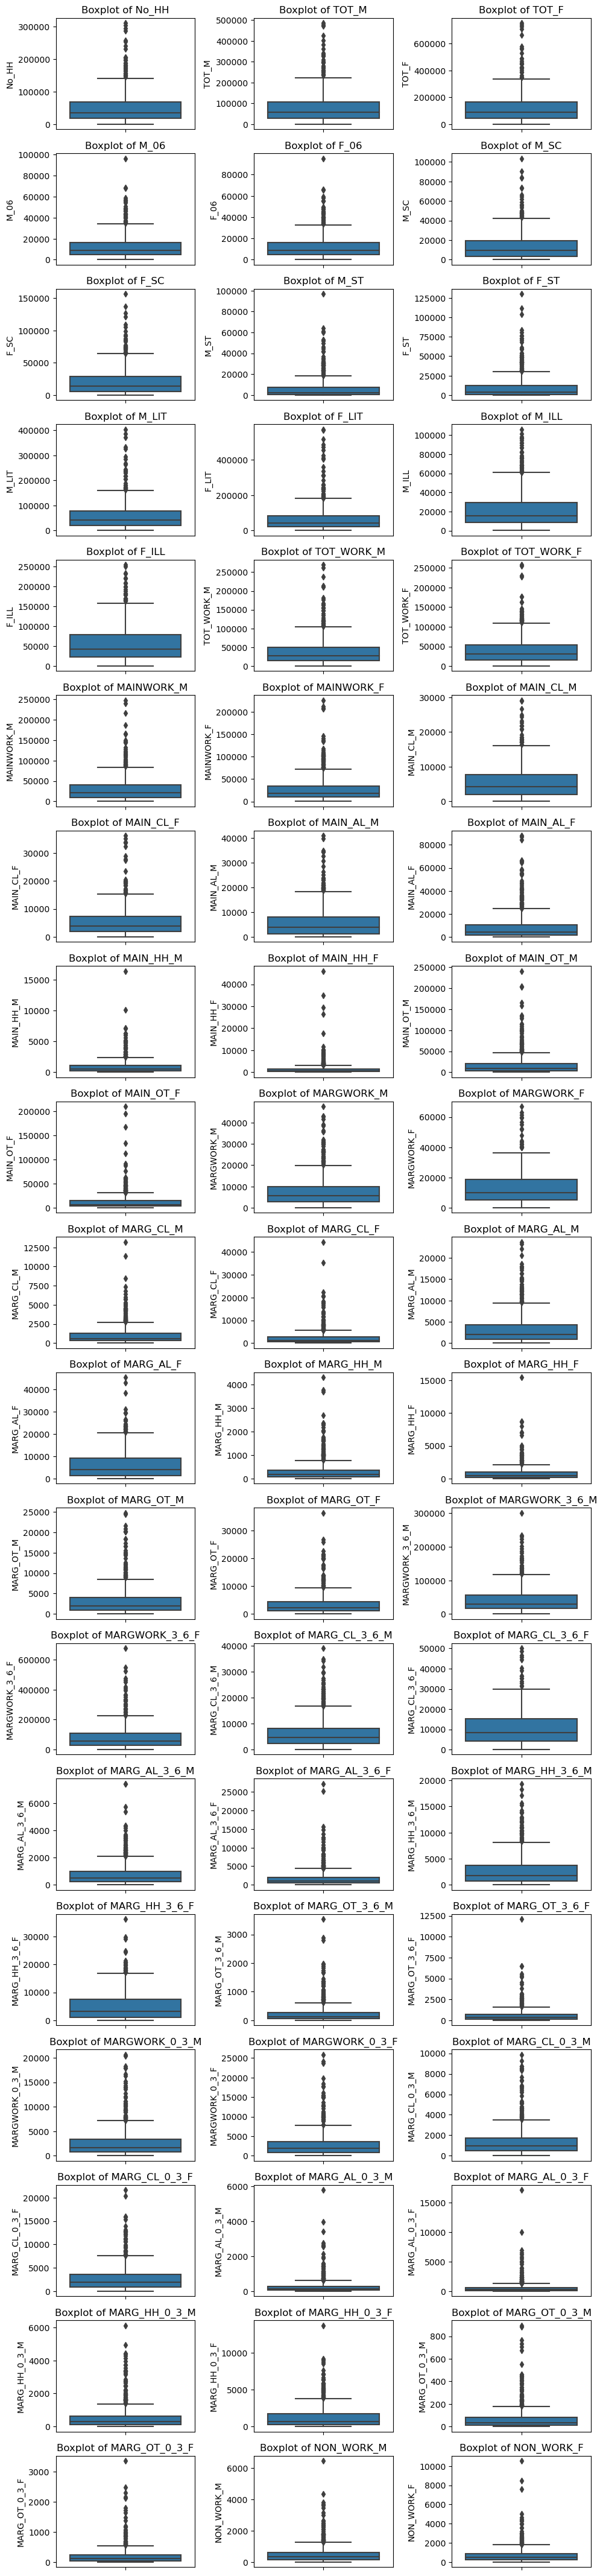

In [115]:
#Check for presence of outliers in each feature
plt.figure(figsize = (10,45))
feature_list = df_pca.columns
for i in range(len(feature_list)):
    plt.subplot(20, 3, i + 1)
    sns.boxplot(y = df_pca[feature_list[i]], data = df_pca)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [116]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   

In [117]:
#Cap & floor the values beyond the outlier boundaries
for i in feature_list:
    LL, UL = remove_outlier(df_pca[i])
    df_pca[i] = np.where(df_pca[i] > UL, UL, df_pca[i])
    df_pca[i] = np.where(df_pca[i] < LL, LL, df_pca[i])

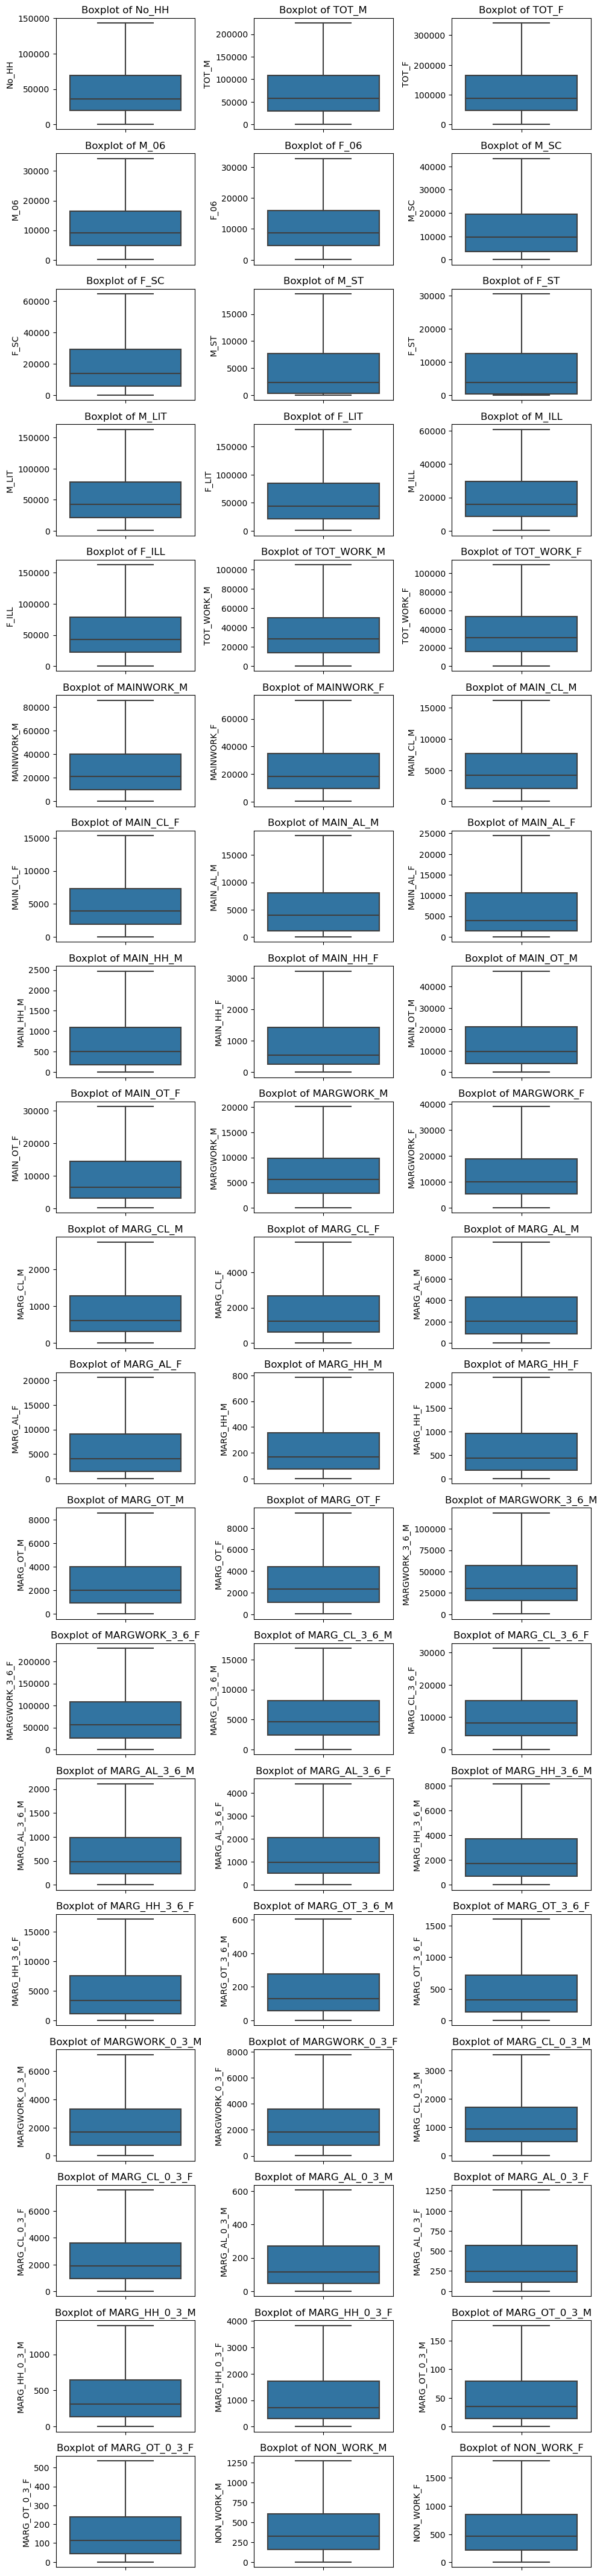

In [118]:
#Check to verify if outliers have been treated
plt.figure(figsize = (10,45))
feature_list = df_pca.columns
for i in range(len(feature_list)):
    plt.subplot(20, 3, i + 1)
    sns.boxplot(y = df_pca[feature_list[i]], data = df_pca)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

### Observations

Outliers are cleaned from all the variables, we will again check the data after scaling

In [119]:
#Check the descriptive stats to observe scale issues between the variables
df_pca.describe().round(2).T

count       mean       std    min       25%      50%  \
No_HH           640.0   48515.54  39308.01  350.0  19484.00  35837.0   
TOT_M           640.0   76041.60  60233.86  391.0  30228.00  58339.0   
TOT_F           640.0  116079.81  92154.54  698.0  46517.75  87724.5   
M_06            640.0   11638.10   9253.65   56.0   4733.75   9159.0   
F_06            640.0   11234.51   8983.80   56.0   4672.25   8663.0   
M_SC            640.0   13173.20  12201.89    0.0   3466.25   9591.5   
F_SC            640.0   19764.37  18315.28    0.0   5603.25  13709.0   
M_ST            640.0    5068.76   6018.65    0.0    293.75   2333.5   
F_ST            640.0    8345.65  10017.71    0.0    429.50   3834.5   
M_LIT           640.0   54544.87  43843.47  286.0  21298.00  42693.5   
F_LIT           640.0   59660.23  50040.15  371.0  20932.00  43796.5   
M_ILL           640.0   21015.86  17092.28  105.0   8590.00  15767.5   
F_ILL           640.0   54785.75  43465.55  327.0  22367.00  42386.0   
TOT_WORK_M      640.0   35782.70  28725.11  100.0  13753.50  27936.5   
TOT_WORK_F      640.0   39233.22  30721.56  357.0  16097.75  30588.5   
MAINWORK_M      640.0   28045.72  23727.72   65.0   9787.00  21250.5   
MAINWORK_F      640.0   25546.62  21604.04  240.0   9502.25  18484.0   
MAIN_CL_M       640.0    5249.96   4164.05    0.0   2023.50   4160.5   
MAIN_CL_F       640.0    5165.98   4181.22    0.0   1920.25   3908.5   
MAIN_AL_M       640.0    5548.18   5425.10    0.0   1070.25   3936.5   
MAIN_AL_F       640.0    7328.18   8000.28    0.0   1408.75   3933.5   
MAIN_HH_M       640.0     751.51    735.00    0.0    187.50    498.5   
MAIN_HH_F       640.0     989.25   1009.14    0.0    248.75    540.5   
MAIN_OT_M       640.0   14800.16  14092.65   36.0   3997.50   9598.0   
MAIN_OT_F       640.0   10146.22   9443.40  153.0   3142.50   6380.5   
MARGWORK_M      640.0    7220.78   5724.94   35.0   2937.50   5627.0   
MARGWORK_F      640.0   12776.22   9911.97  117.0   5424.50  10175.0   
MARG_CL_M       640.0     901.50    814.11    0.0    311.75    606.5   
MARG_CL_F       640.0    1868.83   1698.35    0.0    630.25   1226.0   
MARG_AL_M       640.0    2977.75   2791.60    0.0    873.50   2062.0   
MARG_AL_F       640.0    6213.29   5969.56    0.0   1402.50   4020.5   
MARG_HH_M       640.0     254.07    241.04    0.0     71.75    166.0   
MARG_HH_F       640.0     654.30    620.98    0.0    171.75    429.0   
MARG_OT_M       640.0    2777.73   2451.95    7.0    935.50   2036.0   
MARG_OT_F       640.0    3115.22   2639.13   19.0   1071.75   2349.5   
MARGWORK_3_6_M  640.0   39765.29  31612.69  291.0  16208.25  30315.0   
MARGWORK_3_6_F  640.0   75313.03  62629.05  341.0  26619.50  56793.0   
MARG_CL_3_6_M   640.0    5985.39   4810.57   27.0   2372.00   4630.0   
MARG_CL_3_6_F   640.0   10153.14   7840.06   85.0   4351.50   8295.0   
MARG_AL_3_6_M   640.0     705.15    627.55    0.0    235.50    480.5   
MARG_AL_3_6_F   640.0    1450.32   1298.15    0.0    497.25    985.5   
MARG_HH_3_6_M   640.0    2522.78   2389.16    0.0    718.75   1714.5   
MARG_HH_3_6_F   640.0    5022.52   4852.54    0.0   1113.75   3294.0   
MARG_OT_3_6_M   640.0     197.10    186.49    0.0     58.00    129.5   
MARG_OT_3_6_F   640.0     488.08    466.50    0.0    127.75    320.5   
MARGWORK_0_3_M  640.0    2319.76   2057.61    7.0    755.00   1681.5   
MARGWORK_0_3_F  640.0    2503.14   2161.62   14.0    833.50   1834.5   
MARG_CL_0_3_M   640.0    1243.50    999.85    4.0    489.50    949.0   
MARG_CL_0_3_F   640.0    2554.16   2098.52   30.0    957.25   1928.0   
MARG_AL_0_3_M   640.0     187.81    186.88    0.0     47.00    114.5   
MARG_AL_0_3_F   640.0     402.93    392.23    0.0    109.00    247.5   
MARG_HH_0_3_M   640.0     456.68    426.95    0.0    136.50    308.0   
MARG_HH_0_3_F   640.0    1157.91   1142.28    0.0    298.00    717.0   
MARG_OT_0_3_M   640.0      56.32     54.89    0.0     14.00     35.0   
MARG_OT_0_3_F   640.0     164.20    156.26    0.0     43

In [120]:
#Scale the data
from scipy.stats import zscore
df_pca_scaled = df_pca.apply(zscore)

In [121]:
#Check the data post scaling
df_pca_scaled.head()

No_HH     TOT_M     TOT_F      M_06      F_06      M_SC      F_SC  \
0 -1.038986 -0.874837 -0.937027 -0.624685 -0.561282 -1.080201 -1.079963   
1 -1.076896 -0.938023 -1.009723 -0.773932 -0.835657 -1.079873 -1.079635   
2 -1.121858 -1.154665 -1.141539 -1.141642 -1.138104 -1.080201 -1.079635   
3 -1.201599 -1.217171 -1.214930 -1.197772 -1.176091 -1.080447 -1.079963   
4 -0.938495 -0.921309 -0.935018 -0.700931 -0.740523 -1.078807 -1.078160   

       M_ST      F_ST     M_LIT  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0 -0.510440 -0.574198 -0.939617  ...      -0.093587      -0.860882   
1 -0.771833 -0.782092 -1.005083  ...      -0.719169      -0.877096   
2  0.122588  0.137599 -1.141561  ...      -1.130551      -1.128423   
3 -0.399531 -0.437333 -1.203009  ...      -1.050477      -1.100286   
4  0.432534  0.249489 -0.942767  ...      -0.369844      -0.298617   

   MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  \
0      -0.041800      -0.423378       0.523468      -0.793688      -0.443385   
1      -0.347040      -0.443790      -0.634478      -0.884805       0.358782   
2      -0.770091      -0.800999      -1.063434      -0.984684      -1.026779   
3      -0.679055      -0.701491      -1.039994      -0.970666      -0.953855   
4       1.484398       1.633130      -0.589942      -0.749882      -0.589234   

   MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0      -0.756991   -0.497493   -0.774865  
1       0.088391   -0.813235   -0.880662  
2      -1.025976   -1.008568   -1.074622  
3      -0.987550   -0.877454   -1.078541  
4      -0.379131   -0.706204   -0.257637  

[5 rows x 57 columns]

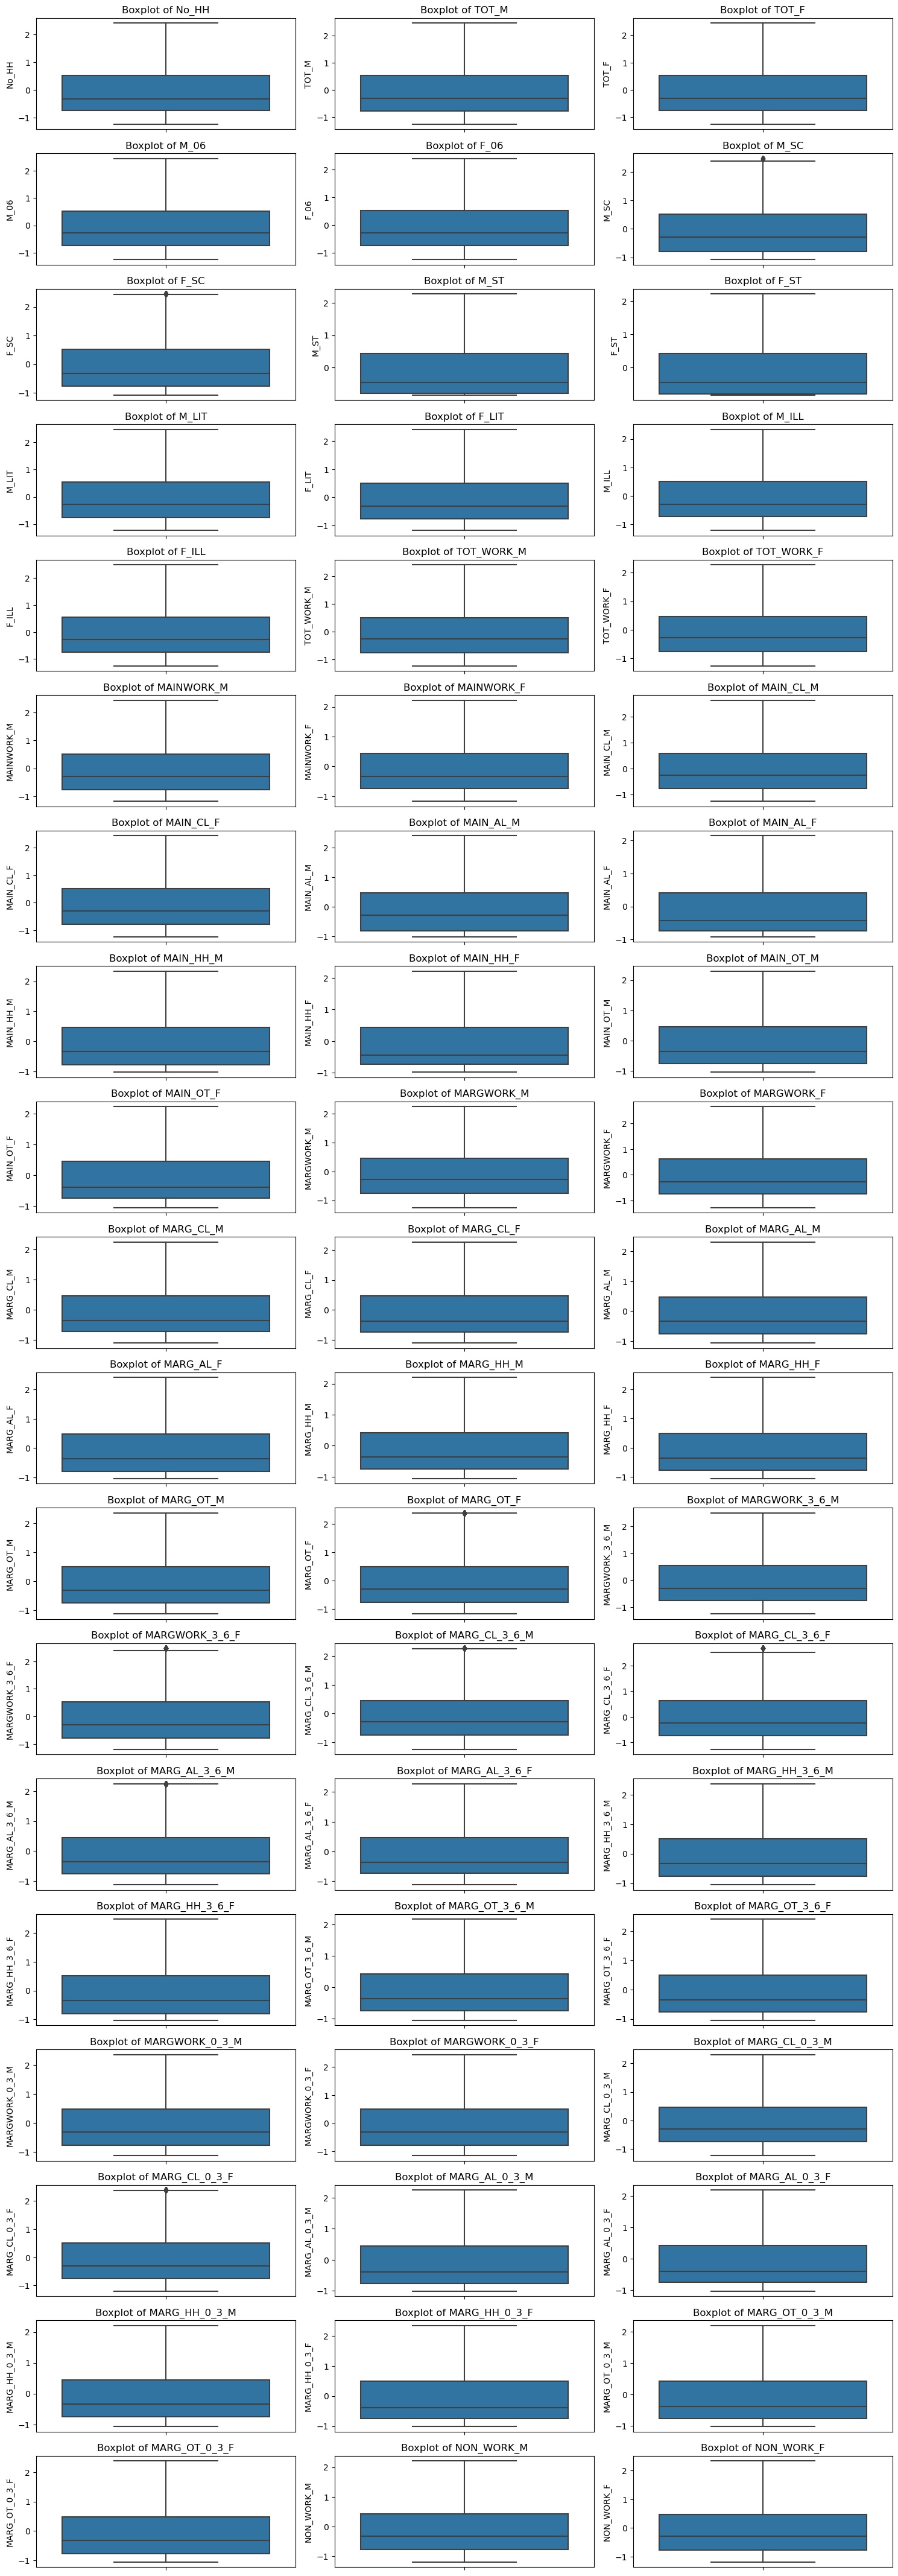

In [122]:
#Check to verify if outliers have been treated
plt.figure(figsize = (15,45))
feature_list = df_pca_scaled.columns
for i in range(len(feature_list)):
    plt.subplot(20, 3, i + 1)
    sns.boxplot(y = df_pca_scaled[feature_list[i]], data = df_pca_scaled)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

### Barletts Test for Sphericity

In [123]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_pca_scaled)
p_value

0.0

## KMO Test

In [124]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_pca_scaled)
kmo_model

0.9361896166652443

In [125]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=57, random_state=123)
pca_transformed = pca.fit_transform(df_pca_scaled)
pca_transformed

array([[-5.52816148e+00,  4.30377559e-01, -1.47382695e+00, ...,
         6.51060294e-03,  2.38391484e-03,  4.36606130e-04],
       [-5.49201646e+00, -1.06110331e-01, -2.01564100e+00, ...,
        -2.82839348e-04,  8.13609312e-03, -6.60428796e-03],
       [-7.47464297e+00, -2.17193764e-01, -2.47428211e-01, ...,
        -1.35201718e-03, -1.10109765e-03,  8.64566393e-05],
       ...,
       [-7.88626804e+00, -1.00353656e+00, -9.09284569e-01, ...,
        -2.15313673e-03,  1.45549207e-03, -4.60053251e-04],
       [-7.86425952e+00, -9.99337996e-01, -8.51569237e-01, ...,
        -2.06885382e-03, -1.22502335e-03,  1.81303381e-03],
       [-7.41622568e+00, -1.41214300e+00, -8.65921210e-01, ...,
        -1.06417476e-03, -1.66377584e-03,  1.78275792e-03]])

In [126]:
pca.components_

array([[ 0.14922158,  0.15916917,  0.15820921, ...,  0.14136961,
         0.14762899,  0.14210263],
       [-0.11548673, -0.08023879, -0.09371751, ...,  0.03510934,
        -0.04912234, -0.03984815],
       [ 0.1015276 , -0.03866173,  0.0289595 , ..., -0.10217491,
        -0.12667281, -0.02854464],
       ...,
       [ 0.00112879, -0.00673066,  0.02298648, ..., -0.01159627,
         0.05608352, -0.00610478],
       [ 0.00070908,  0.04637872,  0.00402434, ...,  0.01406358,
        -0.07729171, -0.00056173],
       [-0.00461221, -0.00370327,  0.00963954, ...,  0.00227908,
         0.00539901,  0.00130606]])

In [127]:
#Check the eigen values
#Note: This is always returned in descending order
pca.explained_variance_

array([3.56488638e+01, 7.64357559e+00, 3.76919551e+00, 2.77722349e+00,
       1.90694892e+00, 1.15490310e+00, 9.87726707e-01, 4.64629906e-01,
       3.96708513e-01, 3.22346888e-01, 2.73207369e-01, 2.35647574e-01,
       1.81401107e-01, 1.69243770e-01, 1.38592325e-01, 1.31505852e-01,
       1.03809666e-01, 9.55333831e-02, 8.58580407e-02, 8.09138742e-02,
       6.60179067e-02, 6.30797999e-02, 4.82756124e-02, 4.59506197e-02,
       4.37747566e-02, 3.19339710e-02, 2.86194563e-02, 2.75481445e-02,
       2.34340044e-02, 2.20296816e-02, 1.87487040e-02, 1.59004895e-02,
       1.39957919e-02, 1.18916465e-02, 1.11133495e-02, 9.07842645e-03,
       7.25127869e-03, 6.27213692e-03, 4.95541908e-03, 4.60667097e-03,
       3.45902033e-03, 2.18408510e-03, 2.13514664e-03, 1.92111328e-03,
       1.43840980e-03, 1.09968912e-03, 9.65752052e-04, 8.62630267e-04,
       6.51634478e-04, 5.76658846e-04, 4.35790607e-04, 3.70037468e-04,
       3.06660171e-04, 2.07854170e-04, 1.38286484e-04, 8.97034441e-05,
      

In [128]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([6.24441446e-01, 1.33888289e-01, 6.60229147e-02, 4.86470891e-02,
       3.34029704e-02, 2.02297994e-02, 1.73014629e-02, 8.13866529e-03,
       6.94892379e-03, 5.64637229e-03, 4.78562250e-03, 4.12770833e-03,
       3.17750294e-03, 2.96454958e-03, 2.42764517e-03, 2.30351534e-03,
       1.81837655e-03, 1.67340548e-03, 1.50392785e-03, 1.41732362e-03,
       1.15639919e-03, 1.10493400e-03, 8.45617224e-04, 8.04891611e-04,
       7.66778221e-04, 5.59369722e-04, 5.01311201e-04, 4.82545623e-04,
       4.10480504e-04, 3.85881758e-04, 3.28410688e-04, 2.78520087e-04,
       2.45156553e-04, 2.08299401e-04, 1.94666401e-04, 1.59021779e-04,
       1.27016642e-04, 1.09865556e-04, 8.68013375e-05, 8.06925096e-05,
       6.05897475e-05, 3.82574118e-05, 3.74001838e-05, 3.36510796e-05,
       2.51958296e-05, 1.92626466e-05, 1.69165450e-05, 1.51102177e-05,
       1.14143210e-05, 1.01010143e-05, 7.63350323e-06, 6.48174183e-06,
       5.37159674e-06, 3.64086663e-06, 2.42228792e-06, 1.57128566e-06,
      

In [129]:
len(df_pca.columns)

57

In [130]:
#Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13',
                                               'PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27',
                                               'PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40','PC41','PC42','PC43'
                                               'PC44','PC45','PC46','PC47','PC48','PC49','PC50','PC51','PC52','PC53','PC54','PC55','PC56','PC57','PC58'
                                               ],
                                    index = df_pca_scaled.columns)

In [131]:
df_extracted_loadings

PC1       PC2       PC3       PC4       PC5       PC6  \
No_HH           0.149222 -0.115487  0.101528  0.076814 -0.012090  0.082558   
TOT_M           0.159169 -0.080239 -0.038662  0.052976 -0.042344  0.073667   
TOT_F           0.158209 -0.093718  0.028959  0.070022 -0.022927  0.082812   
M_06            0.156340 -0.020341 -0.074419  0.028520 -0.080339  0.092379   
F_06            0.156814 -0.014310 -0.068223  0.016398 -0.078326  0.080010   
M_SC            0.143350 -0.079667 -0.037619  0.010210 -0.167893  0.050969   
F_SC            0.143537 -0.087098  0.021350  0.016244 -0.158092  0.054568   
M_ST            0.018849  0.069101  0.323827  0.091143  0.418412 -0.231809   
F_ST            0.017878  0.067316  0.338705  0.079554  0.415965 -0.214542   
M_LIT           0.155152 -0.105986 -0.032107  0.089187 -0.014033  0.081378   
F_LIT           0.145450 -0.133234 -0.005133  0.125412  0.029084  0.102207   
M_ILL           0.154551 -0.009460 -0.047054 -0.034665 -0.104073  0.037957   
F_ILL           0.158283 -0.021793  0.079345 -0.010578 -0.110332  0.013986   
TOT_WORK_M      0.154076 -0.120912 -0.001116  0.069046 -0.023104  0.035802   
TOT_WORK_F      0.142530 -0.076003  0.194130  0.111057 -0.018931 -0.016587   
MAINWORK_M      0.141932 -0.166700  0.019821  0.100188 -0.043225  0.018054   
MAINWORK_F      0.125732 -0.142250  0.209976  0.133013 -0.054674 -0.051951   
MAIN_CL_M       0.111692  0.042552  0.033131  0.078851 -0.303376 -0.293504   
MAIN_CL_F       0.083035  0.095893  0.188822  0.265022 -0.257925 -0.269914   
MAIN_AL_M       0.119291 -0.053342  0.225831 -0.121379 -0.253131 -0.023336   
MAIN_AL_F       0.090089 -0.072467  0.356566 -0.020989 -0.199220 -0.056558   
MAIN_HH_M       0.141850 -0.101835 -0.102202 -0.021969 -0.060812 -0.142869   
MAIN_HH_F       0.133880 -0.113257  0.021613 -0.045436 -0.023063 -0.318474   
MAIN_OT_M       0.122762 -0.203602 -0.028144  0.147025  0.069907  0.071214   
MAIN_OT_F       0.116866 -0.205899  0.069034  0.155917  0.106774  0.033885   
MARGWORK_M      0.156656  0.079039 -0.068685 -0.078572  0.065812  0.078655   
MARGWORK_F      0.148695  0.108813  0.104957  0.015788  0.077624  0.099156   
MARG_CL_M       0.088163  0.271522 -0.104745  0.157104 -0.018005 -0.032738   
MARG_CL_F       0.065160  0.275398 -0.036325  0.285024 -0.055152 -0.031787   
MARG_AL_M       0.127278  0.156579  0.070434 -0.250594 -0.047200  0.079748   
MARG_AL_F       0.115888  0.135048  0.259987 -0.153798 -0.012643  0.117625   
MARG_HH_M       0.145366  0.040974 -0.144347 -0.167540  0.005575 -0.169980   
MARG_HH_F       0.142302  0.006685 -0.093838 -0.151469  0.043616 -0.319596   
MARG_OT_M       0.150877 -0.073440 -0.131415  0.021195  0.145109  0.018232   
MARG_OT_F       0.148018 -0.088361 -0.053883  0.059961  0.190756  0.002409   
MARGWORK_3_6_M  0.157908 -0.044044 -0.066877  0.039319 -0.059886  0.103377   
MARGWORK_3_6_F  0.155831 -0.092383 -0.058718  0.046130 -0.022476  0.117467   
MARG_CL_3_6_M   0.157640  0.066208 -0.060172 -0.091315  0.059078  0.072381   
MARG_CL_3_6_F   0.149501  0.089651  0.125792  0.018865  0.064349  0.070896   
MARG_AL_3_6_M   0.094785  0.261268 -0.096551  0.131591 -0.013887 -0.041377   
MARG_AL_3_6_F   0.067158  0.266691 -0.018256  0.292845 -0.061019 -0.049367   
MARG_HH_3_6_M   0.128184  0.149831  0.078194 -0.250337 -0.058665  0.073152   
MARG_HH_3_6_F   0.113959  0.120648  0.283235 -0.143045 -0.025386  0.094868   
MARG_OT_3_6_M   0.145108  0.036763 -0.142511 -0.166002  0.003315 -0.174634   
MARG_OT_3_6_F   0.141029 -0.003685 -0.089356 -0.142599  0.041678 -0.343970   
MARGWORK_0_3_M  0.150922 -0.077739 -0.130687  0.019887  0.132794  0.015826   
MARGWORK_0_3_F  0.147534 -0.101141 -0.058489  0.060087  0.170596 -0.004857   
MARG_CL_0_3_M   0.142987  0.136839 -0.103565 -0.018223  0.094293  0.111045   
MARG_CL_0_3_F   0.133784  0.166416  0.033423  0.005954  0.112351  0.185882   
MARG_AL_0_3_M   0.062964  0.281881 -0.120293  0.208941 -0.018070 -0.004600   
MARG_AL_0_3_F   0.056741  0.287541 -0.08809

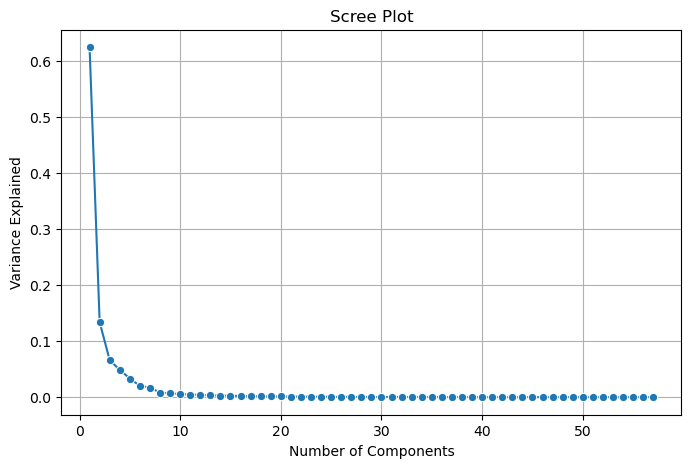

In [132]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,58),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [133]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.62444145, 0.75832974, 0.82435265, 0.87299974, 0.90640271,
       0.92663251, 0.94393397, 0.95207264, 0.95902156, 0.96466793,
       0.96945356, 0.97358126, 0.97675877, 0.97972332, 0.98215096,
       0.98445448, 0.98627285, 0.98794626, 0.98945019, 0.99086751,
       0.99202391, 0.99312884, 0.99397446, 0.99477935, 0.99554613,
       0.9961055 , 0.99660681, 0.99708936, 0.99749984, 0.99788572,
       0.99821413, 0.99849265, 0.99873781, 0.99894611, 0.99914077,
       0.99929979, 0.99942681, 0.99953668, 0.99962348, 0.99970417,
       0.99976476, 0.99980302, 0.99984042, 0.99987407, 0.99989927,
       0.99991853, 0.99993544, 0.99995055, 0.99996197, 0.99997207,
       0.9999797 , 0.99998619, 0.99999156, 0.9999952 , 0.99999762,
       0.99999919, 1.        ])

In [134]:
#Choose the PCs basis cumulative explained variance
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3','PC4','PC5']]

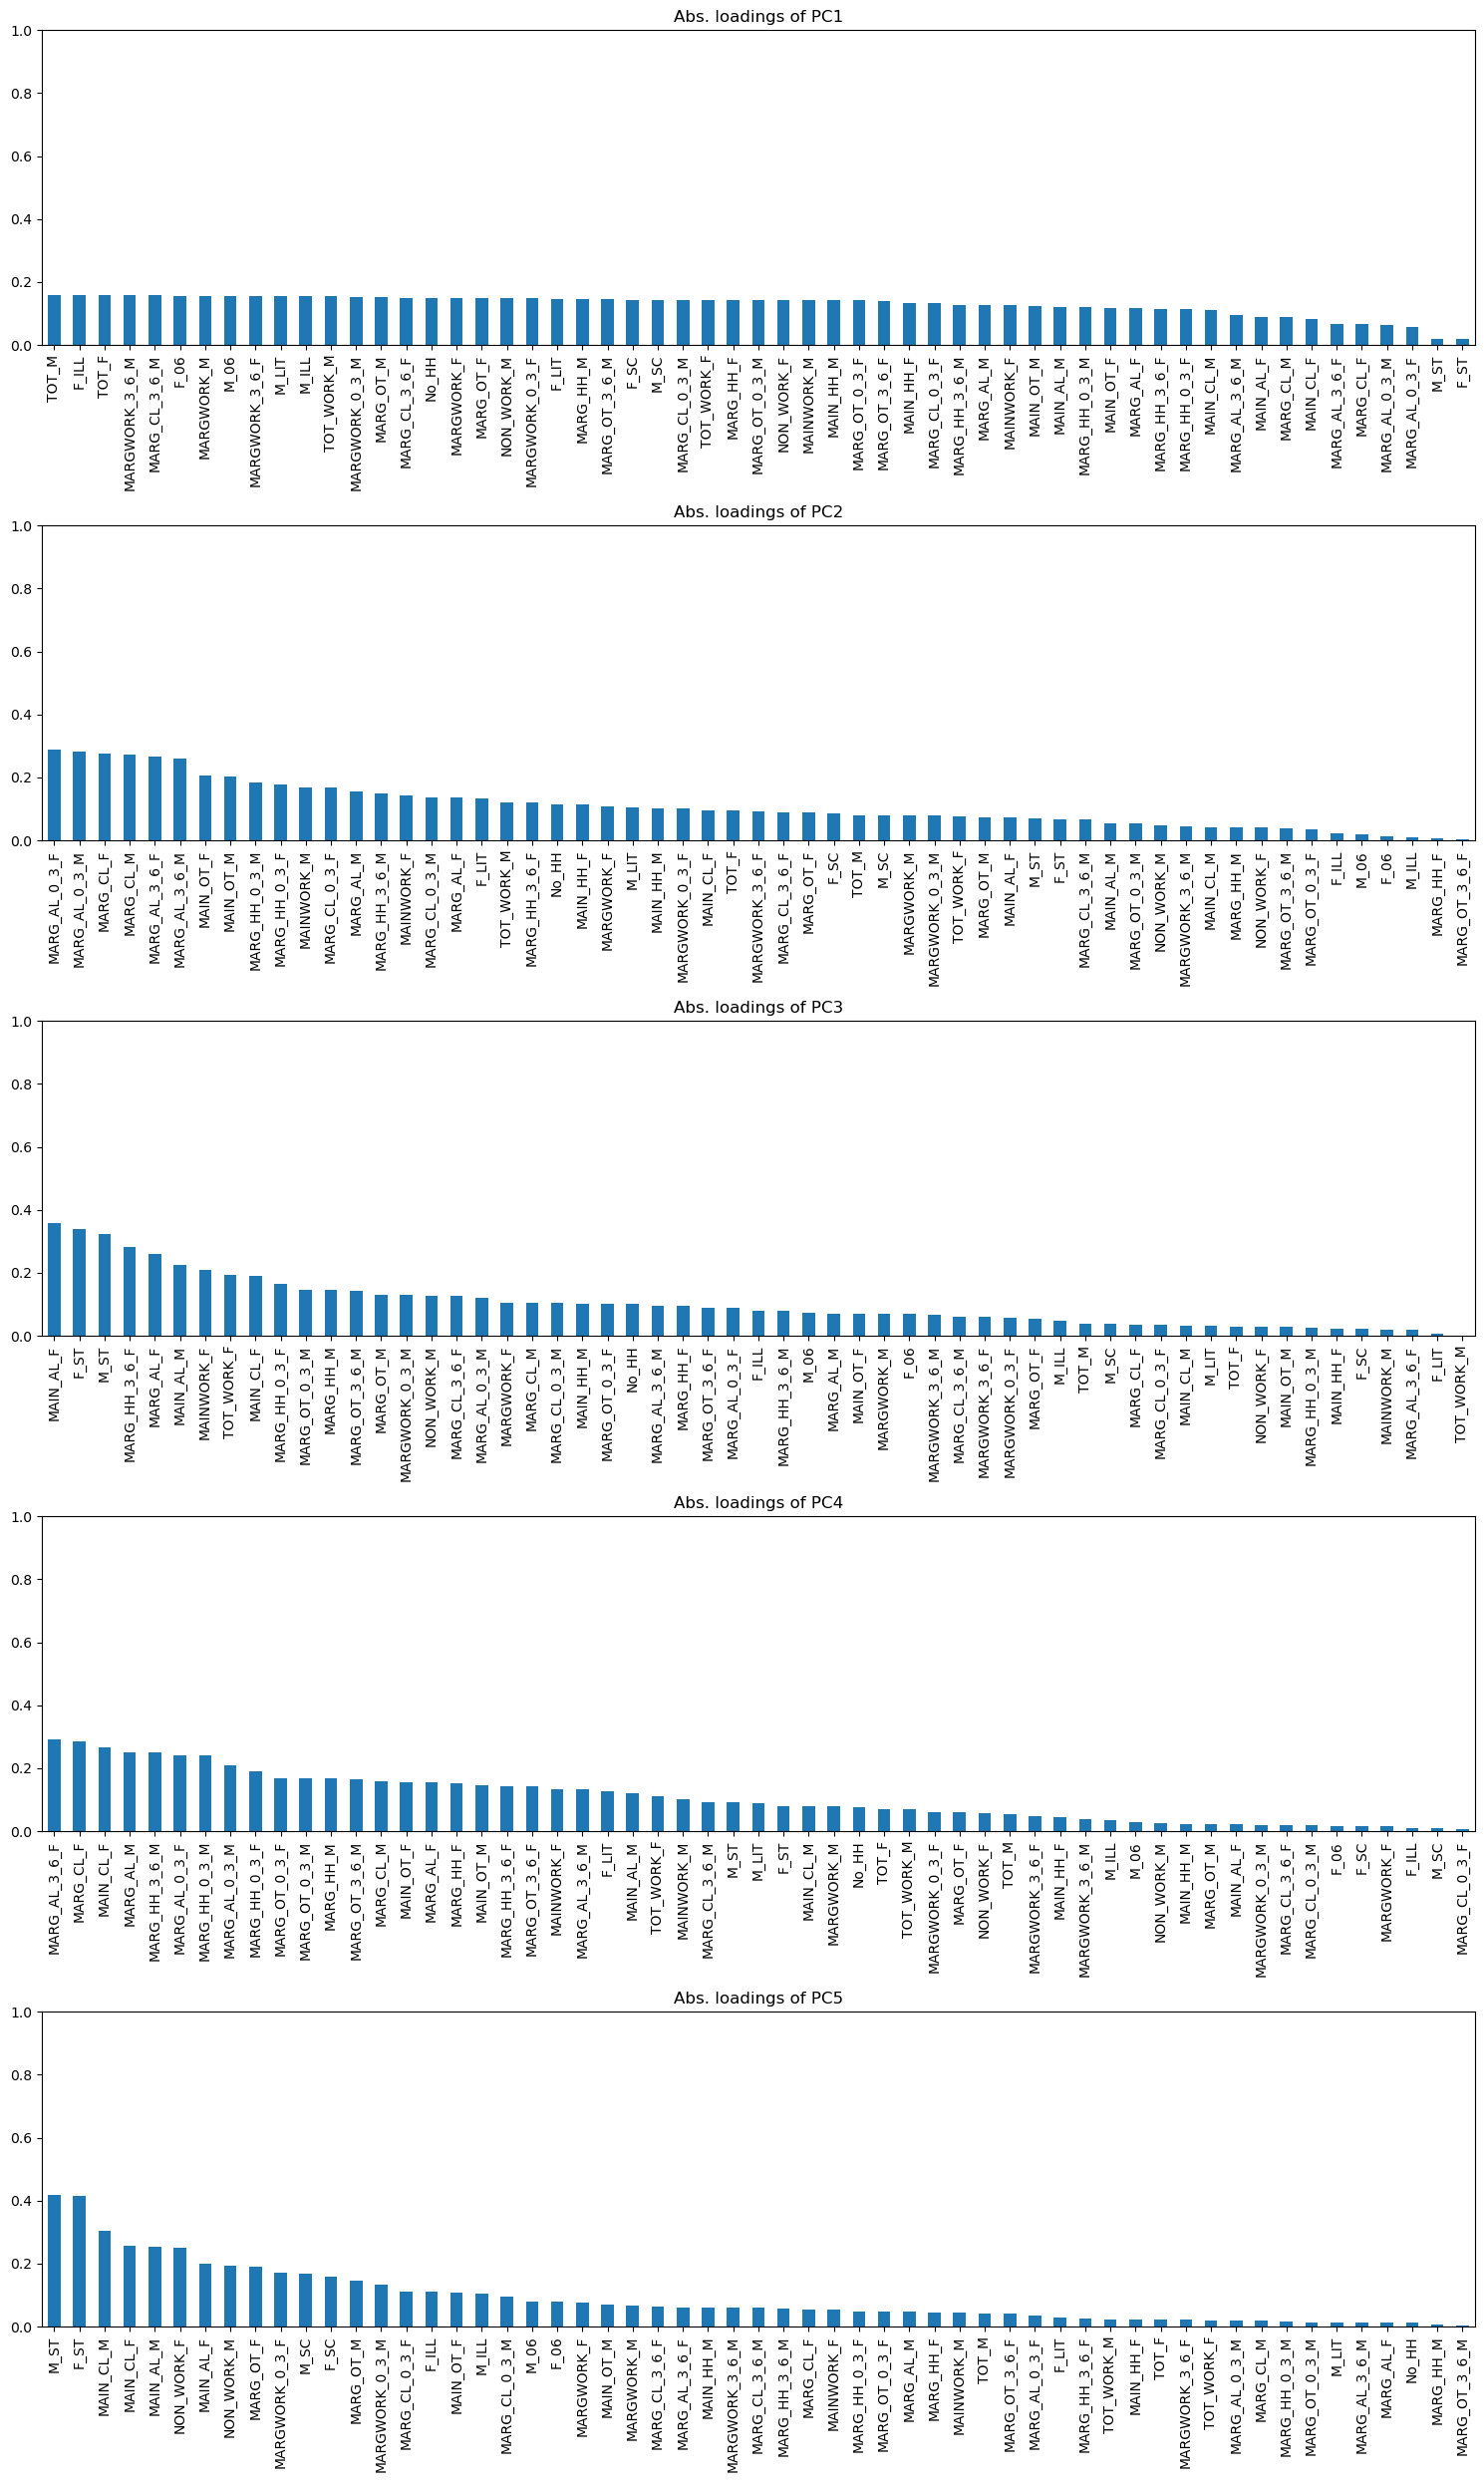

In [135]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (15,25))
for i in range(len(df_selected.columns)):
    plt.subplot(5,1,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

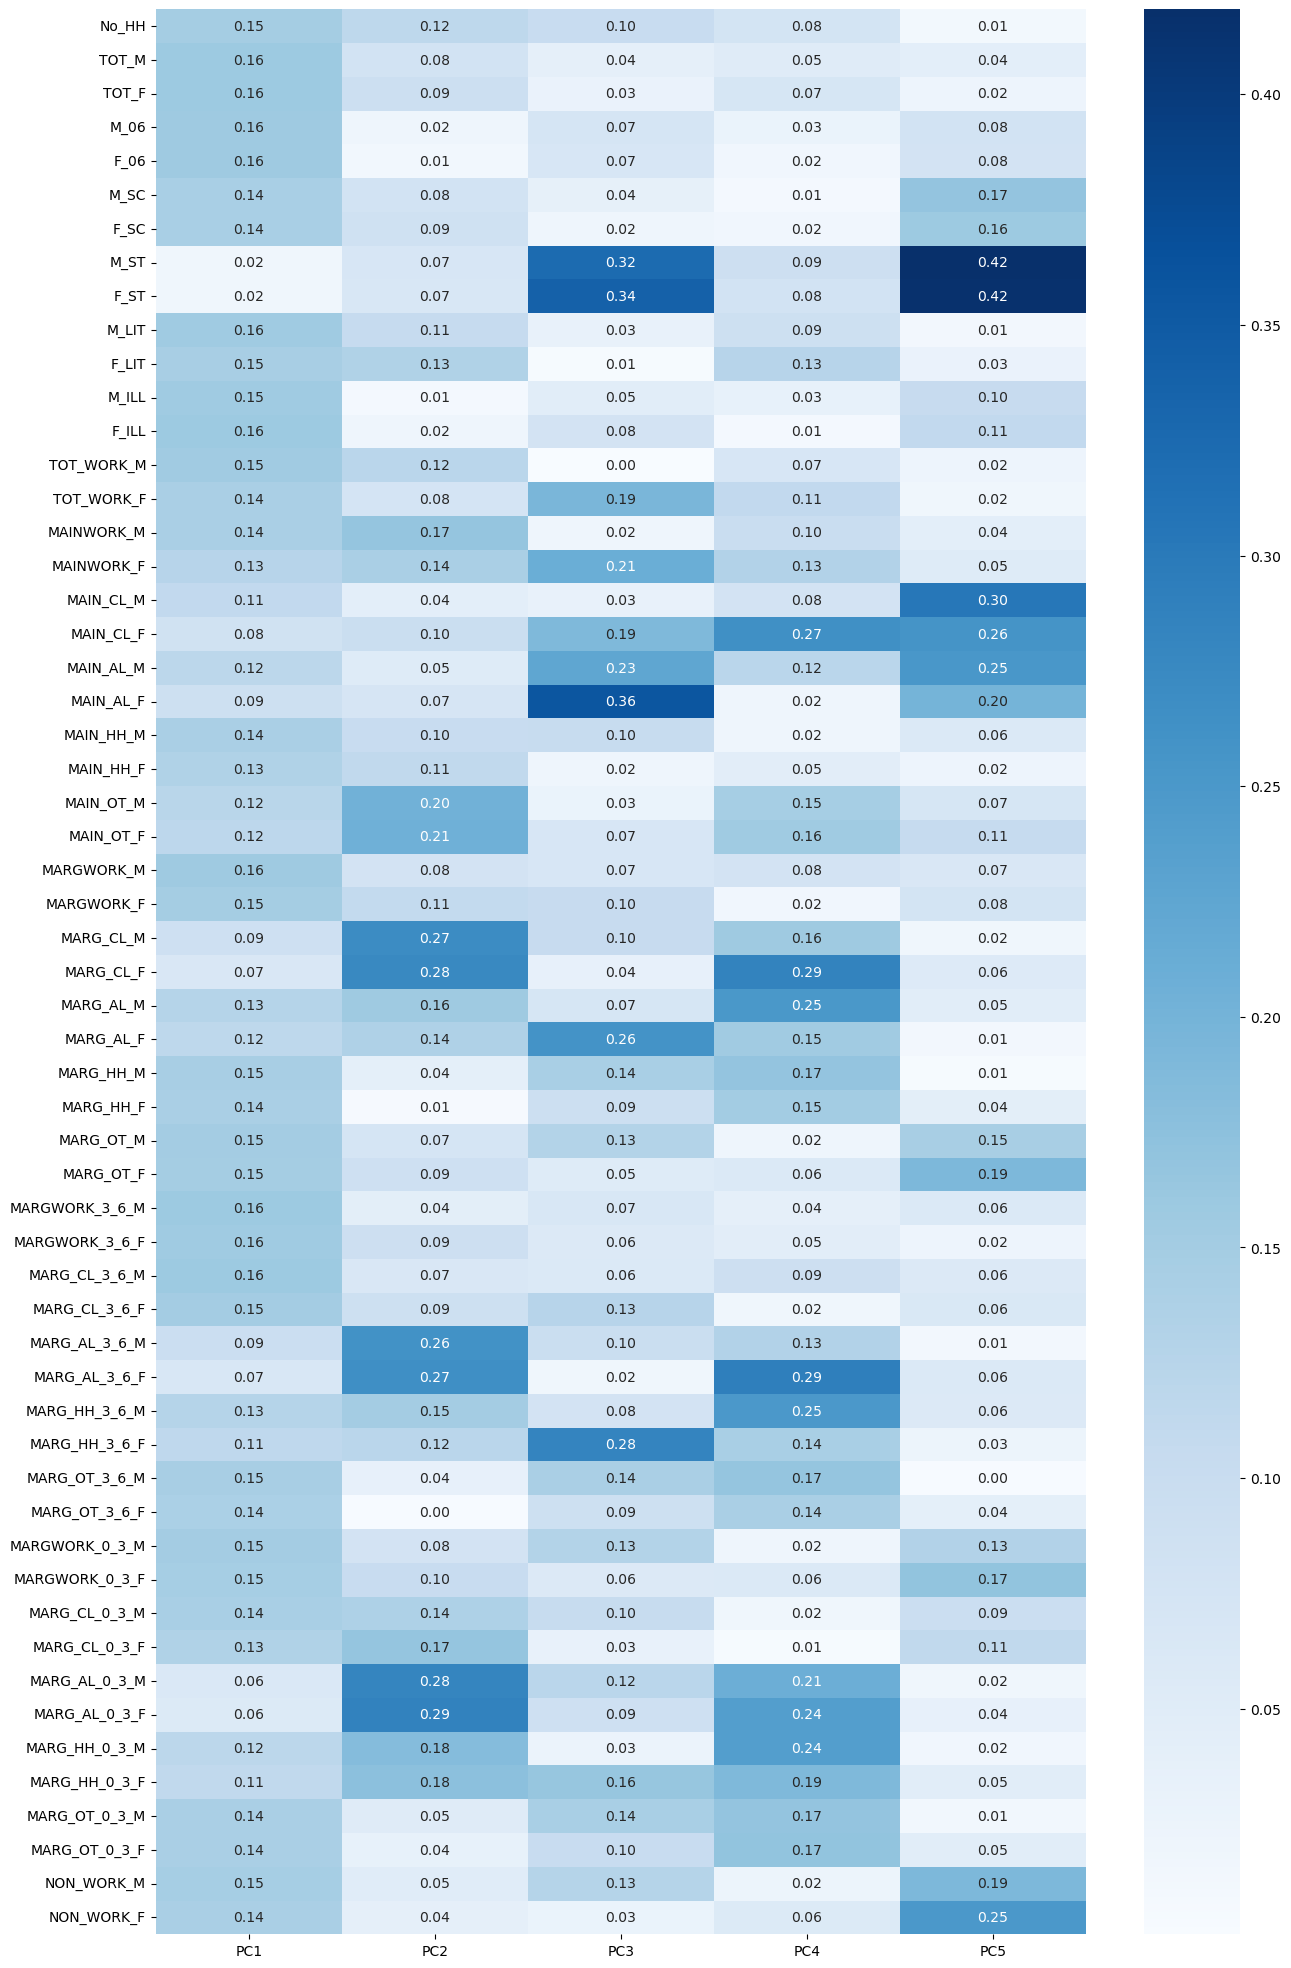

In [136]:
#Compare how the original features influence various PCs
plt.figure(figsize = (15,25))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f');

In [137]:
#In order to calculate PC scores we need loadings, below:
df_selected

PC1       PC2       PC3       PC4       PC5
No_HH           0.149222 -0.115487  0.101528  0.076814 -0.012090
TOT_M           0.159169 -0.080239 -0.038662  0.052976 -0.042344
TOT_F           0.158209 -0.093718  0.028959  0.070022 -0.022927
M_06            0.156340 -0.020341 -0.074419  0.028520 -0.080339
F_06            0.156814 -0.014310 -0.068223  0.016398 -0.078326
M_SC            0.143350 -0.079667 -0.037619  0.010210 -0.167893
F_SC            0.143537 -0.087098  0.021350  0.016244 -0.158092
M_ST            0.018849  0.069101  0.323827  0.091143  0.418412
F_ST            0.017878  0.067316  0.338705  0.079554  0.415965
M_LIT           0.155152 -0.105986 -0.032107  0.089187 -0.014033
F_LIT           0.145450 -0.133234 -0.005133  0.125412  0.029084
M_ILL           0.154551 -0.009460 -0.047054 -0.034665 -0.104073
F_ILL           0.158283 -0.021793  0.079345 -0.010578 -0.110332
TOT_WORK_M      0.154076 -0.120912 -0.001116  0.069046 -0.023104
TOT_WORK_F      0.142530 -0.076003  0.194130  0.111057 -0.018931
MAINWORK_M      0.141932 -0.166700  0.019821  0.100188 -0.043225
MAINWORK_F      0.125732 -0.142250  0.209976  0.133013 -0.054674
MAIN_CL_M       0.111692  0.042552  0.033131  0.078851 -0.303376
MAIN_CL_F       0.083035  0.095893  0.188822  0.265022 -0.257925
MAIN_AL_M       0.119291 -0.053342  0.225831 -0.121379 -0.253131
MAIN_AL_F       0.090089 -0.072467  0.356566 -0.020989 -0.199220
MAIN_HH_M       0.141850 -0.101835 -0.102202 -0.021969 -0.060812
MAIN_HH_F       0.133880 -0.113257  0.021613 -0.045436 -0.023063
MAIN_OT_M       0.122762 -0.203602 -0.028144  0.147025  0.069907
MAIN_OT_F       0.116866 -0.205899  0.069034  0.155917  0.106774
MARGWORK_M      0.156656  0.079039 -0.068685 -0.078572  0.065812
MARGWORK_F      0.148695  0.108813  0.104957  0.015788  0.077624
MARG_CL_M       0.088163  0.271522 -0.104745  0.157104 -0.018005
MARG_CL_F       0.065160  0.275398 -0.036325  0.285024 -0.055152
MARG_AL_M       0.127278  0.156579  0.070434 -0.250594 -0.047200
MARG_AL_F       0.115888  0.135048  0.259987 -0.153798 -0.012643
MARG_HH_M       0.145366  0.040974 -0.144347 -0.167540  0.005575
MARG_HH_F       0.142302  0.006685 -0.093838 -0.151469  0.043616
MARG_OT_M       0.150877 -0.073440 -0.131415  0.021195  0.145109
MARG_OT_F       0.148018 -0.088361 -0.053883  0.059961  0.190756
MARGWORK_3_6_M  0.157908 -0.044044 -0.066877  0.039319 -0.059886
MARGWORK_3_6_F  0.155831 -0.092383 -0.058718  0.046130 -0.022476
MARG_CL_3_6_M   0.157640  0.066208 -0.060172 -0.091315  0.059078
MARG_CL_3_6_F   0.149501  0.089651  0.125792  0.018865  0.064349
MARG_AL_3_6_M   0.094785  0.261268 -0.096551  0.131591 -0.013887
MARG_AL_3_6_F   0.067158  0.266691 -0.018256  0.292845 -0.061019
MARG_HH_3_6_M   0.128184  0.149831  0.078194 -0.250337 -0.058665
MARG_HH_3_6_F   0.113959  0.120648  0.283235 -0.143045 -0.025386
MARG_OT_3_6_M   0.145108  0.036763 -0.142511 -0.166002  0.003315
MARG_OT_3_6_F   0.141029 -0.003685 -0.089356 -0.142599  0.041678
MARGWORK_0_3_M  0.150922 -0.077739 -0.130687  0.019887  0.132794
MARGWORK_0_3_F  0.147534 -0.101141 -0.058489  0.060087  0.170596
MARG_CL_0_3_M   0.142987  0.136839 -0.103565 -0.018223  0.094293
MARG_CL_0_3_F   0.133784  0.166416  0.033423  0.005954  0.112351
MARG_AL_0_3_M   0.062964  0.281881 -0.120293  0.208941 -0.018070
MARG_AL_0_3_F   0.056741  0.287541 -0.088097  0.240499 -0.036293
MARG_HH_0_3_M   0.119102  0.182341  0.026176 -0.240416  0.016981
MARG_HH_0_3_F   0.113044  0.177112  0.164774 -0.189408  0.047538
MARG_OT_0_3_M   0.142140  0.052925 -0.144419 -0.167554  0.014187
MARG_OT_0_3_F   0.141370  0.035109 -0.102175 -0.169020  0.047504
NON_WORK_M      0.147629 -0.049122 -0.126673  0.024036  0.191790
NON_WORK_F      0.142103 -0.039848 -0.028545  0.057402  0.249765

In [138]:
#...and we need the original scaled features
df_pca_scaled.iloc[0]

No_HH            -1.038986
TOT_M            -0.874837
TOT_F            -0.937027
M_06             -0.624685
F_06             -0.561282
M_SC             -1.080201
F_SC             -1.079963
M_ST             -0.510440
F_ST             -0.574198
M_LIT            -0.939617
F_LIT            -0.965904
M_ILL            -0.644588
F_ILL            -0.837035
TOT_WORK_M       -1.012439
TOT_WORK_F       -1.155832
MAINWORK_M       -1.066369
MAINWORK_F       -1.124355
MAIN_CL_M        -1.144964
MAIN_CL_F        -1.180238
MAIN_AL_M        -0.948406
MAIN_AL_F        -0.898818
MAIN_HH_M        -0.917053
MAIN_HH_F        -0.895765
MAIN_OT_M        -0.923768
MAIN_OT_F        -0.989318
MARGWORK_M       -0.570019
MARGWORK_F       -1.039881
MARG_CL_M        -0.347274
MARG_CL_F        -0.759467
MARG_AL_M        -0.331878
MARG_AL_F        -0.934181
MARG_HH_M        -0.465296
MARG_HH_F        -0.661238
MARG_OT_M        -0.665594
MARG_OT_F        -0.797562
MARGWORK_3_6_M   -0.731300
MARGWORK_3_6_F   -0.787295
M

In [139]:
#We need to perform a dot product between the loadings and features to obtain the scores
for i in df_selected.columns:
    pc_score = np.dot(df_selected[i], df_pca_scaled.iloc[0])
    print(round(pc_score, 6), end = ' ')

-5.528161 0.430378 -1.473827 -1.278049 0.376358 

In [140]:
#Above step involves a lot of hard work. Let's do it the easier way
#Extract the required(as per the cumulative explained variance) number of PCs
pca = PCA(n_components=5, random_state=123)
pca_final = pca.fit_transform(df_pca_scaled)

In [141]:
#Just create a dataframe out of fit_transformed scaled data above

pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(10).T

0         1         2         3         4         5         6  \
PC1 -5.528161 -5.492016 -7.474643 -7.919737 -5.175695 -3.647563 -6.178820   
PC2  0.430378 -0.106110 -0.217194 -0.652311  2.304059  4.598733 -0.256962   
PC3 -1.473827 -2.015641 -0.247428 -0.659220 -1.157327 -1.742810 -1.234310   
PC4 -1.278049 -1.750168  0.006079 -0.735550  1.060796  3.301079 -0.121392   
PC5  0.376358 -0.006857  0.556282  0.272465  1.080249  1.212639 -0.173580   

            7         8         9  
PC1 -5.436802 -6.099449 -4.972562  
PC2  0.237215  0.004985 -1.970847  
PC3 -1.664352 -1.563508 -1.707058  
PC4 -1.163284 -1.537818 -0.676605  
PC5  0.220704  0.364566  0.614131

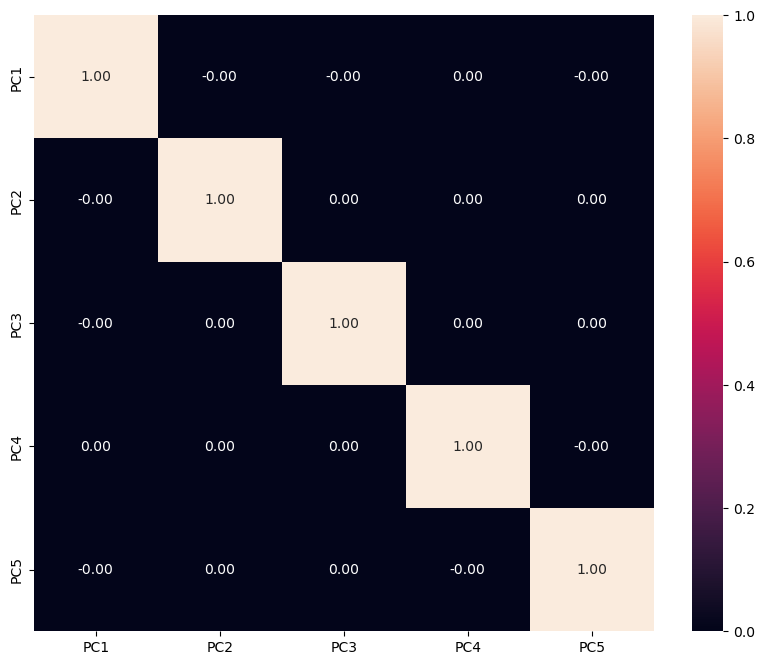

In [142]:
#Check for presence of correlations among teh PCs
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');

In [143]:
list = ['skilled_unskilled_workforce','Marginalized_working_population', 'Female_workforce', 'Household_popluation','SC/ST_workforce']

In [144]:
pca_final_df = pd.DataFrame(pca_final, columns = list).T
pca_final_df

0         1         2         3    \
skilled_unskilled_workforce     -5.528161 -5.492016 -7.474643 -7.919737   
Marginalized_working_population  0.430378 -0.106110 -0.217194 -0.652311   
Female_workforce                -1.473827 -2.015641 -0.247428 -0.659220   
Household_popluation            -1.278049 -1.750168  0.006079 -0.735550   
SC/ST_workforce                  0.376358 -0.006857  0.556282  0.272465   

                                      4         5         6         7    \
skilled_unskilled_workforce     -5.175695 -3.647563 -6.178820 -5.436802   
Marginalized_working_population  2.304059  4.598733 -0.256962  0.237215   
Female_workforce                -1.157327 -1.742810 -1.234310 -1.664352   
Household_popluation             1.060796  3.301079 -0.121392 -1.163284   
SC/ST_workforce                  1.080249  1.212639 -0.173580  0.220704   

                                      8         9    ...       630       631  \
skilled_unskilled_workforce     -6.099449 -4.972562  ...  1.174993  3.560221   
Marginalized_working_population  0.004985 -1.970847  ... -1.668541 -6.285853   
Female_workforce                -1.563508 -1.707058  ...  1.230541  1.068087   
Household_popluation            -1.537818 -0.676605  ...  0.038322  1.828248   
SC/ST_workforce                  0.364566  0.614131  ... -1.344272  0.154678   

                                      632       633       634       635  \
skilled_unskilled_workforce      0.221850 -8.217270 -4.258547 -7.946040   
Marginalized_working_population -4.788477 -1.145986 -2.709620 -1.302846   
Female_workforce                 1.862912 -0.709218 -0.335126 -0.819360   
Household_popluation             1.381633 -1.000707 -0.204250 -0.871301   
SC/ST_workforce                 -0.746453 -0.208149 -0.000109 -0.101966   

                                      636       637       638       639  
skilled_unskilled_workforce     -7.244719 -7.886268 -7.864260 -7.416226  
Marginalized_working_population -1.396520 -1.003537 -0.999338 -1.412143  
Female_workforce                -0.719443 -0.909285 -0.851569 -0.865921  
Household_popluation            -0.895934 -1.238009 -0.782561 -0.680528  
SC/ST_workforce                 -0.062742  0.146031 -0.081681  0.096861  

[5 rows x 640 columns]

## Linear equation for first PC

In [145]:
for i in range(0,57):
    print("(",np.round(pca.components_[0][i],2),'*',df_pca_scaled.columns[i],")",end=' + ')


( 0.15 * No_HH ) + ( 0.16 * TOT_M ) + ( 0.16 * TOT_F ) + ( 0.16 * M_06 ) + ( 0.16 * F_06 ) + ( 0.14 * M_SC ) + ( 0.14 * F_SC ) + ( 0.02 * M_ST ) + ( 0.02 * F_ST ) + ( 0.16 * M_LIT ) + ( 0.15 * F_LIT ) + ( 0.15 * M_ILL ) + ( 0.16 * F_ILL ) + ( 0.15 * TOT_WORK_M ) + ( 0.14 * TOT_WORK_F ) + ( 0.14 * MAINWORK_M ) + ( 0.13 * MAINWORK_F ) + ( 0.11 * MAIN_CL_M ) + ( 0.08 * MAIN_CL_F ) + ( 0.12 * MAIN_AL_M ) + ( 0.09 * MAIN_AL_F ) + ( 0.14 * MAIN_HH_M ) + ( 0.13 * MAIN_HH_F ) + ( 0.12 * MAIN_OT_M ) + ( 0.12 * MAIN_OT_F ) + ( 0.16 * MARGWORK_M ) + ( 0.15 * MARGWORK_F ) + ( 0.09 * MARG_CL_M ) + ( 0.07 * MARG_CL_F ) + ( 0.13 * MARG_AL_M ) + ( 0.12 * MARG_AL_F ) + ( 0.15 * MARG_HH_M ) + ( 0.14 * MARG_HH_F ) + ( 0.15 * MARG_OT_M ) + ( 0.15 * MARG_OT_F ) + ( 0.16 * MARGWORK_3_6_M ) + ( 0.16 * MARGWORK_3_6_F ) + ( 0.16 * MARG_CL_3_6_M ) + ( 0.15 * MARG_CL_3_6_F ) + ( 0.09 * MARG_AL_3_6_M ) + ( 0.07 * MARG_AL_3_6_F ) + ( 0.13 * MARG_HH_3_6_M ) + ( 0.11 * MARG_HH_3_6_F ) + ( 0.15 * MARG_OT_3_6_M ) + ( 